In [1]:
# =============================================================================
# DATA LOADING AND EXPLORATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 1: DATA LOADING AND EXPLORATION ===")

# Read the data file
df = pd.read_csv(r'E:\Final_Data_File.csv')
print("✓ Data loaded successfully from E:\Final_Data_File.csv")
print(f"✓ Dataset shape: {df.shape}")

# Basic exploration
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values summary:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

<>:16: SyntaxWarning: invalid escape sequence '\F'
<>:16: SyntaxWarning: invalid escape sequence '\F'
C:\Users\SHAH MD AREFIN\AppData\Local\Temp\ipykernel_11228\76839201.py:16: SyntaxWarning: invalid escape sequence '\F'
  print("✓ Data loaded successfully from E:\Final_Data_File.csv")


=== STEP 1: DATA LOADING AND EXPLORATION ===
✓ Data loaded successfully from E:\Final_Data_File.csv
✓ Dataset shape: (8784, 89)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  8784 non-null   object 
 1   BIDX    8784 non-null   int64  
 2   V000    8784 non-null   object 
 3   V001    8784 non-null   int64  
 4   V002    8784 non-null   int64  
 5   V003    8784 non-null   int64  
 6   V004    8784 non-null   int64  
 7   V005    8784 non-null   int64  
 8   V012    8784 non-null   int64  
 9   V013    8784 non-null   object 
 10  V024    8784 non-null   object 
 11  V025    8784 non-null   object 
 12  V106    8784 non-null   object 
 13  V130    8784 non-null   object 
 14  V150    8784 non-null   object 
 15  V151    8784 non-null   object 
 16  V152    8784 non-null   int64  
 17  V155    8784 non-null   object 
 18  V157 

In [2]:
# =============================================================================
# VARIABLE MAPPING AND DATA CLEANING
# =============================================================================

print("\n Variable Mapping and Data Cleaning...")

# Updated variable mapping based on your provided list
variable_map = {
    # Child Health Outcomes (Dependent Variables)
    'stunting': 'HW70',        # Height/Age standard deviation
    'wasting': 'HW72',         # Weight/Height standard deviation  
    'underweight': 'HW71',     # Weight/Age standard deviation
    'diarrhea': 'H11',         # Had diarrhea recently
    'fever': 'H22',            # Had fever in last two weeks
    'ari_cough': 'H31',        # Had cough in last two weeks
    'ari_breathing': 'H31B',   # Short, rapid breaths
    'ari_nose': 'H31C',        # Problem in chest or blocked/running nose
    
    # Maternal Mental Health (Independent Variables)
    'phq_score': 'MTH22',      # PHQ score (Primary exposure)
    'gad_score': 'MTH24',      # GAD score (Primary exposure)
    'depression_diagnosed': 'MTH19',  # Ever told have depression
    'anxiety_diagnosed': 'MTH20',     # Ever told have anxiety
    'mental_health_meds': 'MTH21',    # Took medication for depression/anxiety
    'phq_referral': 'MTH23',   # Referral based on PHQ score
    
    # Women's Empowerment (Moderating Variables)
    'education': 'V106',       # Highest educational level
    'wealth_index': 'V190',    # Wealth index combined
    'residence': 'V025',       # Type of place of residence
    'working_status': 'V714',  # Respondent currently working
    'occupation': 'V717',      # Respondent's occupation (grouped)
    'mobile_phone': 'V169A',   # Owns a mobile telephone
    'bank_account': 'V170',    # Has account in bank/financial institution
    
    # Healthcare Seeking (Mediating Variables)
    'anc_visits': 'M14',       # Number of antenatal visits
    'delivery_place': 'M15',   # Place of delivery
    'c_section': 'M17',        # Delivery by caesarean section
    'exclusive_bf': 'S435BH',  # Exclusive breastfeeding
    
    # Control Variables
    'mother_age': 'V012',      # Respondent's current age
    'child_age_months': 'HW1', # Child's age in months
    'child_sex': 'B4',         # Sex of child
    'birth_order': 'BORD',     # Birth order number
    'region': 'V024',          # Division
    'marital_status': 'V501',  # Current marital status
    'bmi': 'V445',             # Body Mass Index
    'children_ever_born': 'V201',  # Total children ever born
    'sample_weight': 'V005'    # Sample weight
}

# Display available variables
print("Key Variables Available:")
available_vars = []
for key, value in variable_map.items():
    if value in df.columns:
        available_vars.append(key)
        print(f"✓ {key}: {value}")

print(f"\nTotal key variables available: {len(available_vars)}/{len(variable_map)}")

# Create a working copy of the dataset
analysis_df = df.copy()


 Variable Mapping and Data Cleaning...
Key Variables Available:
✓ stunting: HW70
✓ wasting: HW72
✓ underweight: HW71
✓ diarrhea: H11
✓ fever: H22
✓ ari_cough: H31
✓ ari_breathing: H31B
✓ ari_nose: H31C
✓ phq_score: MTH22
✓ gad_score: MTH24
✓ depression_diagnosed: MTH19
✓ anxiety_diagnosed: MTH20
✓ mental_health_meds: MTH21
✓ phq_referral: MTH23
✓ education: V106
✓ wealth_index: V190
✓ residence: V025
✓ working_status: V714
✓ occupation: V717
✓ mobile_phone: V169A
✓ bank_account: V170
✓ anc_visits: M14
✓ delivery_place: M15
✓ c_section: M17
✓ exclusive_bf: S435BH
✓ mother_age: V012
✓ child_age_months: HW1
✓ child_sex: B4
✓ birth_order: BORD
✓ region: V024
✓ marital_status: V501
✓ bmi: V445
✓ children_ever_born: V201
✓ sample_weight: V005

Total key variables available: 34/34


In [3]:
# =============================================================================
# DATA CLEANING AND VARIABLE CREATION
# =============================================================================

print("\nData Cleaning and Variable Creation...")
# Fix Z-score scaling and filter data
analysis_df['HW70'] = pd.to_numeric(analysis_df['HW70'], errors='coerce') / 100  # Stunting
analysis_df['HW71'] = pd.to_numeric(analysis_df['HW71'], errors='coerce') / 100  # Underweight
analysis_df['HW72'] = pd.to_numeric(analysis_df['HW72'], errors='coerce') / 100  # Wasting

# Fix weight variable scaling
analysis_df['V005'] = pd.to_numeric(analysis_df['V005'], errors='coerce') / 1000000

# Filter for children under 5 years and most recent births
analysis_df['HW1'] = pd.to_numeric(analysis_df['HW1'], errors='coerce')
analysis_df = analysis_df[analysis_df['HW1'] <= 60]  # Under 5 years
#analysis_df = analysis_df[analysis_df['BIDX'] == 1]  # Most recent births
print(f"Final sample size: {len(analysis_df)} mother-child pairs")

# Create Child Health Outcome Variables
def create_child_health_outcomes(df):
    """Create comprehensive child health outcome variables"""
    print("Creating child health outcome variables...")
    
    # Nutritional outcomes (WHO standards)
    df['stunting_binary'] = (df['HW70'] < -2).astype(int)
    df['wasting_binary'] = (df['HW72'] < -2).astype(int)  
    df['underweight_binary'] = (df['HW71'] < -2).astype(int)
    
    # Severe forms
    df['severe_stunting'] = (df['HW70'] < -3).astype(int)
    df['severe_wasting'] = (df['HW72'] < -3).astype(int)
    df['severe_underweight'] = (df['HW71'] < -3).astype(int)
    
    # Composite malnutrition indicator
    df['any_malnutrition'] = ((df['stunting_binary'] == 1) | 
                             (df['wasting_binary'] == 1) | 
                             (df['underweight_binary'] == 1)).astype(int)
    
    # Morbidity outcomes
    df['diarrhea_binary'] = (df['H11'] == 'Yes, last two weeks').astype(int)
    df['fever_binary'] = (df['H22'] == 'Yes').astype(int)
    df['cough_binary'] = (df['H31'] == 'Yes, last two weeks').astype(int)
    
    # Create ARI variable (cough + breathing problems)
    if 'H31B' in df.columns:
        df['ari_binary'] = ((df['H31'] == 'Yes, last two weeks') & 
                           (df['H31B'] == 'Yes')).astype(int)
    
    # Composite morbidity indicator
    df['any_morbidity'] = ((df['diarrhea_binary'] == 1) | 
                          (df['fever_binary'] == 1) | 
                          (df['cough_binary'] == 1)).astype(int)
    
    return df

analysis_df = create_child_health_outcomes(analysis_df)

# Create Maternal Mental Health Variables
def create_mental_health_variables(df):
    """Create comprehensive maternal mental health indicators"""
    print("Creating maternal mental health variables...")
    
    # Convert PHQ-9 score to numeric
    df['phq9_score'] = pd.to_numeric(df['MTH22'], errors='coerce')
    
    # Create depression categories based on PHQ-9
    conditions_depression = [
        df['phq9_score'] < 5,
        (df['phq9_score'] >= 5) & (df['phq9_score'] < 10),
        (df['phq9_score'] >= 10) & (df['phq9_score'] < 15),
        (df['phq9_score'] >= 15) & (df['phq9_score'] < 20),
        df['phq9_score'] >= 20
    ]
    choices_depression = ['None', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']
    df['depression_category'] = np.select(conditions_depression, choices_depression, default='Unknown')
    
    # Binary depression (mild to severe)
    df['depression_binary'] = (df['phq9_score'] >= 5).astype(int)
    
    # Convert GAD-7 score to numeric
    df['gad7_score'] = pd.to_numeric(df['MTH24'], errors='coerce')
    
    # Create anxiety categories based on GAD-7
    conditions_anxiety = [
        df['gad7_score'] < 6,
        (df['gad7_score'] >= 6) & (df['gad7_score'] < 15),
        df['gad7_score'] >= 15
    ]
    choices_anxiety = ['Mild', 'Moderate', 'Severe']
    df['anxiety_category'] = np.select(conditions_anxiety, choices_anxiety, default='Unknown')
    
    # Binary anxiety (mild to severe)
    df['anxiety_binary'] = (df['gad7_score'] >= 4).astype(int)
    
    # Composite mental health burden
    df['any_mental_health_issue'] = ((df['depression_binary'] == 1) | 
                                    (df['anxiety_binary'] == 1)).astype(int)
    
    # Mental health severity score (combined)
    df['mental_health_severity'] = (df['phq9_score'].fillna(0) + df['gad7_score'].fillna(0)) / 2
    
    # Diagnosis and treatment variables
    df['ever_depression_diagnosed'] = (df['MTH19'] == 'Yes').astype(int)
    df['ever_anxiety_diagnosed'] = (df['MTH20'] == 'Yes').astype(int)
    df['mental_health_medication'] = (df['MTH21'] == 'Yes').astype(int)
    df['phq_referral'] = (df['MTH23'] == 'Yes').astype(int)
    
    print(f"PHQ-9 scores available: {df['phq9_score'].notna().sum()}")
    print(f"GAD-7 scores available: {df['gad7_score'].notna().sum()}")
    
    return df

analysis_df = create_mental_health_variables(analysis_df)

# Create Women's Empowerment Variables
def create_empowerment_variables(df):
    """Create comprehensive women's empowerment indicators"""
    print("Creating women's empowerment variables...")
    
    # Education level
    education_mapping = {
        'No education': 'No education',
        'Primary': 'Primary',
        'Secondary': 'Secondary', 
        'Higher': 'Higher'
    }
    df['education_level'] = df['V106'].map(education_mapping)
    
    # Wealth quintile (ensure it's categorical)
    df['wealth_quintile'] = df['V190'].astype(str)
    
    # Residence
    df['urban_rural'] = df['V025']
    
    # Employment and economic empowerment
    df['currently_working'] = (df['V714'] == 'Yes').astype(int)
    df['has_mobile'] = (df['V169A'] == 'Yes').astype(int)
    df['has_bank_account'] = (df['V170'] == 'Yes').astype(int)
    
    # Create empowerment index (composite)
    empowerment_components = ['currently_working', 'has_mobile', 'has_bank_account']
    df['empowerment_index'] = df[empowerment_components].sum(axis=1) / len(empowerment_components)
    df['empowerment_category'] = pd.cut(df['empowerment_index'], 
                                       bins=[0, 0.33, 0.66, 1], 
                                       labels=['Low', 'Medium', 'High'])
    
    return df

analysis_df = create_empowerment_variables(analysis_df)

# Create Healthcare Seeking Variables
def create_healthcare_variables(df):
    """Create healthcare seeking behavior indicators"""
    print("Creating healthcare seeking variables...")
    
    # ANC visits (adequate = 4+ visits)
    df['anc_visits'] = pd.to_numeric(df['M14'], errors='coerce')
    df['adequate_anc'] = (df['anc_visits'] >= 4).astype(int)
    
    # Skilled birth attendance
    skilled_facilities = ['Private clinic', 'UH & family welfare center', 'District hospital', 'Private hospital','Her home','Medical college hospital','NGO static clinic','Community clinic','Upazila health complex','Other public sector','MCWC','Specialized govt hospital','Private medical college hospital','Other private medical','Other','Delivery Hut']
    df['skilled_birth'] = df['M15'].isin(skilled_facilities).astype(int)

    # C-section
    df['c_section_binary'] = (df['M17'] == 'Yes').astype(int)
    
    # Breastfeeding practices
    df['exclusive_bf_binary'] = (df['S435BH'] == 'Yes').astype(int)
    
    # Composite healthcare quality index
    healthcare_components = ['adequate_anc', 'skilled_birth']
    df['healthcare_quality_index'] = df[healthcare_components].sum(axis=1) / len(healthcare_components)
    
    return df

analysis_df = create_healthcare_variables(analysis_df)

# Create Control Variables
def create_control_variables(df):
    """Create control variables"""
    print("Creating control variables...")
    
    # Mother's characteristics
    df['mother_age'] = pd.to_numeric(df['V012'], errors='coerce')
    df['mother_age_group'] = pd.cut(df['mother_age'], 
                                   bins=[15, 25, 35, 49], 
                                   labels=['15-24', '25-34', '35-49'])
    df['bmi'] = pd.to_numeric(df['V445'], errors='coerce')
    df['parity'] = pd.to_numeric(df['V201'], errors='coerce')
    df['married'] = (df['V501'] == 'Married').astype(int)
    
    # Child's characteristics
    df['child_age_months'] = pd.to_numeric(df['HW1'], errors='coerce')
    df['child_age_group'] = pd.cut(df['child_age_months'],
                                  bins=[0, 12, 24, 36, 48, 60],
                                  labels=['0-11m', '12-23m', '24-35m', '36-47m', '48-59m'])
    df['child_sex'] = df['B4']
    df['birth_order'] = pd.to_numeric(df['BORD'], errors='coerce')
    
    # Household characteristics
    df['region'] = df['V024']
    df['sample_weight'] = pd.to_numeric(df['V005'], errors='coerce')
    
    return df

analysis_df = create_control_variables(analysis_df)

print(f"\nData preparation completed!")
print(f"Final dataset: {len(analysis_df)} observations")



Data Cleaning and Variable Creation...
Final sample size: 4226 mother-child pairs
Creating child health outcome variables...
Creating maternal mental health variables...
PHQ-9 scores available: 4226
GAD-7 scores available: 4226
Creating women's empowerment variables...
Creating healthcare seeking variables...
Creating control variables...

Data preparation completed!
Final dataset: 4226 observations


In [4]:
# =============================================================================
# SAMPLE CHARACTERISTICS - TABLE
# =============================================================================

print("=== STEP 4: SAMPLE CHARACTERISTICS ===")

print(f"Total original sample size: {len(df):,}")
print(f"Final analysis sample size: {len(analysis_df):,}")

def generate_descriptive_statistics(df):
    """Generate comprehensive descriptive statistics"""
    
    print("\n" + "="*80)
    print("DESCRIPTIVE STATISTICS - PERINATAL MENTAL HEALTH CASCADE")
    print("="*80)
    
    # Maternal Mental Health Prevalence
    print("\n MATERNAL MENTAL HEALTH PREVALENCE:")
    print("-" * 50)
    
    if 'phq9_score' in df.columns:
        total_with_phq = df['phq9_score'].notna().sum()
        depression_prev = df['depression_binary'].mean() * 100
        mean_phq = df['phq9_score'].mean()
        
        print(f"PHQ-9 (Depression):")
        print(f"  • Sample size: {total_with_phq}")
        print(f"  • Mild-to-Severe (≥5): {depression_prev:.1f}%")
        print(f"  • Mean score: {mean_phq:.2f}")
        
        # Depression severity distribution
        depression_dist = df['depression_category'].value_counts()
        print(f"  • Severity distribution:")
        for category, count in depression_dist.items():
            percentage = (count / total_with_phq) * 100
            print(f"    {category}: {count} ({percentage:.1f}%)")
    
    if 'gad7_score' in df.columns:
        total_with_gad = df['gad7_score'].notna().sum()
        anxiety_prev = df['anxiety_binary'].mean() * 100
        mean_gad = df['gad7_score'].mean()
        
        print(f"\nGAD-7 (Anxiety):")
        print(f"  • Sample size: {total_with_gad}")
        print(f"  • Mild-to-Severe (≥4): {anxiety_prev:.1f}%")
        print(f"  • Mean score: {mean_gad:.2f}")
        
        # Anxiety severity distribution
        anxiety_dist = df['anxiety_category'].value_counts()
        print(f"  • Severity distribution:")
        for category, count in anxiety_dist.items():
            percentage = (count / total_with_gad) * 100
            print(f"    {category}: {count} ({percentage:.1f}%)")
    
    # Comorbidity
    if all(var in df.columns for var in ['depression_binary', 'anxiety_binary']):
        comorbidity = ((df['depression_binary'] == 1) & (df['anxiety_binary'] == 1)).mean() * 100
        any_mental_health = df['any_mental_health_issue'].mean() * 100
        print(f"\nMental Health Comorbidity:")
        print(f"  • Any mental health issue: {any_mental_health:.1f}%")
        print(f"  • Both depression & anxiety: {comorbidity:.1f}%")
    
    # Child Health Outcomes
    print("\n CHILD HEALTH OUTCOMES:")
    print("-" * 50)
    
    nutrition_indicators = {
        'Stunting': 'stunting_binary',
        'Severe Stunting': 'severe_stunting',
        'Wasting': 'wasting_binary', 
        'Severe Wasting': 'severe_wasting', 
        'Underweight': 'underweight_binary',
        'Severe Underweight': 'severe_underweight',
        'Any Malnutrition': 'any_malnutrition'
    }
    
    for name, var in nutrition_indicators.items():
        if var in df.columns:
            prev = df[var].mean() * 100
            count = df[var].sum()
            total = df[var].notna().sum()
            print(f"  • {name}: {prev:.1f}% ({count}/{total})")
    
    morbidity_indicators = {
        'Diarrhea': 'diarrhea_binary',
        'Fever': 'fever_binary',
        'Cough': 'cough_binary',
        'ARI': 'ari_binary',
        'Any Morbidity': 'any_morbidity'
    }
    
    for name, var in morbidity_indicators.items():
        if var in df.columns:
            prev = df[var].mean() * 100
            count = df[var].sum()
            total = df[var].notna().sum()
            print(f"  • {name}: {prev:.1f}% ({count}/{total})")
    
    # Socio-demographic Characteristics
    print("\n SOCIO-DEMOGRAPHIC CHARACTERISTICS:")
    print("-" * 50)
    
    if 'mother_age' in df.columns:
        print(f"  • Mother's age: {df['mother_age'].mean():.1f} years (SD: {df['mother_age'].std():.1f})")
    
    if 'child_age_months' in df.columns:
        print(f"  • Child's age: {df['child_age_months'].mean():.1f} months (SD: {df['child_age_months'].std():.1f})")
    
    if 'education_level' in df.columns:
        education_dist = df['education_level'].value_counts(normalize=True) * 100
        print(f"  • Education:")
        for level, percent in education_dist.items():
            print(f"    {level}: {percent:.1f}%")
    
    if 'wealth_quintile' in df.columns:
        wealth_dist = df['wealth_quintile'].value_counts(normalize=True) * 100
        print(f"  • Wealth quintile:")
        for quintile, percent in wealth_dist.items():
            print(f"    {quintile}: {percent:.1f}%")
    
    if 'urban_rural' in df.columns:
        residence_dist = df['urban_rural'].value_counts(normalize=True) * 100
        print(f"  • Residence:")
        for residence, percent in residence_dist.items():
            print(f"    {residence}: {percent:.1f}%")

generate_descriptive_statistics(analysis_df)

=== STEP 4: SAMPLE CHARACTERISTICS ===
Total original sample size: 8,784
Final analysis sample size: 4,226

DESCRIPTIVE STATISTICS - PERINATAL MENTAL HEALTH CASCADE

 MATERNAL MENTAL HEALTH PREVALENCE:
--------------------------------------------------
PHQ-9 (Depression):
  • Sample size: 4226
  • Mild-to-Severe (≥5): 25.3%
  • Mean score: 3.02
  • Severity distribution:
    None: 3156 (74.7%)
    Mild: 912 (21.6%)
    Moderate: 116 (2.7%)
    Moderately Severe: 36 (0.9%)
    Severe: 6 (0.1%)

GAD-7 (Anxiety):
  • Sample size: 4226
  • Mild-to-Severe (≥4): 31.3%
  • Mean score: 2.80
  • Severity distribution:
    Mild: 3523 (83.4%)
    Moderate: 670 (15.9%)
    Severe: 33 (0.8%)

Mental Health Comorbidity:
  • Any mental health issue: 39.6%
  • Both depression & anxiety: 17.0%

 CHILD HEALTH OUTCOMES:
--------------------------------------------------
  • Stunting: 22.9% (966/4226)
  • Severe Stunting: 5.6% (237/4226)
  • Wasting: 11.4% (483/4226)
  • Severe Wasting: 2.0% (83/4226)
  •

=== PLOT 1.1: STUNTING BY MATERNAL DEPRESSION ===


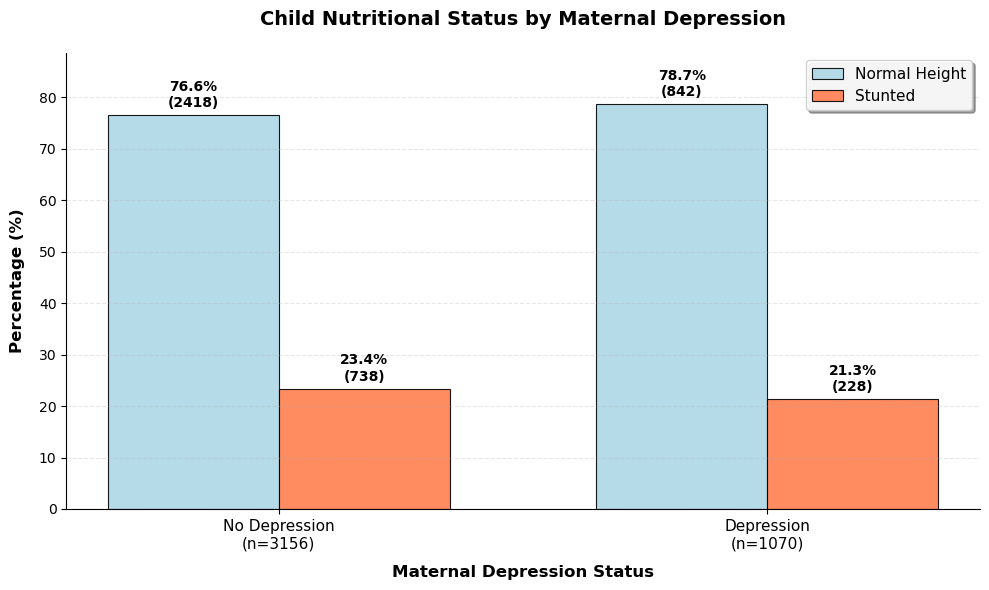


DETAILED BREAKDOWN: NUTRITIONAL STATUS BY MATERNAL DEPRESSION
        Group  Total N  Normal Height       Stunted
No Depression     3156 76.6% (n=2418) 23.4% (n=738)
   Depression     1070  78.7% (n=842) 21.3% (n=228)

Statistical Test:
Chi-square: χ²(1) = 1.836, p = 0.1754

Interpretation:
• No statistically significant association (p ≥ 0.05)
• Similar stunting patterns observed across maternal depression status


In [5]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS 
# =============================================================================

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

print("=== PLOT 1.1: STUNTING BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(10, 6))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['depression_binary'], analysis_df['stunting_binary'])
cross_tab = pd.crosstab(analysis_df['depression_binary'], analysis_df['stunting_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Depression', 'Depression']
normal_height = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Normal height percentages
stunted = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]        # Stunted percentages

# Counts for labels
normal_height_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
stunted_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart
bars_normal = plt.bar(x_pos - bar_width/2, normal_height, bar_width, 
                      color='lightblue', label='Normal Height', 
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_stunted = plt.bar(x_pos + bar_width/2, stunted, bar_width, 
                       color='coral', label='Stunted',
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, normal_height, normal_height_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_stunted, stunted, stunted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Nutritional Status by Maternal Depression', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Depression Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(normal_height + stunted) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: NUTRITIONAL STATUS BY MATERNAL DEPRESSION")
print("="*60)

summary_data = []
for i, group in enumerate(['No Depression', 'Depression']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Normal Height': f"{normal_height[i]:.1f}% (n={normal_height_counts[i]})",
        'Stunted': f"{stunted[i]:.1f}% (n={stunted_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    diff = abs(stunted[0] - stunted[1])
    direction = "higher" if stunted[1] > stunted[0] else "lower"
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Stunting prevalence is {diff:.1f} percentage points {direction} in children of depressed mothers")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Similar stunting patterns observed across maternal depression status")

=== SIDE-BY-SIDE STUNTING BY MATERNAL DEPRESSION ===


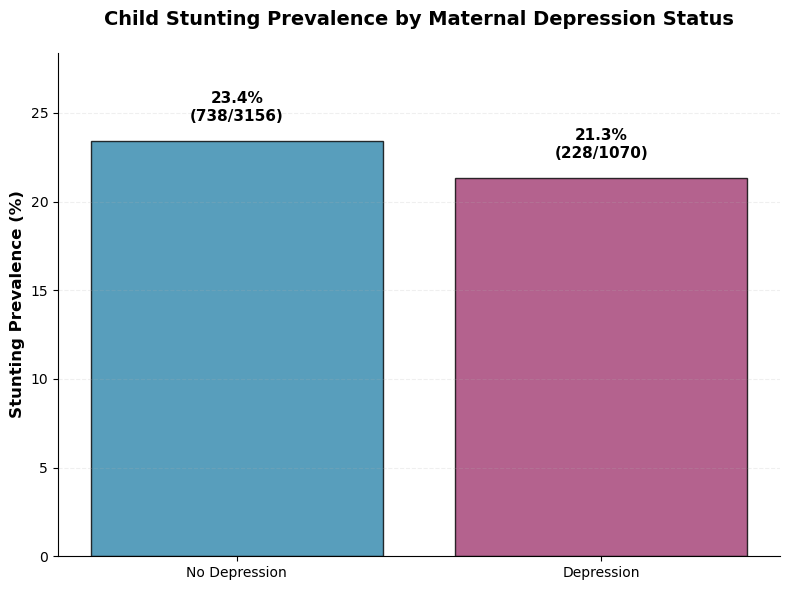

In [6]:
# Alternative: Side-by-side comparison of stunting prevalence only
print("=== SIDE-BY-SIDE STUNTING BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(8, 6))

# Extract just stunting prevalence
stunting_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Depression', 'Depression']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

bars = plt.bar(groups, stunting_prev, color=['#2E86AB', '#A23B72'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(stunting_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Stunting Prevalence by Maternal Depression Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Stunting Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(stunting_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

=== STUNTING BY MATERNAL ANXIETY ===


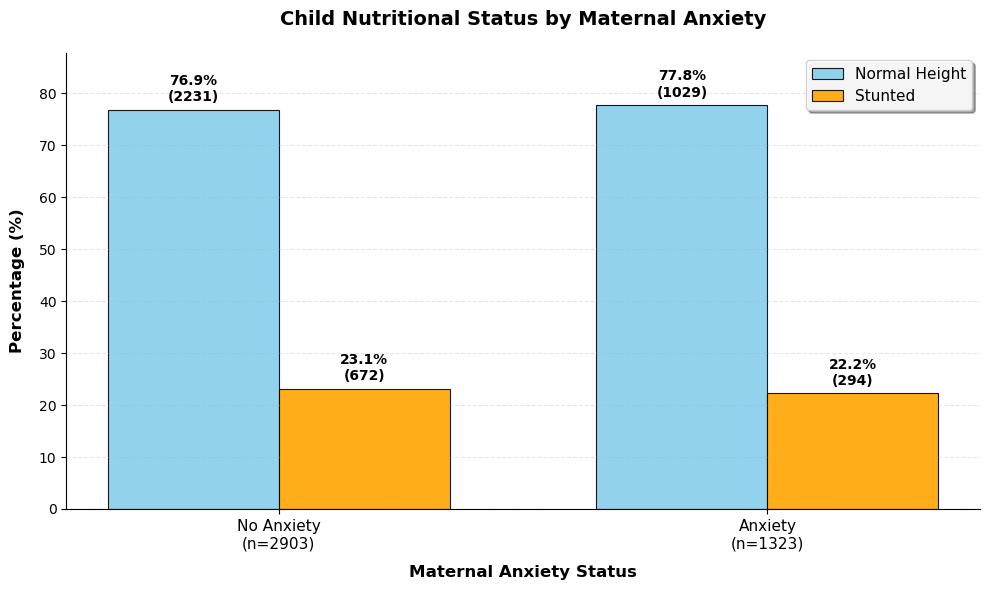


DETAILED BREAKDOWN: NUTRITIONAL STATUS BY MATERNAL ANXIETY
     Group  Total N  Normal Height       Stunted
No Anxiety     2903 76.9% (n=2231) 23.1% (n=672)
   Anxiety     1323 77.8% (n=1029) 22.2% (n=294)

Statistical Test:
Chi-square: χ²(1) = 0.391, p = 0.5317


In [7]:
# =============================================================================
# ANXIETY VERSION - CLUSTERED BAR CHART
# =============================================================================

print("=== STUNTING BY MATERNAL ANXIETY ===")

plt.figure(figsize=(10, 6))

# Calculate the data for ANXIETY
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['stunting_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['stunting_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Anxiety', 'Anxiety']
normal_height = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Normal height percentages
stunted = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]        # Stunted percentages

# Counts for labels
normal_height_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
stunted_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# For anxiety charts - Professional Blue & Orange
bars_normal = plt.bar(x_pos - bar_width/2, normal_height, bar_width, 
                      color='#87CEEB', label='Normal Height',  # Sky Blue
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_stunted = plt.bar(x_pos + bar_width/2, stunted, bar_width, 
                       color='#FFA500', label='Stunted',        # Orange
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, normal_height, normal_height_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_stunted, stunted, stunted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Nutritional Status by Maternal Anxiety', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Anxiety Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(normal_height + stunted) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis for anxiety
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: NUTRITIONAL STATUS BY MATERNAL ANXIETY")
print("="*60)

summary_data = []
for i, group in enumerate(['No Anxiety', 'Anxiety']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Normal Height': f"{normal_height[i]:.1f}% (n={normal_height_counts[i]})",
        'Stunted': f"{stunted[i]:.1f}% (n={stunted_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

=== PLOT 1.4: SIDE-BY-SIDE STUNTING BY MATERNAL DEPRESSION ===


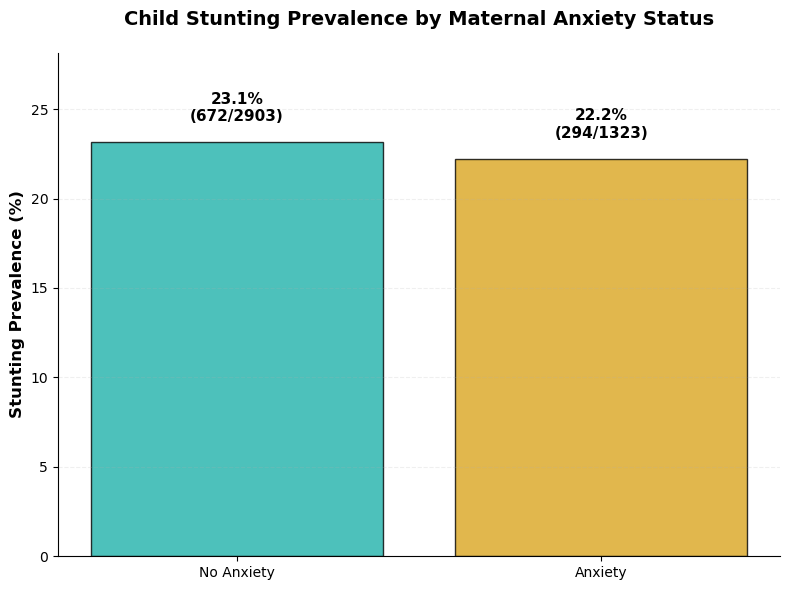

In [8]:
# =============================================================================
# SIDE-BY-SIDE COMPARISON: STUNTING BY MATERNAL ANXIETY
# =============================================================================
print("=== PLOT 1.4: SIDE-BY-SIDE STUNTING BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(8, 6))

# Calculate data for ANXIETY
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['stunting_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['stunting_binary'], normalize='index') * 100

# Extract just stunting prevalence
stunting_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Anxiety', 'Anxiety']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Anxiety colors: Green & Purple theme
bars = plt.bar(groups, stunting_prev, color=['#20B2AA', '#DAA520'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(stunting_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Stunting Prevalence by Maternal Anxiety Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Stunting Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(stunting_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

=== PLOT 2.1: WASTING BY MATERNAL DEPRESSION ===


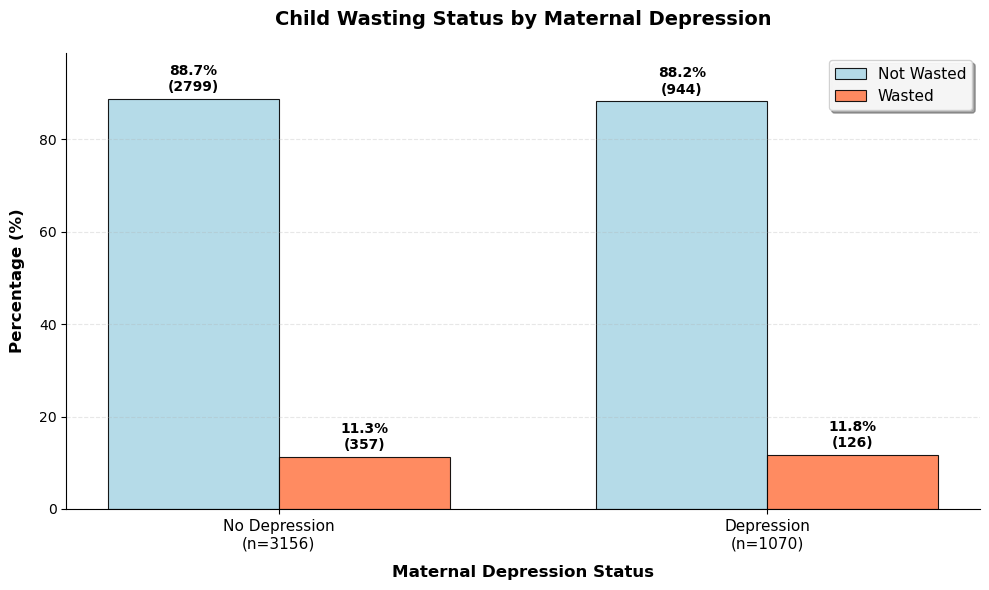


DETAILED BREAKDOWN: WASTING STATUS BY MATERNAL DEPRESSION
        Group  Total N     Not Wasted        Wasted
No Depression     3156 88.7% (n=2799) 11.3% (n=357)
   Depression     1070  88.2% (n=944) 11.8% (n=126)

Statistical Test:
Chi-square: χ²(1) = 0.127, p = 0.7214

Interpretation:
• No statistically significant association (p ≥ 0.05)
• Similar wasting patterns observed across maternal depression status


In [9]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT
# =============================================================================

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

print("=== PLOT 2.1: WASTING BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(10, 6))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['depression_binary'], analysis_df['wasting_binary'])
cross_tab = pd.crosstab(analysis_df['depression_binary'], analysis_df['wasting_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Depression', 'Depression']
not_wasted = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Not wasted percentages
wasted = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]      # Wasted percentages

# Counts for labels
not_wasted_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
wasted_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart
bars_normal = plt.bar(x_pos - bar_width/2, not_wasted, bar_width, 
                      color='lightblue', label='Not Wasted', 
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_wasted = plt.bar(x_pos + bar_width/2, wasted, bar_width, 
                       color='coral', label='Wasted',
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, not_wasted, not_wasted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_wasted, wasted, wasted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Wasting Status by Maternal Depression', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Depression Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(not_wasted + wasted) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: WASTING STATUS BY MATERNAL DEPRESSION")
print("="*60)

summary_data = []
for i, group in enumerate(['No Depression', 'Depression']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Not Wasted': f"{not_wasted[i]:.1f}% (n={not_wasted_counts[i]})",
        'Wasted': f"{wasted[i]:.1f}% (n={wasted_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    diff = abs(wasted[0] - wasted[1])
    direction = "higher" if wasted[1] > wasted[0] else "lower"
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Wasting prevalence is {diff:.1f} percentage points {direction} in children of depressed mothers")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Similar wasting patterns observed across maternal depression status")

=== SIDE-BY-SIDE WASTING BY MATERNAL DEPRESSION ===


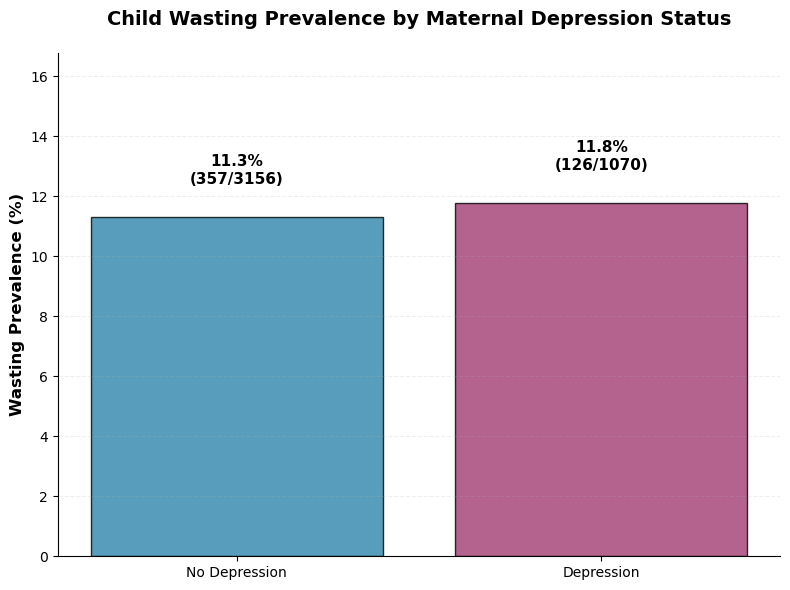

In [10]:
# Alternative: Side-by-side comparison of wasting prevalence only
print("=== SIDE-BY-SIDE WASTING BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(8, 6))

# Extract just wasting prevalence
wasting_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Depression', 'Depression']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

bars = plt.bar(groups, wasting_prev, color=['#2E86AB', '#A23B72'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(wasting_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Wasting Prevalence by Maternal Depression Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Wasting Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(wasting_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

=== WASTING BY MATERNAL ANXIETY ===


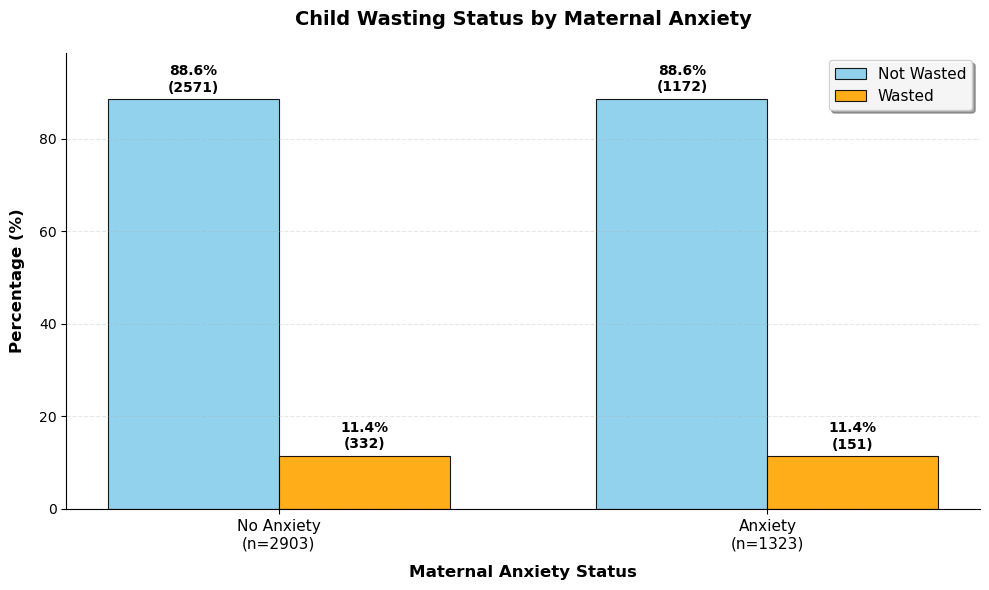


DETAILED BREAKDOWN: WASTING STATUS BY MATERNAL ANXIETY
     Group  Total N     Not Wasted        Wasted
No Anxiety     2903 88.6% (n=2571) 11.4% (n=332)
   Anxiety     1323 88.6% (n=1172) 11.4% (n=151)

Statistical Test:
Chi-square: χ²(1) = 0.000, p = 1.0000


In [11]:
# =============================================================================
# ANXIETY VERSION - CLUSTERED BAR CHART FOR WASTING
# =============================================================================

print("=== WASTING BY MATERNAL ANXIETY ===")

plt.figure(figsize=(10, 6))

# Calculate the data for ANXIETY and WASTING
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['wasting_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['wasting_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Anxiety', 'Anxiety']
not_wasted = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Not wasted percentages
wasted = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]      # Wasted percentages

# Counts for labels
not_wasted_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
wasted_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# For anxiety charts - Professional Blue & Orange
bars_normal = plt.bar(x_pos - bar_width/2, not_wasted, bar_width, 
                      color='#87CEEB', label='Not Wasted',  # Sky Blue
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_wasted = plt.bar(x_pos + bar_width/2, wasted, bar_width, 
                       color='#FFA500', label='Wasted',        # Orange
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, not_wasted, not_wasted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_wasted, wasted, wasted_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Wasting Status by Maternal Anxiety', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Anxiety Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(not_wasted + wasted) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis for anxiety
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: WASTING STATUS BY MATERNAL ANXIETY")
print("="*60)

summary_data = []
for i, group in enumerate(['No Anxiety', 'Anxiety']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Not Wasted': f"{not_wasted[i]:.1f}% (n={not_wasted_counts[i]})",
        'Wasted': f"{wasted[i]:.1f}% (n={wasted_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

=== SIDE-BY-SIDE WASTING BY ANXIETY ===


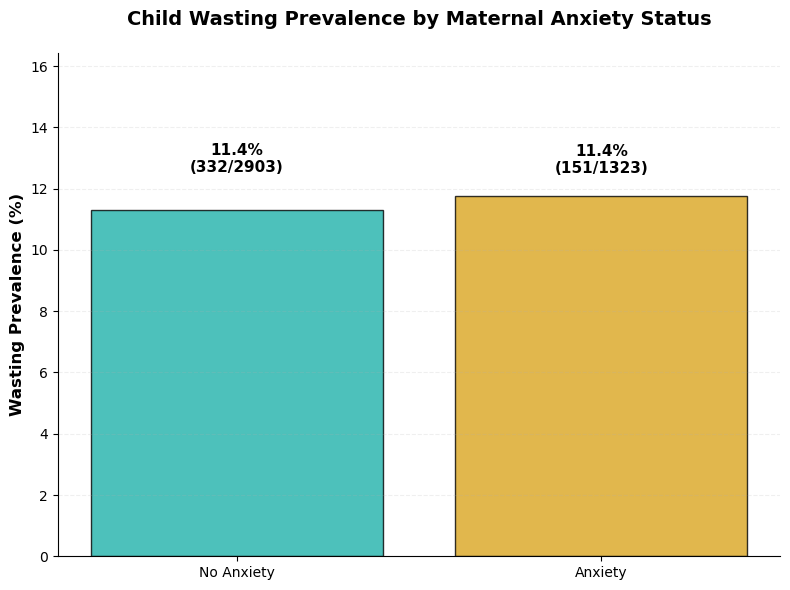

In [12]:
# =============================================================================
# SIDE-BY-SIDE COMPARISON: WASTING BY MATERNAL ANXIETY
# =============================================================================
print("=== SIDE-BY-SIDE WASTING BY ANXIETY ===")

plt.figure(figsize=(8, 6))

# Calculate data for ANXIETY
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['wasting_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['wasting_binary'], normalize='index') * 100

# Extract just stunting prevalence
stunting_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Anxiety', 'Anxiety']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Anxiety colors: Green & Purple theme
bars = plt.bar(groups, wasting_prev, color=['#20B2AA', '#DAA520'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(stunting_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Wasting Prevalence by Maternal Anxiety Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Wasting Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(stunting_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

=== UNDERWEIGHT BY MATERNAL DEPRESSION ===


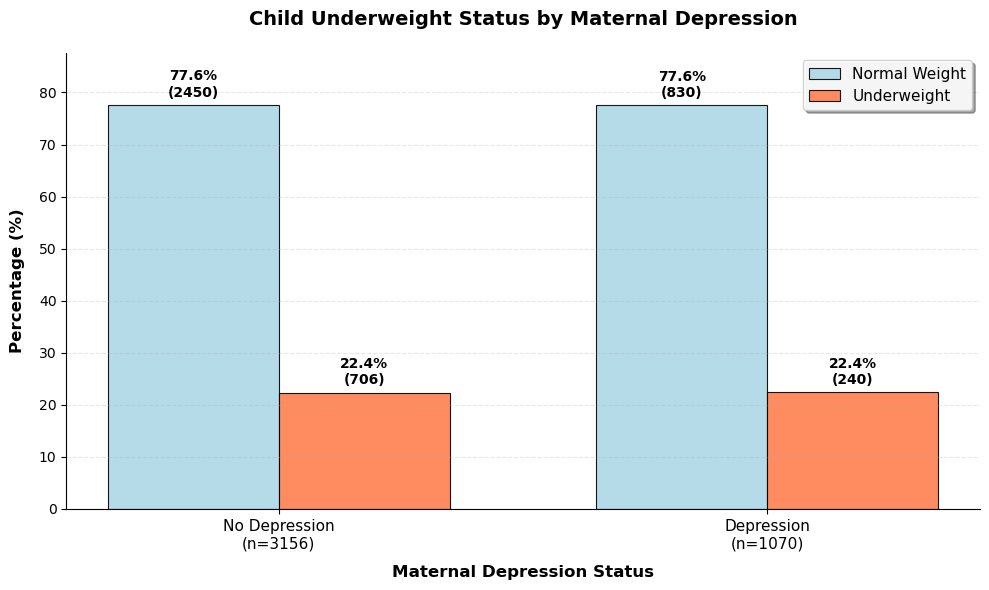


DETAILED BREAKDOWN: UNDERWEIGHT STATUS BY MATERNAL DEPRESSION
        Group  Total N  Normal Weight   Underweight
No Depression     3156 77.6% (n=2450) 22.4% (n=706)
   Depression     1070  77.6% (n=830) 22.4% (n=240)

Statistical Test:
Chi-square: χ²(1) = 0.000, p = 1.0000

Interpretation:
• No statistically significant association (p ≥ 0.05)
• Similar underweight patterns observed across maternal depression status


In [13]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT
# =============================================================================

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

print("=== UNDERWEIGHT BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(10, 6))

# Calculate the data for UNDERWEIGHT
contingency_table = pd.crosstab(analysis_df['depression_binary'], analysis_df['underweight_binary'])
cross_tab = pd.crosstab(analysis_df['depression_binary'], analysis_df['underweight_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Depression', 'Depression']
normal_weight = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Normal weight percentages
underweight = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]    # Underweight percentages

# Counts for labels
normal_weight_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
underweight_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart
bars_normal = plt.bar(x_pos - bar_width/2, normal_weight, bar_width, 
                      color='lightblue', label='Normal Weight', 
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_underweight = plt.bar(x_pos + bar_width/2, underweight, bar_width, 
                       color='coral', label='Underweight',
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, normal_weight, normal_weight_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_underweight, underweight, underweight_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Underweight Status by Maternal Depression', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Depression Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(normal_weight + underweight) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: UNDERWEIGHT STATUS BY MATERNAL DEPRESSION")
print("="*60)

summary_data = []
for i, group in enumerate(['No Depression', 'Depression']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Normal Weight': f"{normal_weight[i]:.1f}% (n={normal_weight_counts[i]})",
        'Underweight': f"{underweight[i]:.1f}% (n={underweight_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    diff = abs(underweight[0] - underweight[1])
    direction = "higher" if underweight[1] > underweight[0] else "lower"
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Underweight prevalence is {diff:.1f} percentage points {direction} in children of depressed mothers")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Similar underweight patterns observed across maternal depression status")

=== SIDE-BY-SIDE UNDERWEIGHT BY MATERNAL DEPRESSION ===


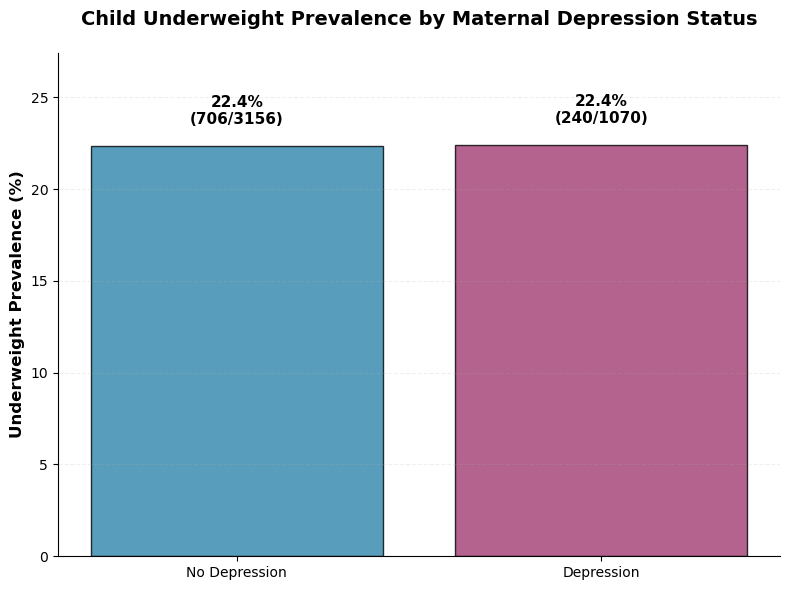

In [14]:
# Alternative: Side-by-side comparison of underweight prevalence only
print("=== SIDE-BY-SIDE UNDERWEIGHT BY MATERNAL DEPRESSION ===")

plt.figure(figsize=(8, 6))

# Calculate data for underweight
contingency_table = pd.crosstab(analysis_df['depression_binary'], analysis_df['underweight_binary'])
cross_tab = pd.crosstab(analysis_df['depression_binary'], analysis_df['underweight_binary'], normalize='index') * 100

# Extract just underweight prevalence
underweight_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Depression', 'Depression']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

bars = plt.bar(groups, underweight_prev, color=['#2E86AB', '#A23B72'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(underweight_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Underweight Prevalence by Maternal Depression Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Underweight Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(underweight_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

=== UNDERWEIGHT BY MATERNAL ANXIETY ===


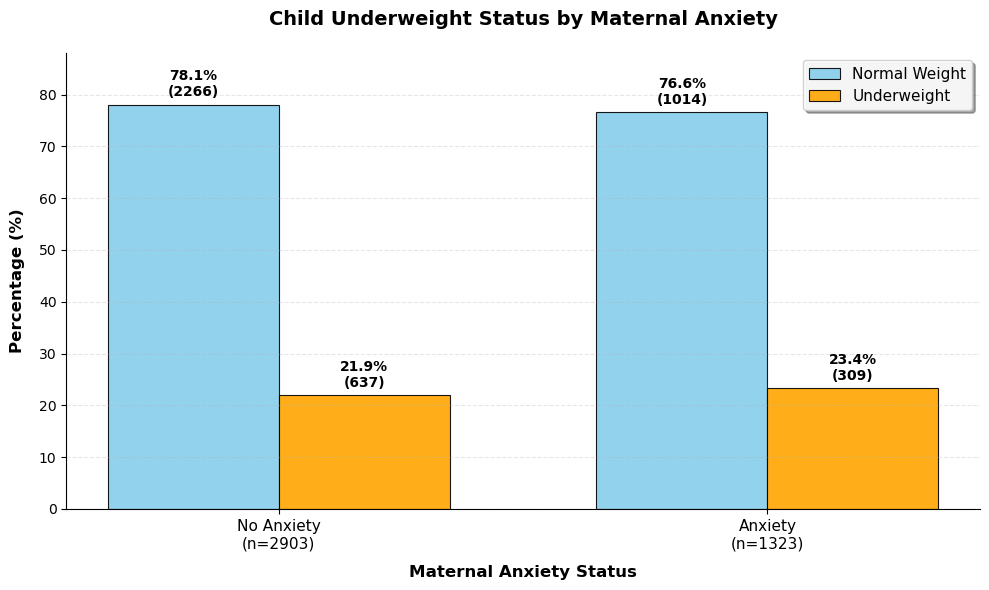


DETAILED BREAKDOWN: UNDERWEIGHT STATUS BY MATERNAL ANXIETY
     Group  Total N  Normal Weight   Underweight
No Anxiety     2903 78.1% (n=2266) 21.9% (n=637)
   Anxiety     1323 76.6% (n=1014) 23.4% (n=309)

Statistical Test:
Chi-square: χ²(1) = 0.965, p = 0.3260


In [15]:
# =============================================================================
# ANXIETY VERSION - CLUSTERED BAR CHART FOR UNDERWEIGHT
# =============================================================================

print("=== UNDERWEIGHT BY MATERNAL ANXIETY ===")

plt.figure(figsize=(10, 6))

# Calculate the data for ANXIETY and UNDERWEIGHT
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['underweight_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['underweight_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = ['No Anxiety', 'Anxiety']
normal_weight = [cross_tab.iloc[0, 0], cross_tab.iloc[1, 0]]  # Normal weight percentages
underweight = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]    # Underweight percentages

# Counts for labels
normal_weight_counts = [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0]]
underweight_counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
total_counts = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# For anxiety charts - Professional Blue & Orange
bars_normal = plt.bar(x_pos - bar_width/2, normal_weight, bar_width, 
                      color='#87CEEB', label='Normal Weight',  # Sky Blue
                      edgecolor='black', linewidth=0.8, alpha=0.9)
bars_underweight = plt.bar(x_pos + bar_width/2, underweight, bar_width, 
                       color='#FFA500', label='Underweight',        # Orange
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_normal, normal_weight, normal_weight_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_underweight, underweight, underweight_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Child Underweight Status by Maternal Anxiety', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Maternal Anxiety Status', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(normal_weight + underweight) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis for anxiety
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: UNDERWEIGHT STATUS BY MATERNAL ANXIETY")
print("="*60)

summary_data = []
for i, group in enumerate(['No Anxiety', 'Anxiety']):
    summary_data.append({
        'Group': group,
        'Total N': total_counts[i],
        'Normal Weight': f"{normal_weight[i]:.1f}% (n={normal_weight_counts[i]})",
        'Underweight': f"{underweight[i]:.1f}% (n={underweight_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

=== SIDE-BY-SIDE UNDERWEIGHT BY ANXIETY ===


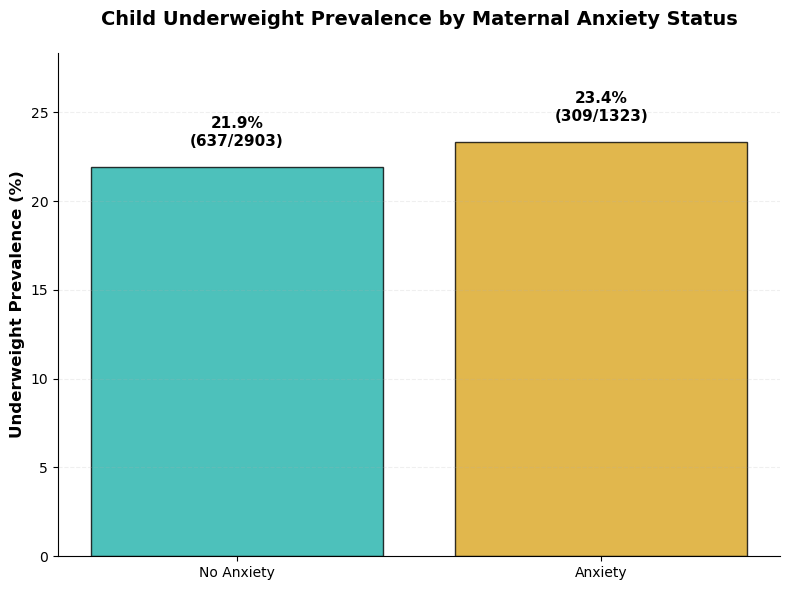


Statistical Test for Underweight by Anxiety:
Chi-square: χ²(1) = 0.965, p = 0.3260


In [16]:
# =============================================================================
# SIDE-BY-SIDE COMPARISON: UNDERWEIGHT BY MATERNAL ANXIETY
# =============================================================================
print("=== SIDE-BY-SIDE UNDERWEIGHT BY ANXIETY ===")

plt.figure(figsize=(8, 6))

# Calculate data for ANXIETY and UNDERWEIGHT
contingency_table = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['underweight_binary'])
cross_tab = pd.crosstab(analysis_df['anxiety_binary'], analysis_df['underweight_binary'], normalize='index') * 100

# Extract just underweight prevalence
underweight_prev = [cross_tab.iloc[0, 1], cross_tab.iloc[1, 1]]
groups = ['No Anxiety', 'Anxiety']
counts = [contingency_table.iloc[0, 1], contingency_table.iloc[1, 1]]
totals = [contingency_table.iloc[0].sum(), contingency_table.iloc[1].sum()]

# Anxiety colors: Teal & Gold theme
bars = plt.bar(groups, underweight_prev, color=['#20B2AA', '#DAA520'], alpha=0.8, 
               edgecolor='black', linewidth=1)

# Add value labels on top of bars
for i, (prev, count, total) in enumerate(zip(underweight_prev, counts, totals)):
    plt.text(i, prev + 1, f'{prev:.1f}%\n({count}/{total})', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Child Underweight Prevalence by Maternal Anxiety Status', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Underweight Prevalence (%)', fontsize=12, fontweight='bold')
plt.ylim(0, max(underweight_prev) + 5)

# Clean styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

# Statistical analysis for anxiety and underweight
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nStatistical Test for Underweight by Anxiety:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

=== PLOT: DEPRESSION BY WEALTH QUINTILE ===


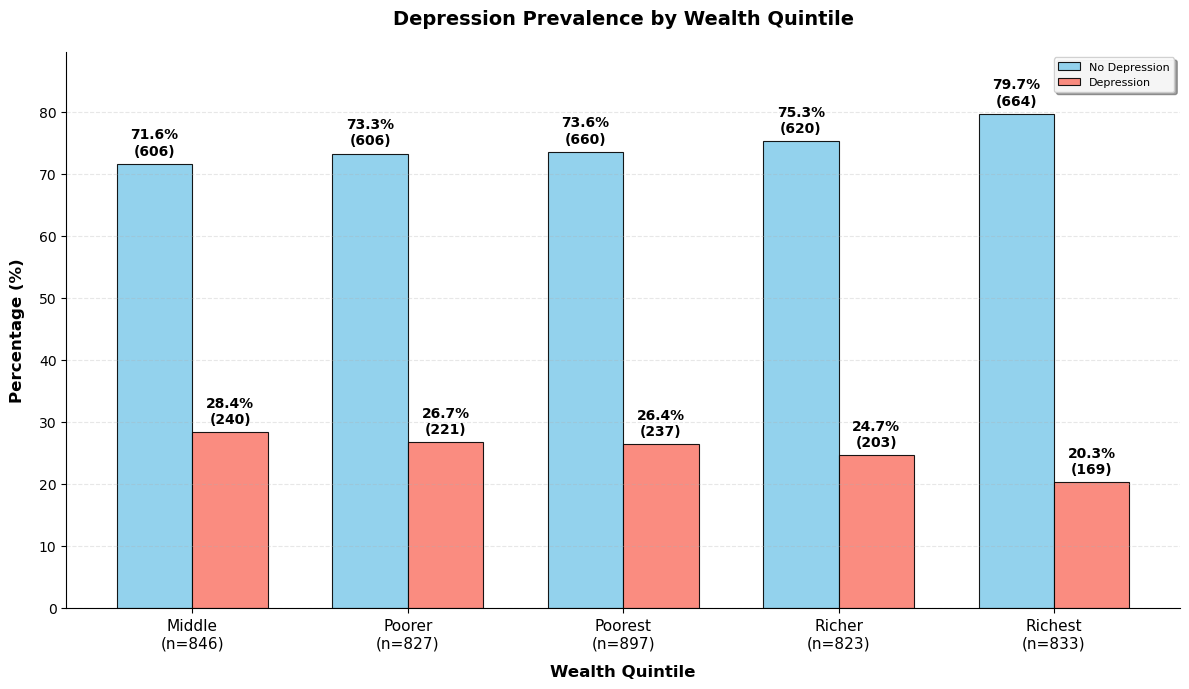


DETAILED BREAKDOWN: DEPRESSION BY WEALTH QUINTILE
Wealth Quintile  Total N No Depression    Depression
         Middle      846 71.6% (n=606) 28.4% (n=240)
         Poorer      827 73.3% (n=606) 26.7% (n=221)
        Poorest      897 73.6% (n=660) 26.4% (n=237)
         Richer      823 75.3% (n=620) 24.7% (n=203)
        Richest      833 79.7% (n=664) 20.3% (n=169)

Statistical Test:
Chi-square: χ²(4) = 16.936, p = 0.0020

Interpretation:
• Statistically significant association (p < 0.05)
• Depression prevalence varies significantly across wealth quintiles


In [17]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT
# =============================================================================

print("=== PLOT: DEPRESSION BY WEALTH QUINTILE ===")

plt.figure(figsize=(12, 7))

# Use analysis_df instead of df
contingency_table = pd.crosstab(analysis_df['wealth_quintile'], analysis_df['depression_binary'])
cross_tab = pd.crosstab(analysis_df['wealth_quintile'], analysis_df['depression_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = sorted(analysis_df['wealth_quintile'].unique())
no_depression = [cross_tab.loc[cat, 0] for cat in categories]  # No depression percentages
depression = [cross_tab.loc[cat, 1] for cat in categories]     # Depression percentages

# Counts for labels
no_depression_counts = [contingency_table.loc[cat, 0] for cat in categories]
depression_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart
bars_no_depression = plt.bar(x_pos - bar_width/2, no_depression, bar_width, 
                             color='skyblue', label='No Depression', 
                             edgecolor='black', linewidth=0.8, alpha=0.9)
bars_depression = plt.bar(x_pos + bar_width/2, depression, bar_width, 
                          color='salmon', label='Depression',
                          edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_depression, no_depression, no_depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_depression, depression, depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Depression Prevalence by Wealth Quintile', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Wealth Quintile', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=8)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_depression + depression) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: DEPRESSION BY WEALTH QUINTILE")
print("="*60)

summary_data = []
for i, quintile in enumerate(categories):
    summary_data.append({
        'Wealth Quintile': quintile,
        'Total N': total_counts[i],
        'No Depression': f"{no_depression[i]:.1f}% (n={no_depression_counts[i]})",
        'Depression': f"{depression[i]:.1f}% (n={depression_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Depression prevalence varies significantly across wealth quintiles")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Depression prevalence is similar across wealth quintiles")

 Creating Socioeconomic Gradient Plot...


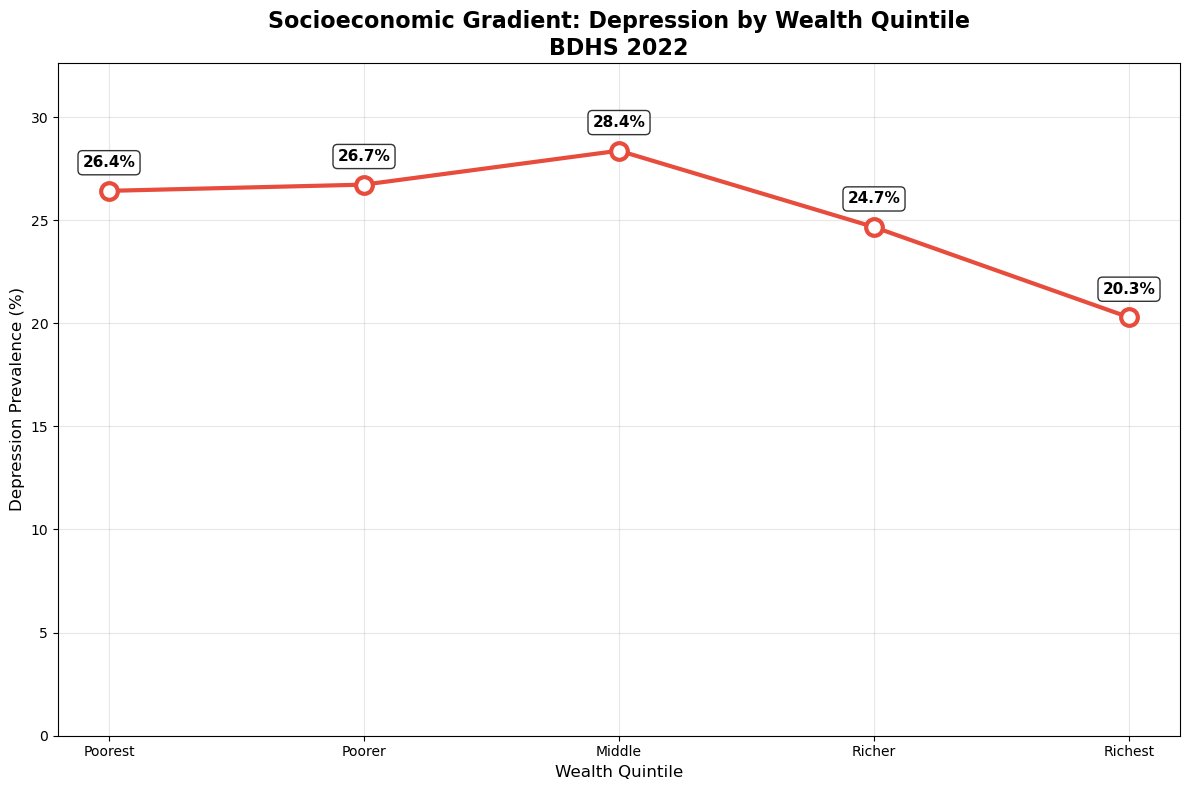

In [18]:
# =============================================================================
# SOCIOECONOMIC GRADIENT PLOT
# =============================================================================

print(" Creating Socioeconomic Gradient Plot...")

plt.figure(figsize=(12, 8))
if all(var in analysis_df.columns for var in ['wealth_quintile', 'depression_binary']):
    wealth_order = ['Poorest', 'Poorer', 'Middle', 'Richer', 'Richest']
    wealth_depression = analysis_df.groupby('wealth_quintile')['depression_binary'].mean() * 100
    wealth_depression = wealth_depression.reindex(wealth_order)
    
    if not wealth_depression.empty:
        # Remove any NaN values
        valid_indices = [i for i, val in enumerate(wealth_depression.values) if np.isfinite(val)]
        valid_values = [wealth_depression.values[i] for i in valid_indices]
        valid_labels = [wealth_depression.index[i] for i in valid_indices]
        
        if valid_values:
            plt.plot(range(len(valid_values)), valid_values, 
                    marker='o', linewidth=3, markersize=12, color='#e74c3c', 
                    markerfacecolor='white', markeredgewidth=3)
            plt.title('Socioeconomic Gradient: Depression by Wealth Quintile\nBDHS 2022', 
                     fontweight='bold', fontsize=16)
            plt.xlabel('Wealth Quintile', fontsize=12)
            plt.ylabel('Depression Prevalence (%)', fontsize=12)
            plt.xticks(range(len(valid_values)), valid_labels, rotation=0)
            plt.grid(True, alpha=0.3)
            plt.ylim(0, max(valid_values) * 1.15)
            
            # Add value labels
            for i, value in enumerate(valid_values):
                plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', 
                        fontsize=11, fontweight='bold', 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('4_wealth_depression_gradient.png', dpi=300, bbox_inches='tight')
    plt.show()

=== PLOT 6: ANXIETY BY WEALTH QUINTILE ===


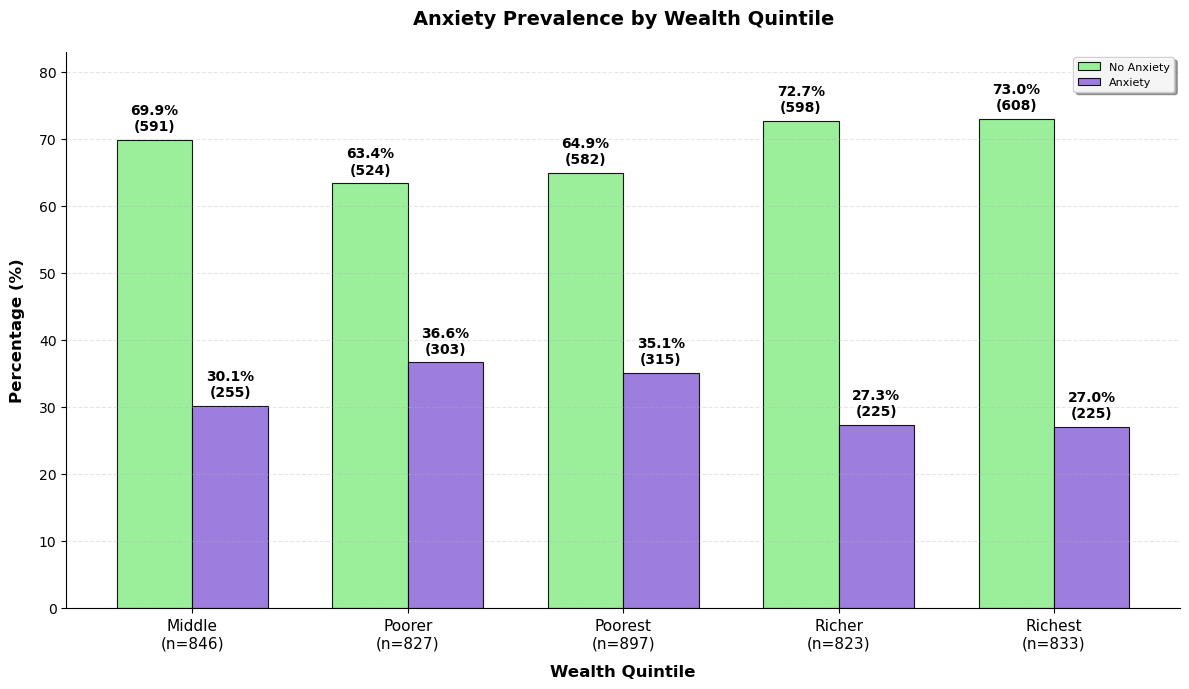


DETAILED BREAKDOWN: ANXIETY BY WEALTH QUINTILE
Wealth Quintile  Total N    No Anxiety       Anxiety
         Middle      846 69.9% (n=591) 30.1% (n=255)
         Poorer      827 63.4% (n=524) 36.6% (n=303)
        Poorest      897 64.9% (n=582) 35.1% (n=315)
         Richer      823 72.7% (n=598) 27.3% (n=225)
        Richest      833 73.0% (n=608) 27.0% (n=225)

Statistical Test:
Chi-square: χ²(4) = 30.695, p = 0.0000

Interpretation:
• Statistically significant association (p < 0.05)
• Anxiety prevalence varies significantly across wealth quintiles


In [19]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - ANXIETY BY WEALTH QUINTILE
# =============================================================================

print("=== PLOT 6: ANXIETY BY WEALTH QUINTILE ===")

plt.figure(figsize=(12, 7))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['wealth_quintile'], analysis_df['anxiety_binary'])
cross_tab = pd.crosstab(analysis_df['wealth_quintile'], analysis_df['anxiety_binary'], normalize='index') * 100

# Prepare data for clustered bars
categories = sorted(analysis_df['wealth_quintile'].unique())
no_anxiety = [cross_tab.loc[cat, 0] for cat in categories]  # No anxiety percentages
anxiety = [cross_tab.loc[cat, 1] for cat in categories]     # Anxiety percentages

# Counts for labels
no_anxiety_counts = [contingency_table.loc[cat, 0] for cat in categories]
anxiety_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart with anxiety colors (Green & Purple)
bars_no_anxiety = plt.bar(x_pos - bar_width/2, no_anxiety, bar_width, 
                          color='#90EE90', label='No Anxiety',  # Light Green
                          edgecolor='black', linewidth=0.8, alpha=0.9)
bars_anxiety = plt.bar(x_pos + bar_width/2, anxiety, bar_width, 
                       color='#9370DB', label='Anxiety',        # Medium Purple
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_anxiety, no_anxiety, no_anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_anxiety, anxiety, anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Anxiety Prevalence by Wealth Quintile', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Wealth Quintile', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=8)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_anxiety + anxiety) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: ANXIETY BY WEALTH QUINTILE")
print("="*60)

summary_data = []
for i, quintile in enumerate(categories):
    summary_data.append({
        'Wealth Quintile': quintile,
        'Total N': total_counts[i],
        'No Anxiety': f"{no_anxiety[i]:.1f}% (n={no_anxiety_counts[i]})",
        'Anxiety': f"{anxiety[i]:.1f}% (n={anxiety_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Anxiety prevalence varies significantly across wealth quintiles")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Anxiety prevalence is similar across wealth quintiles")

 Creating Socioeconomic Gradient Plot...


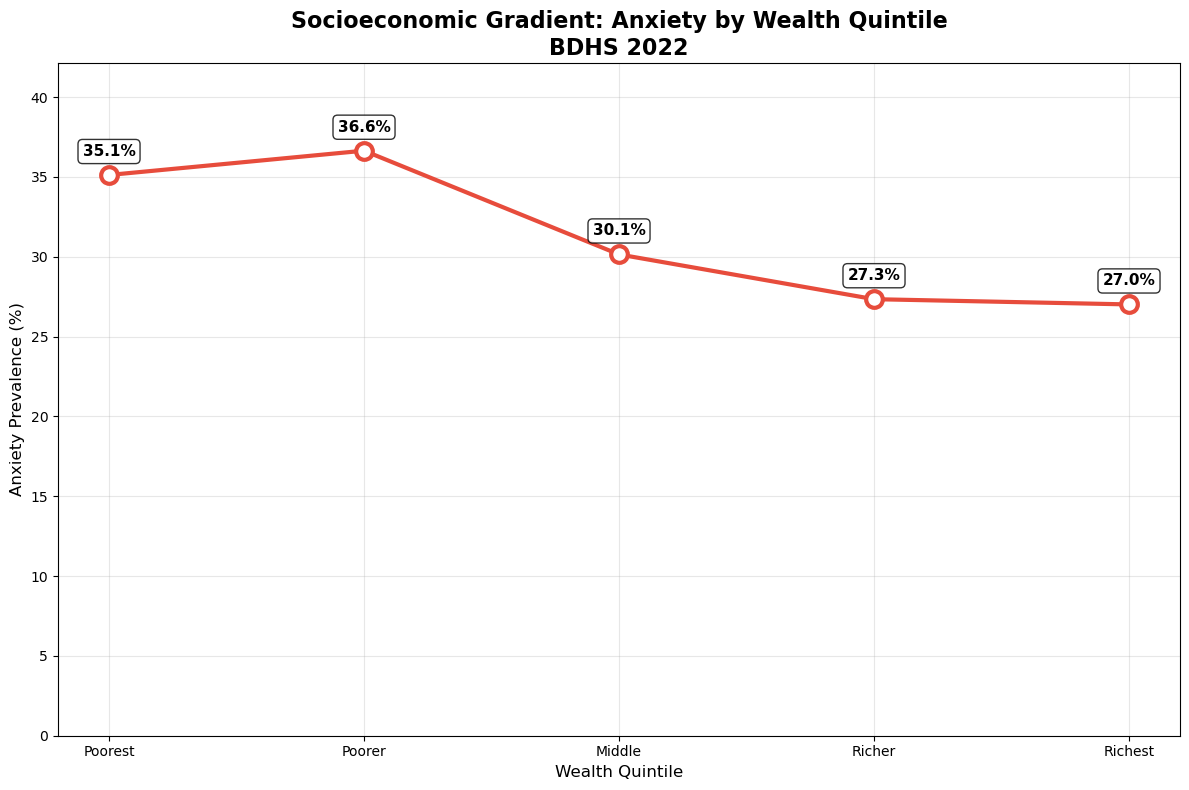

In [20]:
# =============================================================================
# SOCIOECONOMIC GRADIENT PLOT
# =============================================================================

print(" Creating Socioeconomic Gradient Plot...")

plt.figure(figsize=(12, 8))
if all(var in analysis_df.columns for var in ['wealth_quintile', 'anxiety_binary']):
    wealth_order = ['Poorest', 'Poorer', 'Middle', 'Richer', 'Richest']
    wealth_depression = analysis_df.groupby('wealth_quintile')['anxiety_binary'].mean() * 100
    wealth_depression = wealth_depression.reindex(wealth_order)
    
    if not wealth_depression.empty:
        # Remove any NaN values
        valid_indices = [i for i, val in enumerate(wealth_depression.values) if np.isfinite(val)]
        valid_values = [wealth_depression.values[i] for i in valid_indices]
        valid_labels = [wealth_depression.index[i] for i in valid_indices]
        
        if valid_values:
            plt.plot(range(len(valid_values)), valid_values, 
                    marker='o', linewidth=3, markersize=12, color='#e74c3c', 
                    markerfacecolor='white', markeredgewidth=3)
            plt.title('Socioeconomic Gradient: Anxiety by Wealth Quintile\nBDHS 2022', 
                     fontweight='bold', fontsize=16)
            plt.xlabel('Wealth Quintile', fontsize=12)
            plt.ylabel('Anxiety Prevalence (%)', fontsize=12)
            plt.xticks(range(len(valid_values)), valid_labels, rotation=0)
            plt.grid(True, alpha=0.3)
            plt.ylim(0, max(valid_values) * 1.15)
            
            # Add value labels
            for i, value in enumerate(valid_values):
                plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', 
                        fontsize=11, fontweight='bold', 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('4_wealth_depression_gradient.png', dpi=300, bbox_inches='tight')
    plt.show()

=== PLOT: DEPRESSION BY EDUCATION LEVEL ===


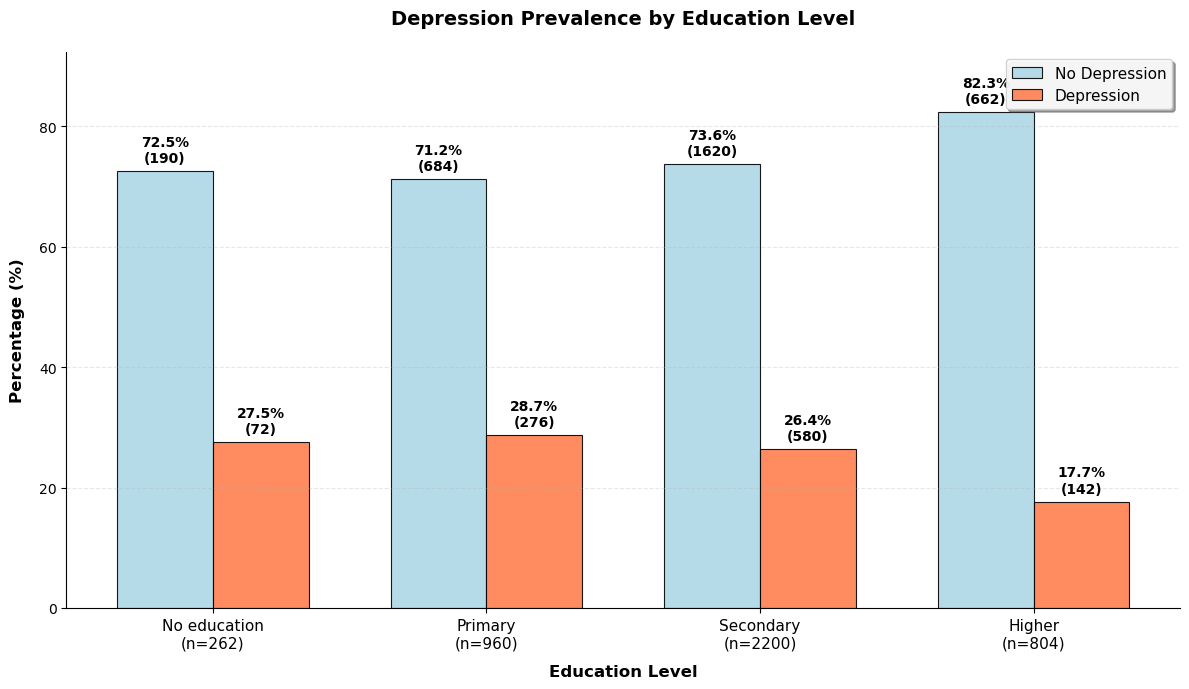


DETAILED BREAKDOWN: DEPRESSION BY EDUCATION LEVEL
Education Level  Total N  No Depression    Depression
   No education      262  72.5% (n=190)  27.5% (n=72)
        Primary      960  71.2% (n=684) 28.7% (n=276)
      Secondary     2200 73.6% (n=1620) 26.4% (n=580)
         Higher      804  82.3% (n=662) 17.7% (n=142)

Statistical Test:
Chi-square: χ²(3) = 32.825, p = 0.0000

Interpretation:
• Statistically significant association (p < 0.05)
• Depression prevalence varies significantly across education levels


In [21]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT: DEPRESSION BY EDUCATION LEVEL
# =============================================================================

print("=== PLOT: DEPRESSION BY EDUCATION LEVEL ===")

plt.figure(figsize=(12, 7))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['education_level'], analysis_df['depression_binary'])
cross_tab = pd.crosstab(analysis_df['education_level'], analysis_df['depression_binary'], normalize='index') * 100

# Prepare data for clustered bars - ensure consistent order
education_order = ['No education', 'Primary', 'Secondary', 'Higher']
categories = [cat for cat in education_order if cat in cross_tab.index]

no_depression = [cross_tab.loc[cat, 0] for cat in categories]  # No depression percentages
depression = [cross_tab.loc[cat, 1] for cat in categories]     # Depression percentages

# Counts for labels
no_depression_counts = [contingency_table.loc[cat, 0] for cat in categories]
depression_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart with depression colors
bars_no_depression = plt.bar(x_pos - bar_width/2, no_depression, bar_width, 
                             color='lightblue', label='No Depression', 
                             edgecolor='black', linewidth=0.8, alpha=0.9)
bars_depression = plt.bar(x_pos + bar_width/2, depression, bar_width, 
                          color='coral', label='Depression',
                          edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_depression, no_depression, no_depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_depression, depression, depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Depression Prevalence by Education Level', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Education Level', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_depression + depression) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: DEPRESSION BY EDUCATION LEVEL")
print("="*60)

summary_data = []
for i, education in enumerate(categories):
    summary_data.append({
        'Education Level': education,
        'Total N': total_counts[i],
        'No Depression': f"{no_depression[i]:.1f}% (n={no_depression_counts[i]})",
        'Depression': f"{depression[i]:.1f}% (n={depression_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Depression prevalence varies significantly across education levels")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Depression prevalence is similar across education levels")


=== PLOT 8: ANXIETY BY EDUCATION LEVEL ===


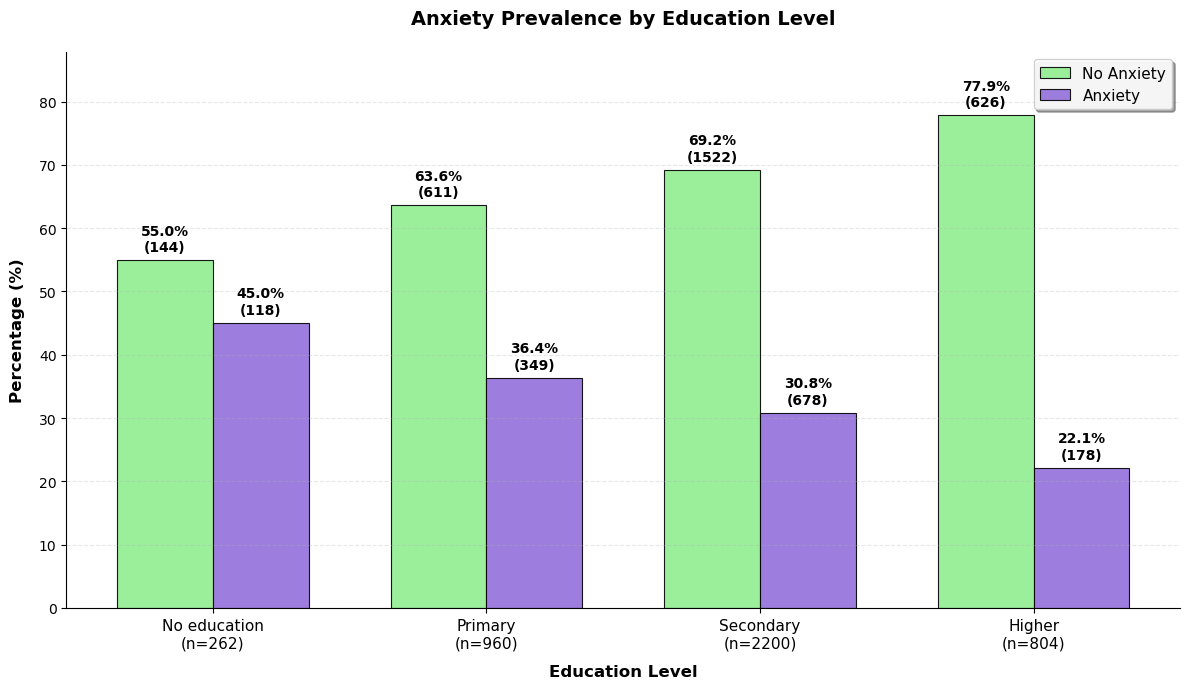


DETAILED BREAKDOWN: ANXIETY BY EDUCATION LEVEL
Education Level  Total N     No Anxiety       Anxiety
   No education      262  55.0% (n=144) 45.0% (n=118)
        Primary      960  63.6% (n=611) 36.4% (n=349)
      Secondary     2200 69.2% (n=1522) 30.8% (n=678)
         Higher      804  77.9% (n=626) 22.1% (n=178)

Statistical Test:
Chi-square: χ²(3) = 66.008, p = 0.0000

Interpretation:
• Statistically significant association (p < 0.05)
• Anxiety prevalence varies significantly across education levels


In [22]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT: ANXIETY BY EDUCATION LEVEL
# =============================================================================

print("\n" + "="*80)
print("=== PLOT 8: ANXIETY BY EDUCATION LEVEL ===")

plt.figure(figsize=(12, 7))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['education_level'], analysis_df['anxiety_binary'])
cross_tab = pd.crosstab(analysis_df['education_level'], analysis_df['anxiety_binary'], normalize='index') * 100

# Prepare data for clustered bars - ensure consistent order
education_order = ['No education', 'Primary', 'Secondary', 'Higher']
categories = [cat for cat in education_order if cat in cross_tab.index]

no_anxiety = [cross_tab.loc[cat, 0] for cat in categories]  # No anxiety percentages
anxiety = [cross_tab.loc[cat, 1] for cat in categories]     # Anxiety percentages

# Counts for labels
no_anxiety_counts = [contingency_table.loc[cat, 0] for cat in categories]
anxiety_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart with anxiety colors
bars_no_anxiety = plt.bar(x_pos - bar_width/2, no_anxiety, bar_width, 
                          color='#90EE90', label='No Anxiety',  # Light Green
                          edgecolor='black', linewidth=0.8, alpha=0.9)
bars_anxiety = plt.bar(x_pos + bar_width/2, anxiety, bar_width, 
                       color='#9370DB', label='Anxiety',        # Medium Purple
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_anxiety, no_anxiety, no_anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

for i, (bar, value, count) in enumerate(zip(bars_anxiety, anxiety, anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

# Customize the chart
plt.title('Anxiety Prevalence by Education Level', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Education Level', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=11)

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_anxiety + anxiety) + 10)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: ANXIETY BY EDUCATION LEVEL")
print("="*60)

summary_data = []
for i, education in enumerate(categories):
    summary_data.append({
        'Education Level': education,
        'Total N': total_counts[i],
        'No Anxiety': f"{no_anxiety[i]:.1f}% (n={no_anxiety_counts[i]})",
        'Anxiety': f"{anxiety[i]:.1f}% (n={anxiety_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Anxiety prevalence varies significantly across education levels")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Anxiety prevalence is similar across education levels")

=== PLOT 9: DEPRESSION BY REGION ===


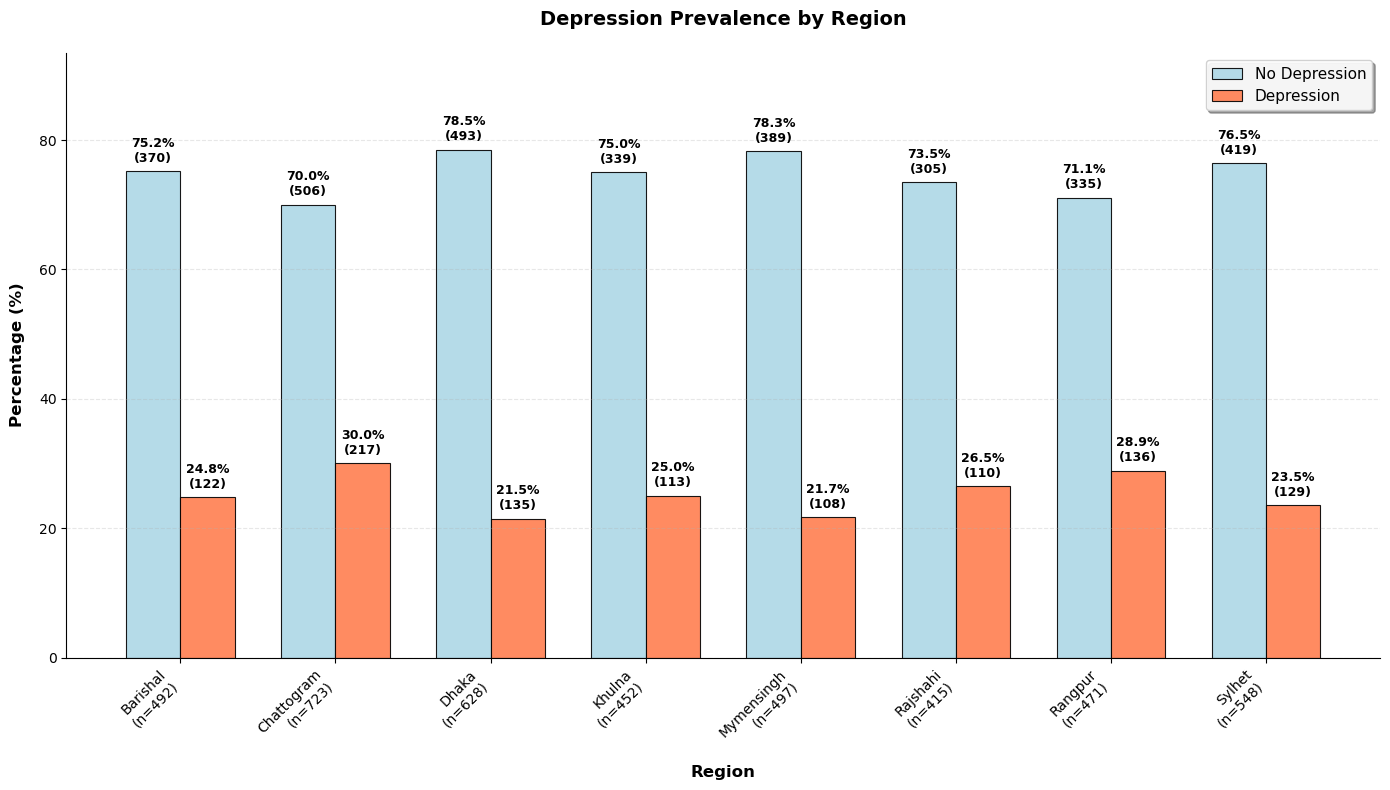


DETAILED BREAKDOWN: DEPRESSION BY REGION
    Region  Total N No Depression    Depression
  Barishal      492 75.2% (n=370) 24.8% (n=122)
Chattogram      723 70.0% (n=506) 30.0% (n=217)
     Dhaka      628 78.5% (n=493) 21.5% (n=135)
    Khulna      452 75.0% (n=339) 25.0% (n=113)
Mymensingh      497 78.3% (n=389) 21.7% (n=108)
  Rajshahi      415 73.5% (n=305) 26.5% (n=110)
   Rangpur      471 71.1% (n=335) 28.9% (n=136)
    Sylhet      548 76.5% (n=419) 23.5% (n=129)

Statistical Test:
Chi-square: χ²(7) = 21.136, p = 0.0036

Interpretation:
• Statistically significant association (p < 0.05)
• Depression prevalence varies significantly across regions
• Highest depression prevalence: Chattogram (30.0%)
• Lowest depression prevalence: Dhaka (21.5%)


In [23]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT: DEPRESSION BY REGION
# =============================================================================

print("=== PLOT 9: DEPRESSION BY REGION ===")

plt.figure(figsize=(14, 8))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['region'], analysis_df['depression_binary'])
cross_tab = pd.crosstab(analysis_df['region'], analysis_df['depression_binary'], normalize='index') * 100

# Prepare data for clustered bars - use natural order of regions
categories = sorted(contingency_table.index)  # Sort regions alphabetically or use your preferred order

no_depression = [cross_tab.loc[cat, 0] for cat in categories]  # No depression percentages
depression = [cross_tab.loc[cat, 1] for cat in categories]     # Depression percentages

# Counts for labels
no_depression_counts = [contingency_table.loc[cat, 0] for cat in categories]
depression_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart with depression colors
bars_no_depression = plt.bar(x_pos - bar_width/2, no_depression, bar_width, 
                             color='lightblue', label='No Depression', 
                             edgecolor='black', linewidth=0.8, alpha=0.9)
bars_depression = plt.bar(x_pos + bar_width/2, depression, bar_width, 
                          color='coral', label='Depression',
                          edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_depression, no_depression, no_depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')

for i, (bar, value, count) in enumerate(zip(bars_depression, depression, depression_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')

# Customize the chart
plt.title('Depression Prevalence by Region', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Region', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=10, rotation=45, ha='right')

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_depression + depression) + 15)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: DEPRESSION BY REGION")
print("="*60)

summary_data = []
for i, region in enumerate(categories):
    summary_data.append({
        'Region': region,
        'Total N': total_counts[i],
        'No Depression': f"{no_depression[i]:.1f}% (n={no_depression_counts[i]})",
        'Depression': f"{depression[i]:.1f}% (n={depression_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Depression prevalence varies significantly across regions")
    # Identify regions with highest and lowest prevalence
    max_region = categories[depression.index(max(depression))]
    min_region = categories[depression.index(min(depression))]
    print(f"• Highest depression prevalence: {max_region} ({max(depression):.1f}%)")
    print(f"• Lowest depression prevalence: {min_region} ({min(depression):.1f}%)")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Depression prevalence is similar across regions")


=== PLOT 10: ANXIETY BY REGION ===


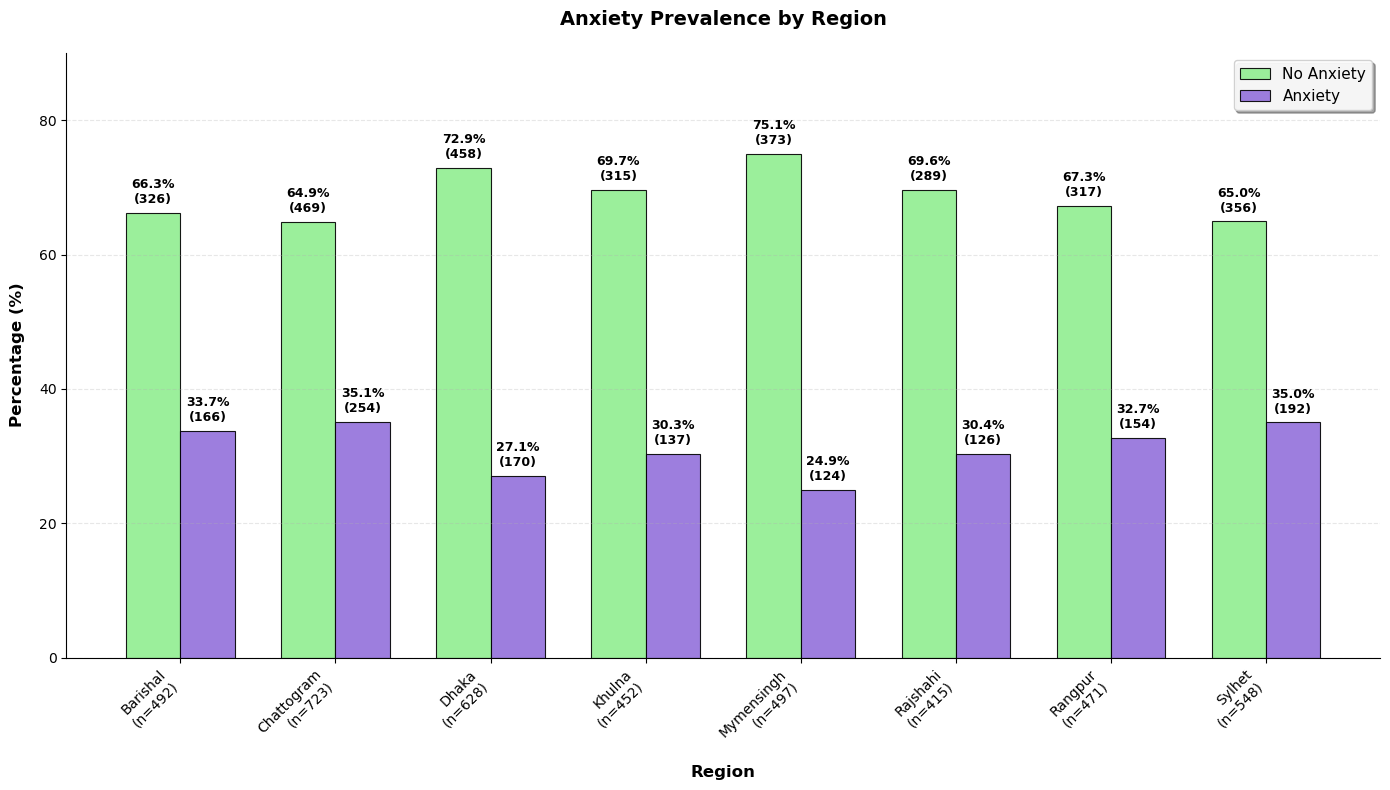


DETAILED BREAKDOWN: ANXIETY BY REGION
    Region  Total N    No Anxiety       Anxiety
  Barishal      492 66.3% (n=326) 33.7% (n=166)
Chattogram      723 64.9% (n=469) 35.1% (n=254)
     Dhaka      628 72.9% (n=458) 27.1% (n=170)
    Khulna      452 69.7% (n=315) 30.3% (n=137)
Mymensingh      497 75.1% (n=373) 24.9% (n=124)
  Rajshahi      415 69.6% (n=289) 30.4% (n=126)
   Rangpur      471 67.3% (n=317) 32.7% (n=154)
    Sylhet      548 65.0% (n=356) 35.0% (n=192)

Statistical Test:
Chi-square: χ²(7) = 25.202, p = 0.0007

Interpretation:
• Statistically significant association (p < 0.05)
• Anxiety prevalence varies significantly across regions
• Highest anxiety prevalence: Chattogram (35.1%)
• Lowest anxiety prevalence: Mymensingh (24.9%)


In [24]:
# =============================================================================
# DESCRIPTIVE ASSOCIATIONS - PLOT: ANXIETY BY REGION
# =============================================================================

print("\n" + "="*80)
print("=== PLOT 10: ANXIETY BY REGION ===")

plt.figure(figsize=(14, 8))

# Calculate the data
contingency_table = pd.crosstab(analysis_df['region'], analysis_df['anxiety_binary'])
cross_tab = pd.crosstab(analysis_df['region'], analysis_df['anxiety_binary'], normalize='index') * 100

# Prepare data for clustered bars - use natural order of regions
categories = sorted(contingency_table.index)

no_anxiety = [cross_tab.loc[cat, 0] for cat in categories]  # No anxiety percentages
anxiety = [cross_tab.loc[cat, 1] for cat in categories]     # Anxiety percentages

# Counts for labels
no_anxiety_counts = [contingency_table.loc[cat, 0] for cat in categories]
anxiety_counts = [contingency_table.loc[cat, 1] for cat in categories]
total_counts = [contingency_table.loc[cat].sum() for cat in categories]

# Set the width and positions for the bars
bar_width = 0.35
x_pos = np.arange(len(categories))

# Create clustered bar chart with anxiety colors
bars_no_anxiety = plt.bar(x_pos - bar_width/2, no_anxiety, bar_width, 
                          color='#90EE90', label='No Anxiety',  # Light Green
                          edgecolor='black', linewidth=0.8, alpha=0.9)
bars_anxiety = plt.bar(x_pos + bar_width/2, anxiety, bar_width, 
                       color='#9370DB', label='Anxiety',        # Medium Purple
                       edgecolor='black', linewidth=0.8, alpha=0.9)

# Add value labels on top of each bar
for i, (bar, value, count) in enumerate(zip(bars_no_anxiety, no_anxiety, no_anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')

for i, (bar, value, count) in enumerate(zip(bars_anxiety, anxiety, anxiety_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, 
             f'{value:.1f}%\n({count})', 
             ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')

# Customize the chart
plt.title('Anxiety Prevalence by Region', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.xlabel('Region', fontsize=12, fontweight='bold', labelpad=10)

# Set x-axis ticks and labels with sample sizes
plt.xticks(x_pos, [f'{cat}\n(n={total})' for cat, total in zip(categories, total_counts)], 
           fontsize=10, rotation=45, ha='right')

# Professional styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Professional legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
           loc='upper right', fontsize=11)

# Adjust y-limit to accommodate labels
plt.ylim(0, max(no_anxiety + anxiety) + 15)

plt.tight_layout()
plt.show()

# Statistical analysis
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Professional summary
print("\n" + "="*60)
print("DETAILED BREAKDOWN: ANXIETY BY REGION")
print("="*60)

summary_data = []
for i, region in enumerate(categories):
    summary_data.append({
        'Region': region,
        'Total N': total_counts[i],
        'No Anxiety': f"{no_anxiety[i]:.1f}% (n={no_anxiety_counts[i]})",
        'Anxiety': f"{anxiety[i]:.1f}% (n={anxiety_counts[i]})"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nStatistical Test:")
print(f"Chi-square: χ²({dof}) = {chi2:.3f}, p = {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"• Statistically significant association (p < 0.05)")
    print(f"• Anxiety prevalence varies significantly across regions")
    # Identify regions with highest and lowest prevalence
    max_region = categories[anxiety.index(max(anxiety))]
    min_region = categories[anxiety.index(min(anxiety))]
    print(f"• Highest anxiety prevalence: {max_region} ({max(anxiety):.1f}%)")
    print(f"• Lowest anxiety prevalence: {min_region} ({min(anxiety):.1f}%)")
else:
    print(f"• No statistically significant association (p ≥ 0.05)")
    print(f"• Anxiety prevalence is similar across regions")

=== CORRELATION MATRIX (FULL) ===
Available continuous variables: ['HW70', 'HW71', 'HW72', 'mother_age', 'phq9_score', 'gad7_score', 'child_age_months', 'bmi']
Sample size for correlation analysis: 4194


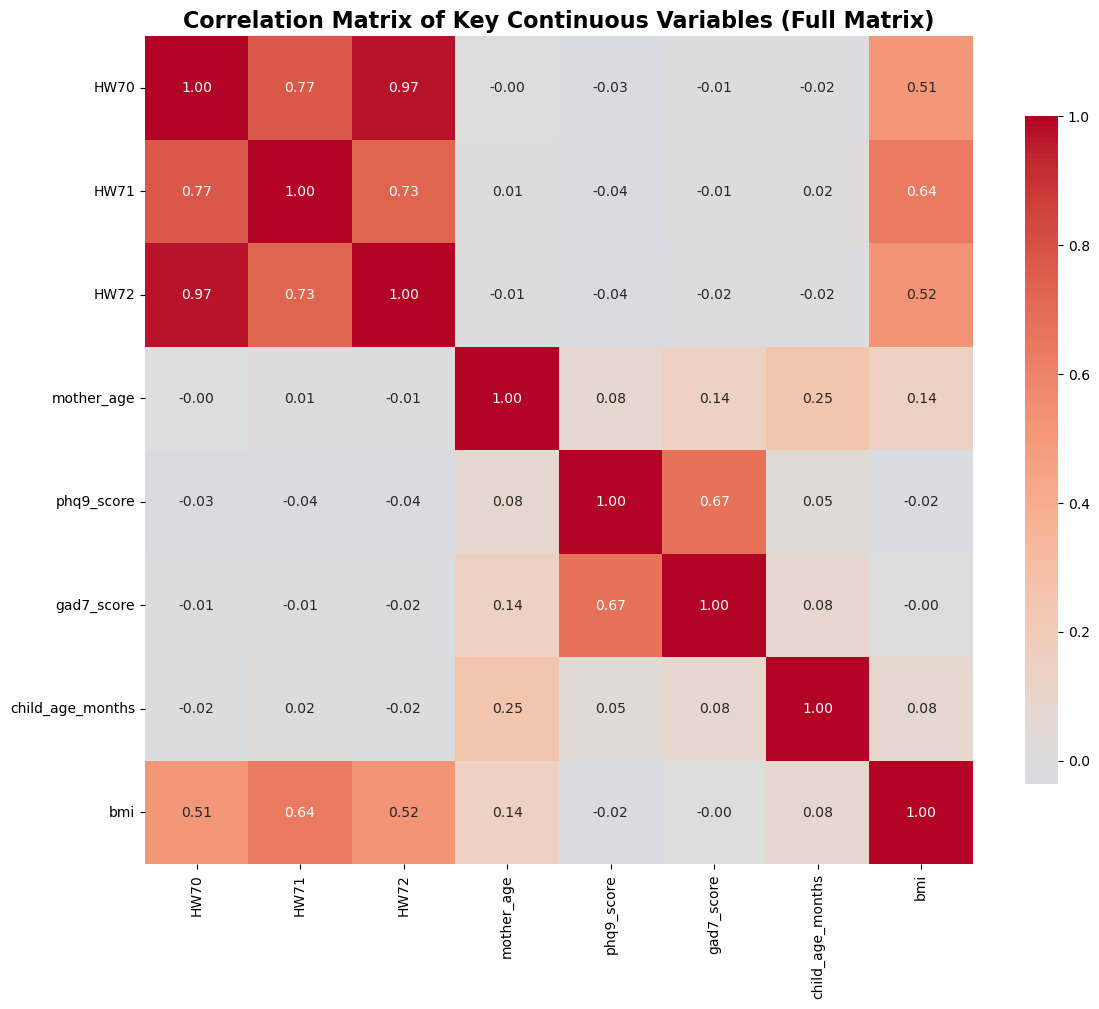


Full correlation matrix:
                   HW70   HW71   HW72  mother_age  phq9_score  gad7_score  \
HW70              1.000  0.774  0.971      -0.002      -0.029      -0.010   
HW71              0.774  1.000  0.731       0.009      -0.036      -0.008   
HW72              0.971  0.731  1.000      -0.007      -0.036      -0.015   
mother_age       -0.002  0.009 -0.007       1.000       0.080       0.136   
phq9_score       -0.029 -0.036 -0.036       0.080       1.000       0.673   
gad7_score       -0.010 -0.008 -0.015       0.136       0.673       1.000   
child_age_months -0.016  0.018 -0.020       0.251       0.047       0.083   
bmi               0.507  0.638  0.523       0.135      -0.025      -0.002   

                  child_age_months    bmi  
HW70                        -0.016  0.507  
HW71                         0.018  0.638  
HW72                        -0.020  0.523  
mother_age                   0.251  0.135  
phq9_score                   0.047 -0.025  
gad7_score      

In [25]:
# =============================================================================
# BIVARIATE ANALYSIS - CORRELATION MATRIX (FULL MATRIX)
# =============================================================================

print("=== CORRELATION MATRIX (FULL) ===")

# Select continuous variables that have been properly converted to numeric
continuous_vars = ['HW70', 'HW71', 'HW72', 'mother_age', 'phq9_score', 'gad7_score', 'child_age_months', 'bmi']
available_continuous = [var for var in continuous_vars if var in analysis_df.columns]

print(f"Available continuous variables: {available_continuous}")

if len(available_continuous) > 1:
    # Drop rows with missing values in these columns for correlation
    corr_data = analysis_df[available_continuous].dropna()
    
    print(f"Sample size for correlation analysis: {len(corr_data)}")
    
    correlation_matrix = corr_data.corr()
    
    plt.figure(figsize=(12, 10))
    # REMOVED THE MASK to show full correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
               square=True, fmt='.2f', cbar_kws={'shrink': 0.8},
               annot_kws={'size': 10})
    plt.title('Correlation Matrix of Key Continuous Variables (Full Matrix)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nFull correlation matrix:")
    print(correlation_matrix.round(3))
    
    # Print strong correlations (absolute value > 0.3)
    print("\nStrong correlations (|r| > 0.3):")
    strong_corrs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:
                strong_corrs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
    
    # Sort by absolute correlation strength
    strong_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
    for var1, var2, corr_val in strong_corrs:
        print(f"{var1} - {var2}: {corr_val:.3f}")

📊 Creating PHQ-9 Distribution Plot...


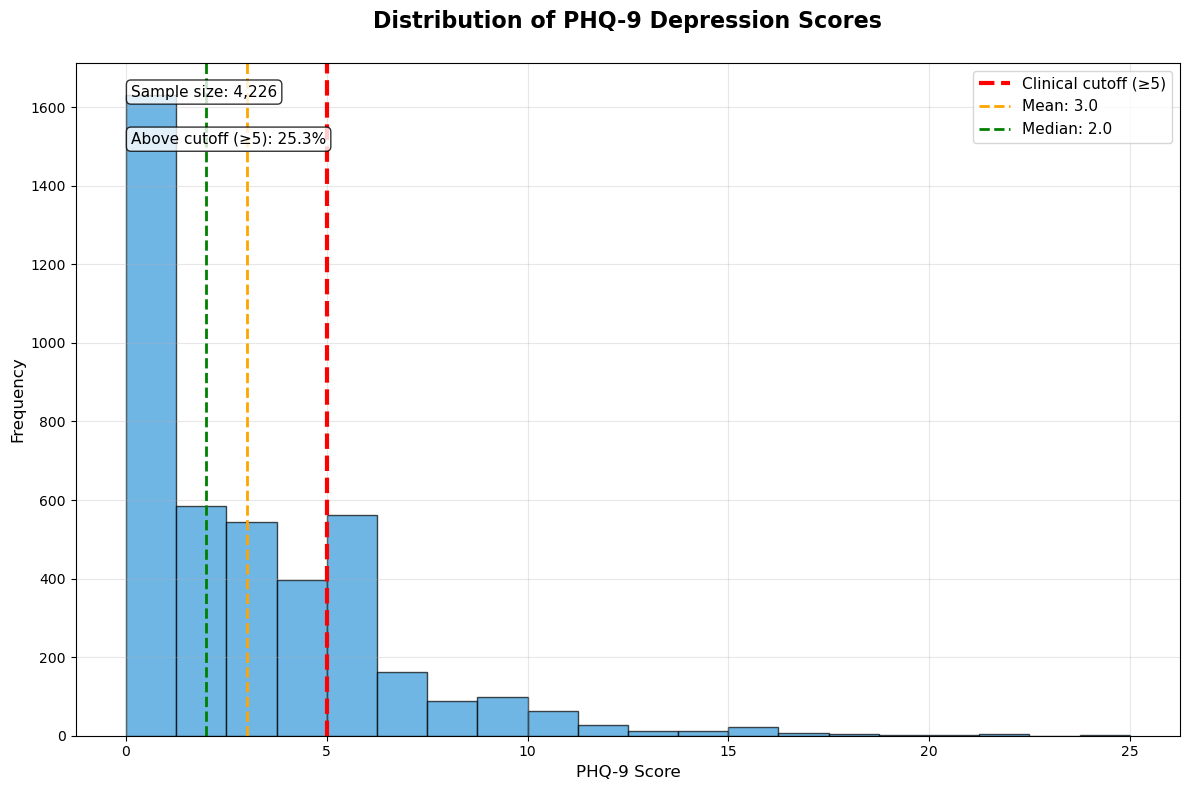

✅ Plot 7 saved as '7_phq9_distribution.png'


In [26]:
# =============================================================================
# PHQ-9 DISTRIBUTION PLOT
# =============================================================================

print("📊 Creating PHQ-9 Distribution Plot...")

plt.figure(figsize=(12, 8))
if 'phq9_score' in analysis_df.columns:
    phq_scores = analysis_df['phq9_score'].dropna()
    
    if len(phq_scores) > 0:
        n, bins, patches = plt.hist(phq_scores, bins=20, alpha=0.7, color='#3498db', edgecolor='black')
        plt.axvline(x=5, color='red', linestyle='--', linewidth=3, label='Clinical cutoff (≥5)')
        plt.title('Distribution of PHQ-9 Depression Scores\n', fontweight='bold', fontsize=16)
        plt.xlabel('PHQ-9 Score', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # Add statistics
        mean_score = phq_scores.mean()
        median_score = phq_scores.median()
        plt.axvline(x=mean_score, color='orange', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_score:.1f}')
        plt.axvline(x=median_score, color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {median_score:.1f}')
        plt.legend(fontsize=11)
        
        # Add sample size and prevalence above cutoff
        above_cutoff = (phq_scores >= 5).mean() * 100
        plt.text(0.05, 0.95, f'Sample size: {len(phq_scores):,}', 
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        plt.text(0.05, 0.88, f'Above cutoff (≥5): {above_cutoff:.1f}%', 
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('7_phq9_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Plot 7 saved as '7_phq9_distribution.png'")
else:
    print("❌ 'phq9_score' column not found")

Creating GAD-7 Distribution Plot...


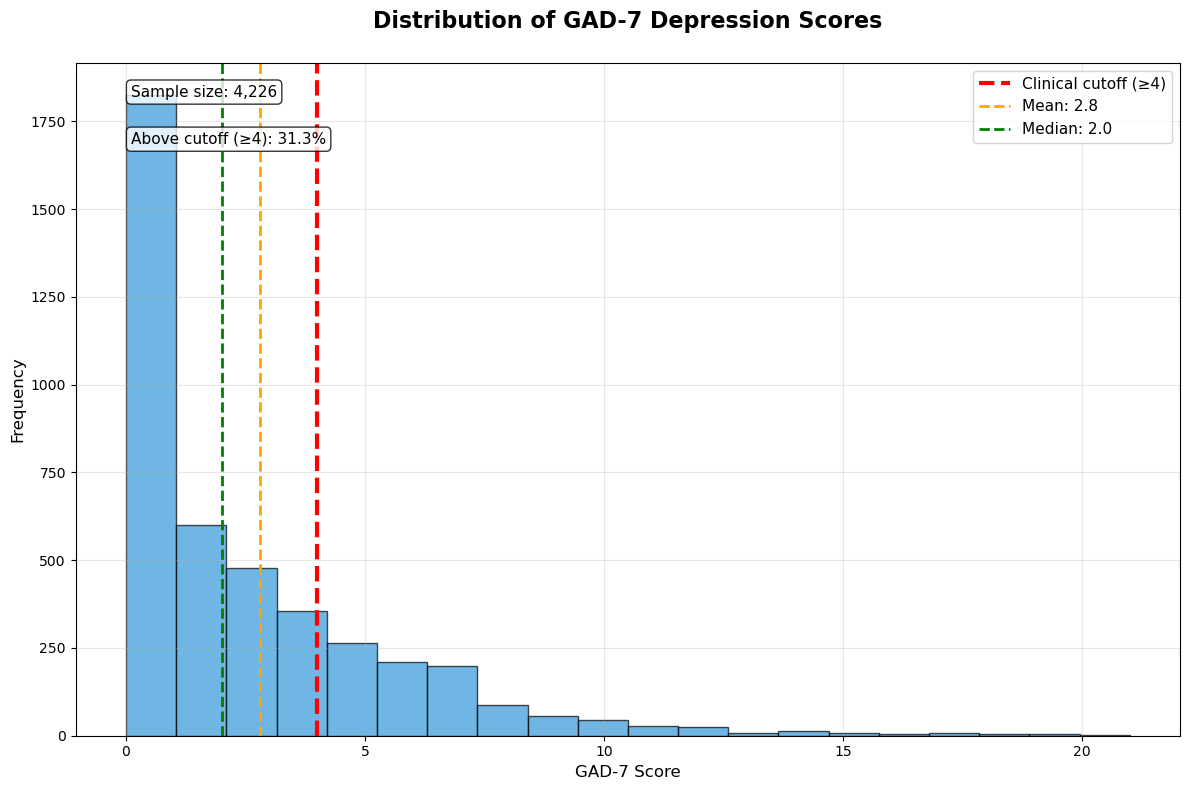

✅ Plot 7 saved as '8_gad7_distribution.png'


In [27]:
# =============================================================================
# GAD-7 DISTRIBUTION PLOT
# =============================================================================

print("Creating GAD-7 Distribution Plot...")

plt.figure(figsize=(12, 8))
if 'gad7_score' in analysis_df.columns:
    gad7_scores = analysis_df['gad7_score'].dropna()
    
    if len(phq_scores) > 0:
        n, bins, patches = plt.hist(gad7_scores, bins=20, alpha=0.7, color='#3498db', edgecolor='black')
        plt.axvline(x=4, color='red', linestyle='--', linewidth=3, label='Clinical cutoff (≥4)')
        plt.title('Distribution of GAD-7 Depression Scores\n', fontweight='bold', fontsize=16)
        plt.xlabel('GAD-7 Score', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # Add statistics
        mean_score = gad7_scores.mean()
        median_score = gad7_scores.median()
        plt.axvline(x=mean_score, color='orange', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_score:.1f}')
        plt.axvline(x=median_score, color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {median_score:.1f}')
        plt.legend(fontsize=11)
        
        # Add sample size and prevalence above cutoff
        above_cutoff = (gad7_scores >= 4).mean() * 100
        plt.text(0.05, 0.95, f'Sample size: {len(phq_scores):,}', 
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        plt.text(0.05, 0.88, f'Above cutoff (≥4): {above_cutoff:.1f}%', 
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('8_gad7_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Plot 7 saved as '8_gad7_distribution.png'")
else:
    print("❌ 'gad7_score' column not found")

In [28]:
# =============================================================================
# MULTIVARIABLE REGRESSION ANALYSIS - STUNTING
# =============================================================================

print("=== MULTIVARIABLE REGRESSION: STUNTING ===")

import statsmodels.formula.api as smf

# Prepare data for regression using analysis_df and correct variable names
# Use the binary outcome variables created in Step 3
model_vars = ['stunting_binary', 'depression_binary', 'anxiety_binary', 
              'mother_age', 'education_level', 'wealth_quintile', 'urban_rural',
              'child_sex', 'child_age_months', 'birth_order','bmi']  # ADDED birth_order HERE

model_data = analysis_df[model_vars].dropna()

print(f"Sample size for regression: {len(model_data)}")

if len(model_data) > 0:
    # Use the cleaned variable names from analysis_df
    formula = "stunting_binary ~ depression_binary + anxiety_binary + birth_order + mother_age + C(education_level) + C(wealth_quintile) + C(urban_rural) + C(child_sex) + child_age_months+bmi"
    
    try:
        model = smf.logit(formula, data=model_data).fit(disp=False, maxiter=1000)
        
        print(model.summary())
        
        # Calculate odds ratios with confidence intervals
        odds_ratios = pd.DataFrame({
            'Variable': model.params.index,
            'Coef': model.params.values,
            'OR': np.exp(model.params.values),
            'OR_2.5%': np.exp(model.conf_int()[0]),
            'OR_97.5%': np.exp(model.conf_int()[1]),
            'p_value': model.pvalues
        })
        
        print("\n" + "="*60)
        print("ODDS RATIOS FOR STUNTING (Adjusted Model)")
        print("="*60)
        print(odds_ratios.round(3))
        
        # Print interpretation for key variables
        print("\n" + "="*60)
        print("KEY INTERPRETATIONS:")
        print("="*60)
        
        depression_or = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['OR'].values[0]
        depression_p = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['p_value'].values[0]
        
        anxiety_or = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['OR'].values[0]
        anxiety_p = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['p_value'].values[0]
        
        # Also add interpretation for birth_order
        birth_order_or = odds_ratios[odds_ratios['Variable'] == 'birth_order']['OR'].values[0]
        birth_order_p = odds_ratios[odds_ratios['Variable'] == 'birth_order']['p_value'].values[0]
        
        print(f"Maternal Depression: OR = {depression_or:.3f}, p = {depression_p:.3f}")
        if depression_p < 0.05:
            if depression_or > 1:
                print(f"  → Children of depressed mothers have {((depression_or-1)*100):.1f}% higher odds of stunting")
            else:
                print(f"  → Children of depressed mothers have {((1-depression_or)*100):.1f}% lower odds of stunting")
        
        print(f"Maternal Anxiety: OR = {anxiety_or:.3f}, p = {anxiety_p:.3f}")
        if anxiety_p < 0.05:
            if anxiety_or > 1:
                print(f"  → Children of anxious mothers have {((anxiety_or-1)*100):.1f}% higher odds of stunting")
            else:
                print(f"  → Children of anxious mothers have {((1-anxiety_or)*100):.1f}% lower odds of stunting")
                
        print(f"Birth Order: OR = {birth_order_or:.3f}, p = {birth_order_p:.3f}")
        if birth_order_p < 0.05:
            if birth_order_or > 1:
                print(f"  → Each increase in birth order is associated with {((birth_order_or-1)*100):.1f}% higher odds of stunting")
            else:
                print(f"  → Each increase in birth order is associated with {((1-birth_order_or)*100):.1f}% lower odds of stunting")
                
    except Exception as e:
        print(f"Error in model fitting: {e}")
        print("Trying with fewer variables...")
        
        # Simplified model as fallback
        simple_formula = "stunting_binary ~ depression_binary + anxiety_binary + birth_order + mother_age + child_age_months"
        simple_model = smf.logit(simple_formula, data=model_data).fit(disp=False, maxiter=1000)
        print(simple_model.summary())
else:
    print("No complete cases for regression analysis")

=== MULTIVARIABLE REGRESSION: STUNTING ===
Sample size for regression: 4226
                           Logit Regression Results                           
Dep. Variable:        stunting_binary   No. Observations:                 4226
Model:                          Logit   Df Residuals:                     4210
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.05590
Time:                        17:29:41   Log-Likelihood:                -2144.7
converged:                       True   LL-Null:                       -2271.7
Covariance Type:            nonrobust   LLR p-value:                 1.873e-45
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.8620      0.298     -2.896      0.004      -1

In [29]:
# =============================================================================
# MULTIVARIABLE REGRESSION ANALYSIS - WASTING
# =============================================================================

print("=== MULTIVARIABLE REGRESSION: WASTING ===")

# Prepare data for regression using analysis_df and correct variable names
model_vars = ['wasting_binary', 'depression_binary', 'anxiety_binary', 
              'mother_age', 'education_level', 'wealth_quintile', 'urban_rural',
              'child_sex', 'child_age_months','birth_order','bmi']

model_data = analysis_df[model_vars].dropna()

print(f"Sample size for regression: {len(model_data)}")

if len(model_data) > 0:
    # Use the cleaned variable names from analysis_df
    formula = "wasting_binary ~ depression_binary + anxiety_binary + birth_order + bmi+mother_age + C(education_level) + C(wealth_quintile) + C(urban_rural) + C(child_sex) + child_age_months"
    
    try:
        model = smf.logit(formula, data=model_data).fit(disp=False, maxiter=1000)
        
        print(model.summary())
        
        # Calculate odds ratios with confidence intervals
        odds_ratios = pd.DataFrame({
            'Variable': model.params.index,
            'Coef': model.params.values,
            'OR': np.exp(model.params.values),
            'OR_2.5%': np.exp(model.conf_int()[0]),
            'OR_97.5%': np.exp(model.conf_int()[1]),
            'p_value': model.pvalues
        })
        
        print("\n" + "="*60)
        print("ODDS RATIOS FOR WASTING (Adjusted Model)")
        print("="*60)
        print(odds_ratios.round(3))
        
        # Print interpretation for key variables
        print("\n" + "="*60)
        print("KEY INTERPRETATIONS:")
        print("="*60)
        
        depression_or = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['OR'].values[0]
        depression_p = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['p_value'].values[0]
        
        anxiety_or = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['OR'].values[0]
        anxiety_p = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['p_value'].values[0]
        
        # Add interpretation for birth_order
        birth_order_or = odds_ratios[odds_ratios['Variable'] == 'birth_order']['OR'].values[0]
        birth_order_p = odds_ratios[odds_ratios['Variable'] == 'birth_order']['p_value'].values[0]
        
        print(f"Maternal Depression: OR = {depression_or:.3f}, p = {depression_p:.3f}")
        if depression_p < 0.05:
            if depression_or > 1:
                print(f"  → Children of depressed mothers have {((depression_or-1)*100):.1f}% higher odds of wasting")
            else:
                print(f"  → Children of depressed mothers have {((1-depression_or)*100):.1f}% lower odds of wasting")
        
        print(f"Maternal Anxiety: OR = {anxiety_or:.3f}, p = {anxiety_p:.3f}")
        if anxiety_p < 0.05:
            if anxiety_or > 1:
                print(f"  → Children of anxious mothers have {((anxiety_or-1)*100):.1f}% higher odds of wasting")
            else:
                print(f"  → Children of anxious mothers have {((1-anxiety_or)*100):.1f}% lower odds of wasting")
                
        print(f"Birth Order: OR = {birth_order_or:.3f}, p = {birth_order_p:.3f}")
        if birth_order_p < 0.05:
            if birth_order_or > 1:
                print(f"  → Each increase in birth order is associated with {((birth_order_or-1)*100):.1f}% higher odds of wasting")
            else:
                print(f"  → Each increase in birth order is associated with {((1-birth_order_or)*100):.1f}% lower odds of wasting")
                
    except Exception as e:
        print(f"Error in model fitting: {e}")
        print("Trying with fewer variables...")
        
        # Simplified model as fallback
        simple_formula = "wasting_binary ~ depression_binary + anxiety_binary + birth_order + mother_age + child_age_months"
        simple_model = smf.logit(simple_formula, data=model_data).fit(disp=False, maxiter=1000)
        print(simple_model.summary())
else:
    print("No complete cases for regression analysis")

=== MULTIVARIABLE REGRESSION: WASTING ===
Sample size for regression: 4226
                           Logit Regression Results                           
Dep. Variable:         wasting_binary   No. Observations:                 4226
Model:                          Logit   Df Residuals:                     4210
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.03385
Time:                        17:29:41   Log-Likelihood:                -1451.1
converged:                       True   LL-Null:                       -1501.9
Covariance Type:            nonrobust   LLR p-value:                 6.301e-15
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.0477      0.394     -2.660      0.008      -1.

In [30]:
# =============================================================================
# MULTIVARIABLE REGRESSION ANALYSIS - UNDERWEIGHT
# =============================================================================

print("=== MULTIVARIABLE REGRESSION: UNDERWEIGHT ===")

# Prepare data for regression using analysis_df and correct variable names
model_vars = ['underweight_binary', 'depression_binary', 'anxiety_binary', 
              'mother_age', 'education_level', 'wealth_quintile', 'urban_rural',
              'child_sex', 'child_age_months','birth_order','bmi']

model_data = analysis_df[model_vars].dropna()

print(f"Sample size for regression: {len(model_data)}")

if len(model_data) > 0:
    # Use the cleaned variable names from analysis_df
    formula = "underweight_binary ~ depression_binary + anxiety_binary + birth_order +bmi+ mother_age + C(education_level) + C(wealth_quintile) + C(urban_rural) + C(child_sex) + child_age_months"
    
    try:
        model = smf.logit(formula, data=model_data).fit(disp=False, maxiter=1000)
        
        print(model.summary())
        
        # Calculate odds ratios with confidence intervals
        odds_ratios = pd.DataFrame({
            'Variable': model.params.index,
            'Coef': model.params.values,
            'OR': np.exp(model.params.values),
            'OR_2.5%': np.exp(model.conf_int()[0]),
            'OR_97.5%': np.exp(model.conf_int()[1]),
            'p_value': model.pvalues
        })
        
        print("\n" + "="*60)
        print("ODDS RATIOS FOR UNDERWEIGHT (Adjusted Model)")
        print("="*60)
        print(odds_ratios.round(3))
        
        # Print interpretation for key variables
        print("\n" + "="*60)
        print("KEY INTERPRETATIONS:")
        print("="*60)
        
        depression_or = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['OR'].values[0]
        depression_p = odds_ratios[odds_ratios['Variable'] == 'depression_binary']['p_value'].values[0]
        
        anxiety_or = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['OR'].values[0]
        anxiety_p = odds_ratios[odds_ratios['Variable'] == 'anxiety_binary']['p_value'].values[0]
        
        # Add interpretation for birth_order
        birth_order_or = odds_ratios[odds_ratios['Variable'] == 'birth_order']['OR'].values[0]
        birth_order_p = odds_ratios[odds_ratios['Variable'] == 'birth_order']['p_value'].values[0]
        
        print(f"Maternal Depression: OR = {depression_or:.3f}, p = {depression_p:.3f}")
        if depression_p < 0.05:
            if depression_or > 1:
                print(f"  → Children of depressed mothers have {((depression_or-1)*100):.1f}% higher odds of underweight")
            else:
                print(f"  → Children of depressed mothers have {((1-depression_or)*100):.1f}% lower odds of underweight")
        
        print(f"Maternal Anxiety: OR = {anxiety_or:.3f}, p = {anxiety_p:.3f}")
        if anxiety_p < 0.05:
            if anxiety_or > 1:
                print(f"  → Children of anxious mothers have {((anxiety_or-1)*100):.1f}% higher odds of underweight")
            else:
                print(f"  → Children of anxious mothers have {((1-anxiety_or)*100):.1f}% lower odds of underweight")
                
        print(f"Birth Order: OR = {birth_order_or:.3f}, p = {birth_order_p:.3f}")
        if birth_order_p < 0.05:
            if birth_order_or > 1:
                print(f"  → Each increase in birth order is associated with {((birth_order_or-1)*100):.1f}% higher odds of underweight")
            else:
                print(f"  → Each increase in birth order is associated with {((1-birth_order_or)*100):.1f}% lower odds of underweight")
                
    except Exception as e:
        print(f"Error in model fitting: {e}")
        print("Trying with fewer variables...")
        
        # Simplified model as fallback
        simple_formula = "underweight_binary ~ depression_binary + anxiety_binary + birth_order + mother_age + child_age_months"
        simple_model = smf.logit(simple_formula, data=model_data).fit(disp=False, maxiter=1000)
        print(simple_model.summary())
else:
    print("No complete cases for regression analysis")

=== MULTIVARIABLE REGRESSION: UNDERWEIGHT ===
Sample size for regression: 4226
                           Logit Regression Results                           
Dep. Variable:     underweight_binary   No. Observations:                 4226
Model:                          Logit   Df Residuals:                     4210
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.06105
Time:                        17:29:41   Log-Likelihood:                -2109.9
converged:                       True   LL-Null:                       -2247.1
Covariance Type:            nonrobust   LLR p-value:                 1.140e-49
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.6968      0.308     -2.259      0.024     

In [31]:
# =============================================================================
# MACHINE LEARNING ANALYSIS - PREPARATION FOR ALL OUTCOMES
# =============================================================================

print("=== MACHINE LEARNING ANALYSIS PREPARATION FOR ALL OUTCOMES ===")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Prepare features using the cleaned variables from analysis_df
features = ['depression_binary', 'anxiety_binary', 'mother_age', 'education_level', 
            'wealth_quintile', 'urban_rural', 'child_sex', 'child_age_months','birth_order','bmi','region']

# Define all target outcomes using the correct binary variable names
targets = {
    'stunting_binary': 'Stunting',
    'wasting_binary': 'Wasting', 
    'underweight_binary': 'Underweight',
    'any_malnutrition': 'Any Malnutrition'
}

print(f"Features: {features}")
print(f"Targets: {list(targets.keys())}")

# Prepare data for ML using analysis_df
X = analysis_df[features].copy()

# Handle categorical variables by encoding them
categorical_cols = ['education_level', 'wealth_quintile', 'urban_rural', 'child_sex','region']
label_encoders = {}

for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Handle missing values - use median for numerical and mode for categorical
numerical_cols = ['mother_age', 'child_age_months','birth_order','bmi']
categorical_cols_encoded = ['education_level', 'wealth_quintile', 'urban_rural', 'child_sex','region']

# Impute numerical features
imputer_num = SimpleImputer(strategy='median')
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Impute categorical features (already encoded)
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols_encoded] = imputer_cat.fit_transform(X[categorical_cols_encoded])

print(f"Final feature matrix shape: {X.shape}")
print(f"Feature names: {X.columns.tolist()}")
print(f"Missing values after imputation: {X.isnull().sum().sum()}")

# Display feature information
print("\nFeature summary:")
for feature in features:
    if feature in X.columns:
        print(f"{feature}: {X[feature].dtype}, unique values: {X[feature].nunique()}")

# Now prepare target variables
print("\nPreparing target variables...")
for target_var, target_name in targets.items():
    if target_var in analysis_df.columns:
        y = analysis_df[target_var].dropna()
        common_index = X.index.intersection(y.index)
        if len(common_index) > 0:
            print(f"{target_name}: {len(common_index)} samples available")
        else:
            print(f"{target_name}: No common samples with features")
    else:
        print(f"{target_name}: Target variable '{target_var}' not found in analysis_df")

=== MACHINE LEARNING ANALYSIS PREPARATION FOR ALL OUTCOMES ===
Features: ['depression_binary', 'anxiety_binary', 'mother_age', 'education_level', 'wealth_quintile', 'urban_rural', 'child_sex', 'child_age_months', 'birth_order', 'bmi', 'region']
Targets: ['stunting_binary', 'wasting_binary', 'underweight_binary', 'any_malnutrition']
Final feature matrix shape: (4226, 11)
Feature names: ['depression_binary', 'anxiety_binary', 'mother_age', 'education_level', 'wealth_quintile', 'urban_rural', 'child_sex', 'child_age_months', 'birth_order', 'bmi', 'region']
Missing values after imputation: 0

Feature summary:
depression_binary: int32, unique values: 2
anxiety_binary: int32, unique values: 2
mother_age: float64, unique values: 34
education_level: int32, unique values: 4
wealth_quintile: int32, unique values: 5
urban_rural: int32, unique values: 2
child_sex: int32, unique values: 2
child_age_months: float64, unique values: 60
birth_order: float64, unique values: 9
bmi: float64, unique values

In [32]:
# =============================================================================
# MACHINE LEARNING - FOR STUNTING
# =============================================================================

print("=== MACHINE LEARNING ANALYSIS: STUNTING ===")

# Import required scaler
from sklearn.preprocessing import StandardScaler

# Use the correct target variable from analysis_df
target = 'stunting_binary'
y = analysis_df[target].copy()

# Align X and y (use only rows that have both features and target)
common_index = X.index.intersection(y.index)
X_aligned = X.loc[common_index]
y_aligned = y.loc[common_index]

print(f"Sample size for ML: {len(X_aligned)}")
print(f"Stunting prevalence: {y_aligned.mean():.3f}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.3, random_state=42, stratify=y_aligned
)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
stunting_results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        X_eval = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        X_eval = X_test
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    stunting_results[name] = {
        'model': model,
        'auc': auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': None
    }
    
    print(f"AUC: {auc:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        stunting_results[name]['feature_importance'] = feature_importance
        print(f"Top 10 features: {feature_importance.head(10)['feature'].tolist()}")

# Store results
ml_results = {'stunting': stunting_results}

# Compare model performance
print("\n" + "="*60)
print("MODEL COMPARISON FOR STUNTING PREDICTION")
print("="*60)
comparison_df = pd.DataFrame({
    model: {metric: values[metric] for metric in ['auc', 'f1', 'precision', 'recall', 'cv_mean']}
    for model, values in stunting_results.items()
}).T
print(comparison_df.round(3))

=== MACHINE LEARNING ANALYSIS: STUNTING ===
Sample size for ML: 4226
Stunting prevalence: 0.229

--- Logistic Regression ---
AUC: 0.653
F1-score: 0.020
Precision: 0.750
Recall: 0.010
Cross-validation AUC: 0.612 ± 0.019

--- Random Forest ---
AUC: 0.640
F1-score: 0.132
Precision: 0.397
Recall: 0.079
Cross-validation AUC: 0.632 ± 0.007
Top 10 features: ['bmi', 'child_age_months', 'mother_age', 'region', 'wealth_quintile', 'birth_order', 'education_level', 'child_sex', 'anxiety_binary', 'urban_rural']

--- Gradient Boosting ---
AUC: 0.645
F1-score: 0.087
Precision: 0.452
Recall: 0.048
Cross-validation AUC: 0.654 ± 0.013
Top 10 features: ['bmi', 'child_age_months', 'wealth_quintile', 'mother_age', 'birth_order', 'education_level', 'region', 'anxiety_binary', 'depression_binary', 'urban_rural']

MODEL COMPARISON FOR STUNTING PREDICTION
                       auc     f1  precision  recall  cv_mean
Logistic Regression  0.653  0.020      0.750   0.010    0.612
Random Forest        0.640  0.132

In [33]:
# =============================================================================
# MACHINE LEARNING - FOR WASTING
# =============================================================================

print("=== MACHINE LEARNING ANALYSIS: WASTING ===")

# Use the correct target variable from analysis_df
target = 'wasting_binary'
y = analysis_df[target].copy()

# Align X and y (use only rows that have both features and target)
common_index = X.index.intersection(y.index)
X_aligned = X.loc[common_index]
y_aligned = y.loc[common_index]

print(f"Sample size for ML: {len(X_aligned)}")
print(f"Wasting prevalence: {y_aligned.mean():.3f}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.3, random_state=42, stratify=y_aligned
)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models (create fresh instances)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
wasting_results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        X_eval = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        X_eval = X_test
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    wasting_results[name] = {
        'model': model,
        'auc': auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': None
    }
    
    print(f"AUC: {auc:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        wasting_results[name]['feature_importance'] = feature_importance
        print(f"Top 10 features: {feature_importance.head(10)['feature'].tolist()}")

# Store results
ml_results['wasting'] = wasting_results

# Compare model performance
print("\n" + "="*60)
print("MODEL COMPARISON FOR WASTING PREDICTION")
print("="*60)
comparison_df = pd.DataFrame({
    model: {metric: values[metric] for metric in ['auc', 'f1', 'precision', 'recall', 'cv_mean']}
    for model, values in wasting_results.items()
}).T
print(comparison_df.round(3))

=== MACHINE LEARNING ANALYSIS: WASTING ===
Sample size for ML: 4226
Wasting prevalence: 0.114

--- Logistic Regression ---
AUC: 0.604
F1-score: 0.000
Precision: 0.000
Recall: 0.000
Cross-validation AUC: 0.611 ± 0.019

--- Random Forest ---
AUC: 0.587
F1-score: 0.000
Precision: 0.000
Recall: 0.000
Cross-validation AUC: 0.575 ± 0.020
Top 10 features: ['bmi', 'child_age_months', 'mother_age', 'region', 'wealth_quintile', 'birth_order', 'education_level', 'child_sex', 'urban_rural', 'anxiety_binary']

--- Gradient Boosting ---
AUC: 0.623
F1-score: 0.013
Precision: 0.200
Recall: 0.007
Cross-validation AUC: 0.580 ± 0.021
Top 10 features: ['bmi', 'mother_age', 'child_age_months', 'birth_order', 'region', 'education_level', 'wealth_quintile', 'depression_binary', 'urban_rural', 'child_sex']

MODEL COMPARISON FOR WASTING PREDICTION
                       auc     f1  precision  recall  cv_mean
Logistic Regression  0.604  0.000        0.0   0.000    0.611
Random Forest        0.587  0.000        

In [34]:
# =============================================================================
# MACHINE LEARNING - FOR UNDERWEIGHT
# =============================================================================

print("=== MACHINE LEARNING ANALYSIS: UNDERWEIGHT ===")

# Use the correct target variable from analysis_df
target = 'underweight_binary'
y = analysis_df[target].copy()

# Align X and y (use only rows that have both features and target)
common_index = X.index.intersection(y.index)
X_aligned = X.loc[common_index]
y_aligned = y.loc[common_index]

print(f"Sample size for ML: {len(X_aligned)}")
print(f"Underweight prevalence: {y_aligned.mean():.3f}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.3, random_state=42, stratify=y_aligned
)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models (create fresh instances)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
underweight_results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        X_eval = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        X_eval = X_test
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    underweight_results[name] = {
        'model': model,
        'auc': auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': None
    }
    
    print(f"AUC: {auc:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        underweight_results[name]['feature_importance'] = feature_importance
        print(f"Top 10 features: {feature_importance.head(10)['feature'].tolist()}")

# Store results
ml_results['underweight'] = underweight_results

# Compare model performance
print("\n" + "="*60)
print("MODEL COMPARISON FOR UNDERWEIGHT PREDICTION")
print("="*60)
comparison_df = pd.DataFrame({
    model: {metric: values[metric] for metric in ['auc', 'f1', 'precision', 'recall', 'cv_mean']}
    for model, values in underweight_results.items()
}).T
print(comparison_df.round(3))

=== MACHINE LEARNING ANALYSIS: UNDERWEIGHT ===
Sample size for ML: 4226
Underweight prevalence: 0.224

--- Logistic Regression ---
AUC: 0.632
F1-score: 0.034
Precision: 0.714
Recall: 0.018
Cross-validation AUC: 0.652 ± 0.016

--- Random Forest ---
AUC: 0.629
F1-score: 0.144
Precision: 0.490
Recall: 0.085
Cross-validation AUC: 0.609 ± 0.021
Top 10 features: ['bmi', 'child_age_months', 'mother_age', 'region', 'wealth_quintile', 'birth_order', 'education_level', 'child_sex', 'anxiety_binary', 'depression_binary']

--- Gradient Boosting ---
AUC: 0.648
F1-score: 0.113
Precision: 0.529
Recall: 0.063
Cross-validation AUC: 0.652 ± 0.022
Top 10 features: ['bmi', 'child_age_months', 'wealth_quintile', 'mother_age', 'education_level', 'birth_order', 'region', 'depression_binary', 'child_sex', 'urban_rural']

MODEL COMPARISON FOR UNDERWEIGHT PREDICTION
                       auc     f1  precision  recall  cv_mean
Logistic Regression  0.632  0.034      0.714   0.018    0.652
Random Forest        0.

=== MACHINE LEARNING PERFORMANCE COMPARISON ACROSS OUTCOMES ===

BEST MODEL FOR EACH OUTCOME:
STUNTING: Logistic Regression (AUC = 0.653)
WASTING: Gradient Boosting (AUC = 0.623)
UNDERWEIGHT: Gradient Boosting (AUC = 0.648)


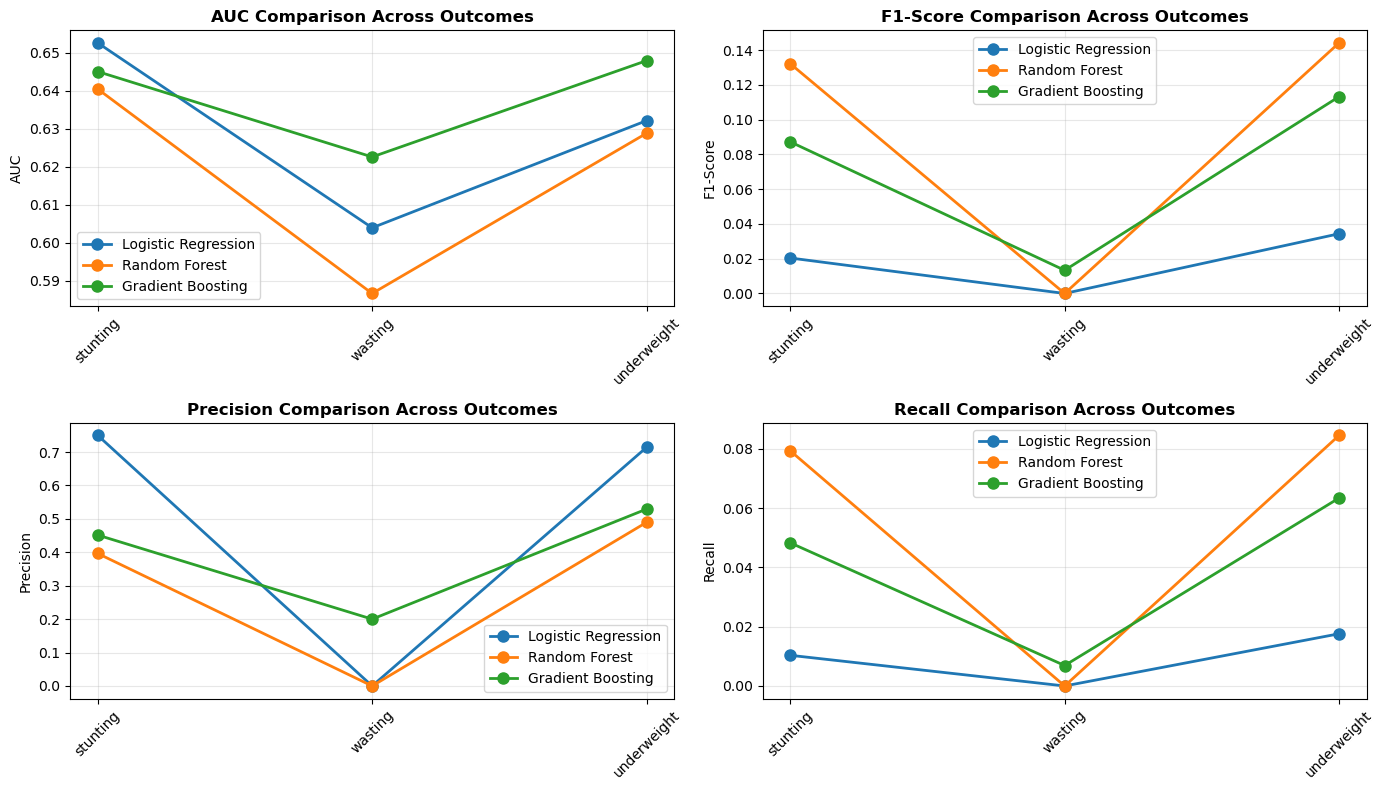


Detailed Performance Comparison:
       Outcome                Model    AUC  F1_Score  Precision  Recall  \
0     stunting  Logistic Regression  0.653     0.020      0.750   0.010   
1     stunting        Random Forest  0.640     0.132      0.397   0.079   
2     stunting    Gradient Boosting  0.645     0.087      0.452   0.048   
3      wasting  Logistic Regression  0.604     0.000      0.000   0.000   
4      wasting        Random Forest  0.587     0.000      0.000   0.000   
5      wasting    Gradient Boosting  0.623     0.013      0.200   0.007   
6  underweight  Logistic Regression  0.632     0.034      0.714   0.018   
7  underweight        Random Forest  0.629     0.144      0.490   0.085   
8  underweight    Gradient Boosting  0.648     0.113      0.529   0.063   

   CV_AUC_Mean  CV_AUC_Std  
0        0.612       0.019  
1        0.632       0.007  
2        0.654       0.013  
3        0.611       0.019  
4        0.575       0.020  
5        0.580       0.021  
6        0.6

In [35]:
# =============================================================================
# MACHINE LEARNING - COMPARISON ACROSS ALL OUTCOMES
# =============================================================================

print("=== MACHINE LEARNING PERFORMANCE COMPARISON ACROSS OUTCOMES ===")

# Create comparison across all outcomes
comparison_data = []

for outcome, results in ml_results.items():
    for model_name, metrics in results.items():
        comparison_data.append({
            'Outcome': outcome,
            'Model': model_name,
            'AUC': metrics['auc'],
            'F1_Score': metrics['f1'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'CV_AUC_Mean': metrics['cv_mean'],
            'CV_AUC_Std': metrics['cv_std']
        })

comparison_df = pd.DataFrame(comparison_data)

# Display best model for each outcome
print("\nBEST MODEL FOR EACH OUTCOME:")
for outcome in ml_results.keys():
    outcome_df = comparison_df[comparison_df['Outcome'] == outcome]
    best_model = outcome_df.loc[outcome_df['AUC'].idxmax()]
    print(f"{outcome.upper()}: {best_model['Model']} (AUC = {best_model['AUC']:.3f})")

# Plot comparison across outcomes
plt.figure(figsize=(14, 8))

# AUC comparison
plt.subplot(2, 2, 1)
for model in models.keys():
    model_data = comparison_df[comparison_df['Model'] == model]
    plt.plot(model_data['Outcome'], model_data['AUC'], 'o-', label=model, linewidth=2, markersize=8)
plt.ylabel('AUC')
plt.title('AUC Comparison Across Outcomes', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 2)
for model in models.keys():
    model_data = comparison_df[comparison_df['Model'] == model]
    plt.plot(model_data['Outcome'], model_data['F1_Score'], 'o-', label=model, linewidth=2, markersize=8)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison Across Outcomes', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 3)
for model in models.keys():
    model_data = comparison_df[comparison_df['Model'] == model]
    plt.plot(model_data['Outcome'], model_data['Precision'], 'o-', label=model, linewidth=2, markersize=8)
plt.ylabel('Precision')
plt.title('Precision Comparison Across Outcomes', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 4)
for model in models.keys():
    model_data = comparison_df[comparison_df['Model'] == model]
    plt.plot(model_data['Outcome'], model_data['Recall'], 'o-', label=model, linewidth=2, markersize=8)
plt.ylabel('Recall')
plt.title('Recall Comparison Across Outcomes', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nDetailed Performance Comparison:")
print(comparison_df.round(3))

=== FEATURE IMPORTANCE FOR BEST MODELS ACROSS OUTCOMES ===


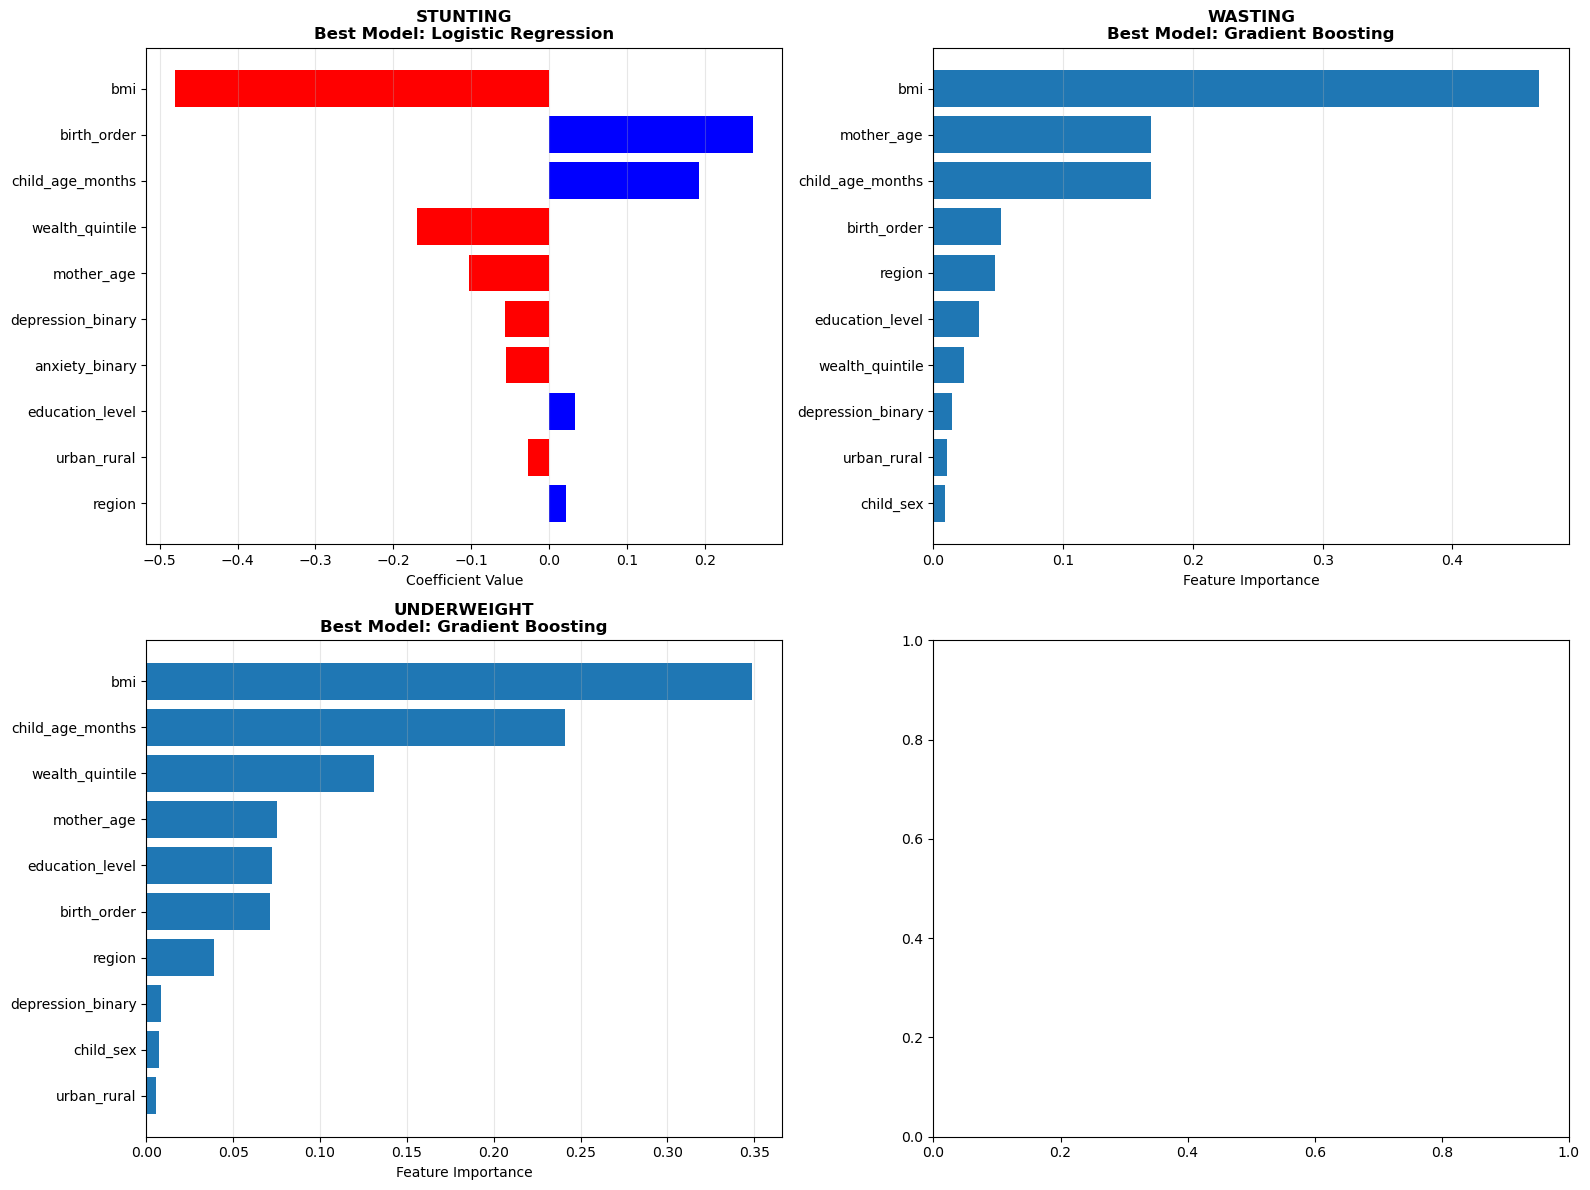


TOP FEATURES FOR EACH OUTCOME:

--- STUNTING (Best: Logistic Regression) ---
              feature  coefficient  importance
9                 bmi       -0.480       0.480
8         birth_order        0.262       0.262
7    child_age_months        0.192       0.192
4     wealth_quintile       -0.170       0.170
2          mother_age       -0.103       0.103
0   depression_binary       -0.056       0.056
1      anxiety_binary       -0.056       0.056
3     education_level        0.032       0.032
5         urban_rural       -0.027       0.027
10             region        0.022       0.022

--- WASTING (Best: Gradient Boosting) ---
              feature  importance
9                 bmi       0.466
2          mother_age       0.168
7    child_age_months       0.168
8         birth_order       0.052
10             region       0.048
3     education_level       0.035
4     wealth_quintile       0.024
0   depression_binary       0.014
5         urban_rural       0.011
6           child_sex 

In [36]:
# =============================================================================
# FEATURE IMPORTANCE FOR BEST MODELS ACROSS OUTCOMES
# =============================================================================

print("=== FEATURE IMPORTANCE FOR BEST MODELS ACROSS OUTCOMES ===")

# Find best model for each outcome and plot feature importance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, outcome in enumerate(ml_results.keys()):
    # Get best model for this outcome
    outcome_results = ml_results[outcome]
    best_model_name = max(outcome_results, key=lambda x: outcome_results[x]['auc'])
    best_model = outcome_results[best_model_name]['model']
    
    # Feature importance based on model type
    if best_model_name == 'Logistic Regression':
        # Logistic regression coefficients
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_[0],
            'importance': np.abs(best_model.coef_[0])
        }).sort_values('importance', ascending=True).tail(10)  # Top 10
        
        # Plot
        colors = ['red' if x < 0 else 'blue' for x in feature_importance['coefficient']]
        axes[idx].barh(feature_importance['feature'], feature_importance['coefficient'], color=colors)
        axes[idx].set_xlabel('Coefficient Value')
        
    else:
        # Tree-based feature importance
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=True).tail(10)  # Top 10
        
        # Plot
        axes[idx].barh(feature_importance['feature'], feature_importance['importance'])
        axes[idx].set_xlabel('Feature Importance')
    
    axes[idx].set_title(f'{outcome.upper()}\nBest Model: {best_model_name}', fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance tables
print("\nTOP FEATURES FOR EACH OUTCOME:")
for outcome in ml_results.keys():
    outcome_results = ml_results[outcome]
    best_model_name = max(outcome_results, key=lambda x: outcome_results[x]['auc'])
    best_model = outcome_results[best_model_name]['model']
    
    print(f"\n--- {outcome.upper()} (Best: {best_model_name}) ---")
    
    if best_model_name == 'Logistic Regression':
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_[0],
            'importance': np.abs(best_model.coef_[0])
        }).sort_values('importance', ascending=False).head(10)
        print(feature_importance.round(3))
    else:
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        print(feature_importance.round(3))

In [37]:
# =============================================================================
# IMPROVED MACHINE LEARNING WITH CLASS IMBALANCE HANDLING
# =============================================================================

print("=== IMPROVED ML WITH CLASS IMBALANCE HANDLING ===")

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

def improved_ml_analysis(target_name, target_var):
    """Run improved ML analysis with class imbalance handling"""
    print(f"\n{'='*60}")
    print(f"IMPROVED ANALYSIS: {target_name.upper()}")
    print(f"{'='*60}")
    
    # Get target variable
    y = analysis_df[target_var].copy()
    
    # Align X and y
    common_index = X.index.intersection(y.index)
    X_aligned = X.loc[common_index]
    y_aligned = y.loc[common_index]
    
    print(f"Sample size: {len(X_aligned)}")
    print(f"Class distribution: {y_aligned.value_counts().to_dict()}")
    print(f"Positive class prevalence: {y_aligned.mean():.3f}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_aligned, y_aligned, test_size=0.3, random_state=42, stratify=y_aligned
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Compute class weights for imbalance handling
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
    
    # Define improved models
    models = {
        'Logistic Regression (Balanced)': LogisticRegression(
            random_state=42, max_iter=1000, class_weight='balanced'
        ),
        'Logistic Regression (Custom Weights)': LogisticRegression(
            random_state=42, max_iter=1000, class_weight=class_weight_dict
        ),
        'Random Forest (Balanced)': RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight='balanced'
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100, random_state=42
        )
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n--- {name} ---")
        
        # Fit model
        if 'Logistic' in name:
            model.fit(X_train_scaled, y_train)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            X_eval = X_test_scaled
        else:
            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            X_eval = X_test
        
        # Find optimal threshold using precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        
        # Predict with optimal threshold
        y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
        
        # Calculate metrics with optimal threshold
        auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred_optimal)
        precision_val = precision_score(y_test, y_pred_optimal)
        recall_val = recall_score(y_test, y_pred_optimal)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        
        results[name] = {
            'model': model,
            'auc': auc,
            'f1': f1,
            'precision': precision_val,
            'recall': recall_val,
            'optimal_threshold': optimal_threshold,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        print(f"Optimal threshold: {optimal_threshold:.3f}")
        print(f"AUC: {auc:.3f}")
        print(f"F1-score: {f1:.3f}")
        print(f"Precision: {precision_val:.3f}")
        print(f"Recall: {recall_val:.3f}")
        print(f"Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        
        # Detailed classification report
        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred_optimal, target_names=['Negative', 'Positive']))
        
        # Feature importance for tree-based models
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            results[name]['feature_importance'] = feature_importance
            print(f"Top 10 features: {feature_importance.head(10)['feature'].tolist()}")
    
    return results

# Run improved analysis for all targets
improved_results = {}

targets_to_improve = {
    'stunting': 'stunting_binary',
    'wasting': 'wasting_binary', 
    'underweight': 'underweight_binary'
}

for target_name, target_var in targets_to_improve.items():
    improved_results[target_name] = improved_ml_analysis(target_name, target_var)

# Compare all improved models
print("\n" + "="*80)
print("SUMMARY OF IMPROVED MODELS ACROSS ALL TARGETS")
print("="*80)

for target_name in targets_to_improve.keys():
    print(f"\n{target_name.upper()}:")
    comparison_df = pd.DataFrame({
        model: {metric: values[metric] for metric in ['auc', 'f1', 'precision', 'recall', 'optimal_threshold']}
        for model, values in improved_results[target_name].items()
    }).T
    print(comparison_df.round(3))

=== IMPROVED ML WITH CLASS IMBALANCE HANDLING ===

IMPROVED ANALYSIS: STUNTING
Sample size: 4226
Class distribution: {0: 3260, 1: 966}
Positive class prevalence: 0.229

--- Logistic Regression (Balanced) ---
Optimal threshold: 0.480
AUC: 0.652
F1-score: 0.430
Precision: 0.312
Recall: 0.693
Cross-validation AUC: 0.612 ± 0.018

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.55      0.67       978
    Positive       0.31      0.69      0.43       290

    accuracy                           0.58      1268
   macro avg       0.58      0.62      0.55      1268
weighted avg       0.73      0.58      0.61      1268


--- Logistic Regression (Custom Weights) ---
Optimal threshold: 0.480
AUC: 0.652
F1-score: 0.430
Precision: 0.312
Recall: 0.693
Cross-validation AUC: 0.612 ± 0.018

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.55      0.67       978
    Positive       0.31 

=== CHILD MORBIDITY DESCRIPTIVE ANALYSIS ===
Available child morbidity variables:
  Diarrhea: 5.04% (213/4226)
  Fever: 31.33% (1324/4226)
  Cough: 27.90% (1179/4226)
  ARI (cough + breathing problems): 4.57% (193/4226)


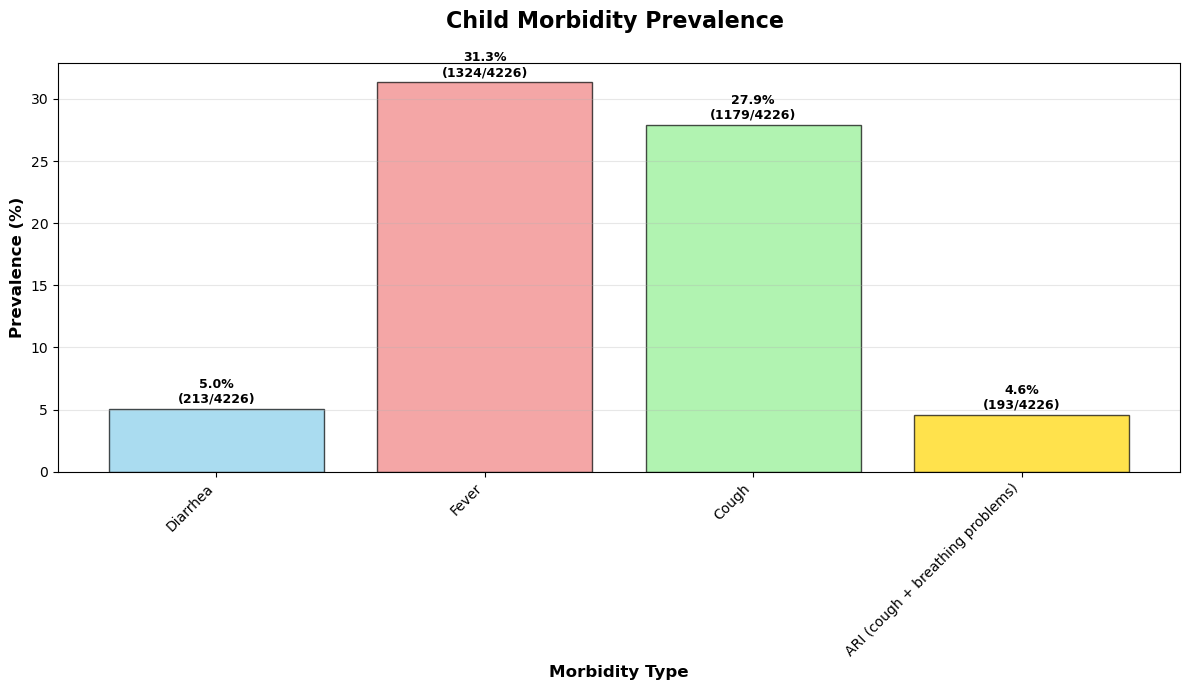


MORBIDITY BY MATERNAL MENTAL HEALTH STATUS

Diarrhea:
  No depression: 4.6%
  With depression: 6.4%
  No anxiety: 4.3%
  With anxiety: 6.6%
  Depression association: χ²=5.550, p=0.0185

Fever:
  No depression: 29.7%
  With depression: 36.2%
  No anxiety: 29.8%
  With anxiety: 34.8%
  Depression association: χ²=15.290, p=0.0001

Cough:
  No depression: 26.4%
  With depression: 32.4%
  No anxiety: 25.9%
  With anxiety: 32.3%
  Depression association: χ²=14.324, p=0.0002

ARI (cough + breathing problems):
  No depression: 3.7%
  With depression: 7.2%
  No anxiety: 3.3%
  With anxiety: 7.3%
  Depression association: χ²=21.926, p=0.0000


In [38]:
# =============================================================================
# CHILD MORBIDITY ANALYSIS - DESCRIPTIVE
# =============================================================================

print("=== CHILD MORBIDITY DESCRIPTIVE ANALYSIS ===")

# Use the binary morbidity variables created in Step 3
morbidity_vars = {
    'Diarrhea': 'diarrhea_binary',
    'Fever': 'fever_binary', 
    'Cough': 'cough_binary',
    'ARI (cough + breathing problems)': 'ari_binary'
}

available_morbidity = {desc: var for desc, var in morbidity_vars.items() if var in analysis_df.columns}

if available_morbidity:
    print("Available child morbidity variables:")
    
    # Calculate prevalence using the binary variables
    morbidity_prevalence = {}
    morbidity_counts = {}
    
    for desc, var in available_morbidity.items():
        prevalence = analysis_df[var].mean() * 100
        count = analysis_df[var].sum()
        total = analysis_df[var].count()
        morbidity_prevalence[desc] = prevalence
        morbidity_counts[desc] = (count, total)
        print(f"  {desc}: {prevalence:.2f}% ({count}/{total})")
    
    # Plot morbidity prevalence
    plt.figure(figsize=(12, 7))
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    bars = plt.bar(morbidity_prevalence.keys(), morbidity_prevalence.values(), 
                   color=colors[:len(morbidity_prevalence)], alpha=0.7, edgecolor='black')
    
    plt.xlabel('Morbidity Type', fontsize=12, fontweight='bold')
    plt.ylabel('Prevalence (%)', fontsize=12, fontweight='bold')
    plt.title('Child Morbidity Prevalence \n', fontsize=16, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    
    # Add prevalence values on bars
    for i, (morbidity, prevalence) in enumerate(morbidity_prevalence.items()):
        count, total = morbidity_counts[morbidity]
        plt.text(i, prevalence + 0.5, f"{prevalence:.1f}%\n({count}/{total})", 
                ha='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: Morbidity by maternal mental health
    print("\n" + "="*50)
    print("MORBIDITY BY MATERNAL MENTAL HEALTH STATUS")
    print("="*50)
    
    for morbidity_desc, morbidity_var in available_morbidity.items():
        print(f"\n{morbidity_desc}:")
        # By depression status
        no_depression = analysis_df[analysis_df['depression_binary'] == 0][morbidity_var].mean() * 100
        with_depression = analysis_df[analysis_df['depression_binary'] == 1][morbidity_var].mean() * 100
        
        # By anxiety status
        no_anxiety = analysis_df[analysis_df['anxiety_binary'] == 0][morbidity_var].mean() * 100
        with_anxiety = analysis_df[analysis_df['anxiety_binary'] == 1][morbidity_var].mean() * 100
        
        print(f"  No depression: {no_depression:.1f}%")
        print(f"  With depression: {with_depression:.1f}%")
        print(f"  No anxiety: {no_anxiety:.1f}%")
        print(f"  With anxiety: {with_anxiety:.1f}%")
        
        # Statistical test for depression association
        from scipy.stats import chi2_contingency
        contingency = pd.crosstab(analysis_df['depression_binary'], analysis_df[morbidity_var])
        chi2, p_val, dof, expected = chi2_contingency(contingency)
        print(f"  Depression association: χ²={chi2:.3f}, p={p_val:.4f}")
    
else:
    print("No child morbidity variables found in the dataset")
    
    # Debug: Check what morbidity variables exist
    print("\nDebug - Available binary variables:")
    binary_vars = [col for col in analysis_df.columns if 'binary' in col]
    for var in binary_vars:
        print(f"  {var}")

=== ASSOCIATION BETWEEN MATERNAL MENTAL HEALTH AND CHILD MORBIDITY ===

--- Diarrhea ---
  Association with depression:
    χ² = 5.550, p = 0.0185
    Prevalence ratio = 1.413
    Depression: 6.4% vs No depression: 4.6%
  Association with anxiety:
    χ² = 9.029, p = 0.0027
    Prevalence ratio = 1.515
    Anxiety: 6.6% vs No anxiety: 4.3%

--- Fever ---
  Association with depression:
    χ² = 15.290, p = 0.0001
    Prevalence ratio = 1.218
    Depression: 36.2% vs No depression: 29.7%
  Association with anxiety:
    χ² = 10.359, p = 0.0013
    Prevalence ratio = 1.168
    Anxiety: 34.8% vs No anxiety: 29.8%

--- Cough ---
  Association with depression:
    χ² = 14.324, p = 0.0002
    Prevalence ratio = 1.230
    Depression: 32.4% vs No depression: 26.4%
  Association with anxiety:
    χ² = 18.023, p = 0.0000
    Prevalence ratio = 1.246
    Anxiety: 32.3% vs No anxiety: 25.9%

--- ARI (cough + breathing problems) ---
  Association with depression:
    χ² = 21.926, p = 0.0000
    Preva

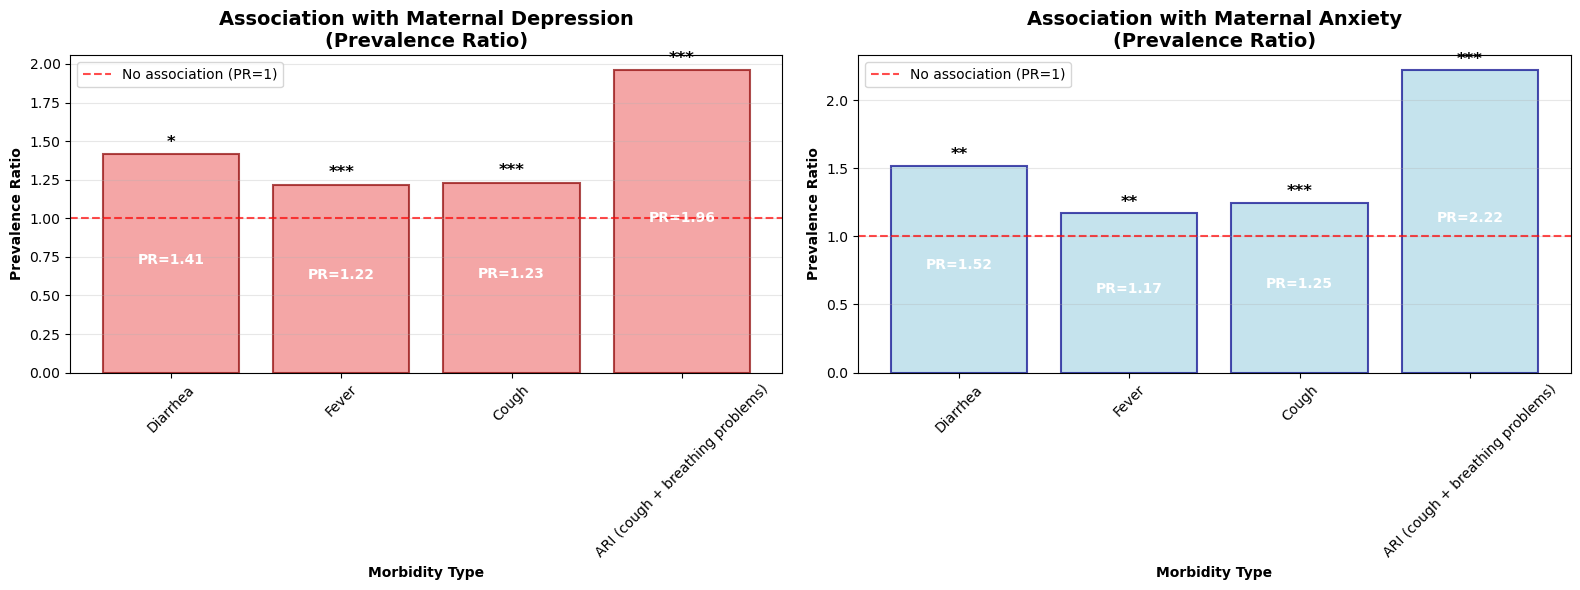


INTERPRETATION GUIDE:
Prevalence Ratio (PR) Interpretation:
  PR > 1: Higher morbidity in children of mothers with mental health condition
  PR = 1: No association
  PR < 1: Lower morbidity in children of mothers with mental health condition

Statistical Significance:
  *** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant


In [39]:
# =============================================================================
# CHILD MORBIDITY ASSOCIATIONS WITH MATERNAL MENTAL HEALTH
# =============================================================================

print("=== ASSOCIATION BETWEEN MATERNAL MENTAL HEALTH AND CHILD MORBIDITY ===")

# Use the binary morbidity variables created in Step 3
morbidity_vars = {
    'Diarrhea': 'diarrhea_binary',
    'Fever': 'fever_binary', 
    'Cough': 'cough_binary',
    'ARI (cough + breathing problems)': 'ari_binary'
}

available_morbidity = {desc: var for desc, var in morbidity_vars.items() if var in analysis_df.columns}

if available_morbidity:
    morbidity_results = []
    
    for desc, var in available_morbidity.items():
        print(f"\n--- {desc} ---")
        
        # Association with depression - USE analysis_df
        cross_tab_dep = pd.crosstab(analysis_df['depression_binary'], analysis_df[var])
        if cross_tab_dep.shape == (2, 2):
            chi2_dep, pval_dep, dof_dep, expected_dep = chi2_contingency(cross_tab_dep)
            prev_dep = cross_tab_dep.iloc[1, 1] / cross_tab_dep.iloc[1, :].sum()
            prev_no_dep = cross_tab_dep.iloc[0, 1] / cross_tab_dep.iloc[0, :].sum()
            pr_dep = prev_dep / prev_no_dep if prev_no_dep > 0 else float('inf')
            
            print(f"  Association with depression:")
            print(f"    χ² = {chi2_dep:.3f}, p = {pval_dep:.4f}")
            print(f"    Prevalence ratio = {pr_dep:.3f}")
            print(f"    Depression: {prev_dep*100:.1f}% vs No depression: {prev_no_dep*100:.1f}%")
        
        # Association with anxiety - USE analysis_df
        cross_tab_anx = pd.crosstab(analysis_df['anxiety_binary'], analysis_df[var])
        if cross_tab_anx.shape == (2, 2):
            chi2_anx, pval_anx, dof_anx, expected_anx = chi2_contingency(cross_tab_anx)
            prev_anx = cross_tab_anx.iloc[1, 1] / cross_tab_anx.iloc[1, :].sum()
            prev_no_anx = cross_tab_anx.iloc[0, 1] / cross_tab_anx.iloc[0, :].sum()
            pr_anx = prev_anx / prev_no_anx if prev_no_anx > 0 else float('inf')
            
            print(f"  Association with anxiety:")
            print(f"    χ² = {chi2_anx:.3f}, p = {pval_anx:.4f}")
            print(f"    Prevalence ratio = {pr_anx:.3f}")
            print(f"    Anxiety: {prev_anx*100:.1f}% vs No anxiety: {prev_no_anx*100:.1f}%")
        
        # Calculate overall prevalence for this morbidity
        overall_prevalence = analysis_df[var].mean() * 100
        
        morbidity_results.append({
            'Morbidity': desc,
            'Prevalence': overall_prevalence,
            'Depression_PR': pr_dep,
            'Depression_p': pval_dep,
            'Anxiety_PR': pr_anx,
            'Anxiety_p': pval_anx
        })
    
    # Create summary table
    morbidity_df = pd.DataFrame(morbidity_results)
    print("\n" + "="*80)
    print("SUMMARY OF MORBIDITY ASSOCIATIONS WITH MATERNAL MENTAL HEALTH")
    print("="*80)
    print(morbidity_df.round(3))
    
    # Plot associations
    if not morbidity_df.empty:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Depression associations
        bars1 = ax1.bar(morbidity_df['Morbidity'], morbidity_df['Depression_PR'], 
                color='lightcoral', alpha=0.7, edgecolor='darkred', linewidth=1.5)
        ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No association (PR=1)')
        ax1.set_xlabel('Morbidity Type', fontweight='bold')
        ax1.set_ylabel('Prevalence Ratio', fontweight='bold')
        ax1.set_title('Association with Maternal Depression\n(Prevalence Ratio)', fontweight='bold', fontsize=14)
        ax1.tick_params(axis='x', rotation=45)
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        # Add p-value stars and prevalence values
        for i, (bar, row) in enumerate(zip(bars1, morbidity_df.iterrows())):
            _, row_data = row
            height = bar.get_height()
            if row_data['Depression_p'] < 0.001:
                star = '***'
            elif row_data['Depression_p'] < 0.01:
                star = '**'
            elif row_data['Depression_p'] < 0.05:
                star = '*'
            else:
                star = 'ns'
            ax1.text(i, height + 0.05, star, ha='center', fontweight='bold', fontsize=12)
            ax1.text(i, height/2, f"PR={row_data['Depression_PR']:.2f}", 
                    ha='center', fontweight='bold', color='white')
        
        # Anxiety associations
        bars2 = ax2.bar(morbidity_df['Morbidity'], morbidity_df['Anxiety_PR'], 
                color='lightblue', alpha=0.7, edgecolor='darkblue', linewidth=1.5)
        ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No association (PR=1)')
        ax2.set_xlabel('Morbidity Type', fontweight='bold')
        ax2.set_ylabel('Prevalence Ratio', fontweight='bold')
        ax2.set_title('Association with Maternal Anxiety\n(Prevalence Ratio)', fontweight='bold', fontsize=14)
        ax2.tick_params(axis='x', rotation=45)
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        
        # Add p-value stars and prevalence values
        for i, (bar, row) in enumerate(zip(bars2, morbidity_df.iterrows())):
            _, row_data = row
            height = bar.get_height()
            if row_data['Anxiety_p'] < 0.001:
                star = '***'
            elif row_data['Anxiety_p'] < 0.01:
                star = '**'
            elif row_data['Anxiety_p'] < 0.05:
                star = '*'
            else:
                star = 'ns'
            ax2.text(i, height + 0.05, star, ha='center', fontweight='bold', fontsize=12)
            ax2.text(i, height/2, f"PR={row_data['Anxiety_PR']:.2f}", 
                    ha='center', fontweight='bold', color='white')
        
        plt.tight_layout()
        plt.show()
        
        # Print interpretation
        print("\n" + "="*80)
        print("INTERPRETATION GUIDE:")
        print("="*80)
        print("Prevalence Ratio (PR) Interpretation:")
        print("  PR > 1: Higher morbidity in children of mothers with mental health condition")
        print("  PR = 1: No association")
        print("  PR < 1: Lower morbidity in children of mothers with mental health condition")
        print("\nStatistical Significance:")
        print("  *** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant")

else:
    print("No child morbidity variables found in the dataset")

In [40]:
# =============================================================================
# MULTIVARIABLE REGRESSION FOR MORBIDITY OUTCOMES
# =============================================================================

print("=== MULTIVARIABLE REGRESSION FOR MORBIDITY OUTCOMES ===")

# Use the binary morbidity variables created in Step 3
morbidity_vars = {
    'Diarrhea': 'diarrhea_binary',
    'Fever': 'fever_binary', 
    'Cough': 'cough_binary',
    'ARI (cough + breathing problems)': 'ari_binary'
}

available_morbidity = {desc: var for desc, var in morbidity_vars.items() if var in analysis_df.columns}

if available_morbidity:
    for desc, var in available_morbidity.items():
        print(f"\n--- {desc.upper()} ---")
        
        # Prepare data for regression using analysis_df and cleaned variable names
        model_vars = [var, 'depression_binary', 'anxiety_binary', 
                     'mother_age', 'education_level', 'wealth_quintile', 'urban_rural',
                     'child_sex', 'child_age_months','birth_order']
        
        model_data = analysis_df[model_vars].dropna()
        
        print(f"Sample size: {len(model_data)}")
        print(f"Outcome prevalence: {model_data[var].mean()*100:.1f}%")
        
        if len(model_data) > 0:
            formula = f"{var} ~ depression_binary + anxiety_binary+birth_order + mother_age + C(education_level) + C(wealth_quintile) + C(urban_rural) + C(child_sex) + child_age_months"
            
            try:
                model = smf.logit(formula, data=model_data).fit(disp=False, maxiter=1000)
                
                # Calculate odds ratios
                odds_ratios = pd.DataFrame({
                    'Variable': model.params.index,
                    'Coef': model.params.values,
                    'OR': np.exp(model.params.values),
                    'OR_2.5%': np.exp(model.conf_int()[0]),
                    'OR_97.5%': np.exp(model.conf_int()[1]),
                    'p_value': model.pvalues
                })
                
                print(f"\nAdjusted Odds Ratios for {desc}:")
                print("="*50)
                
                # Show key variables of interest
                key_vars = ['depression_binary', 'anxiety_binary']
                key_results = odds_ratios[odds_ratios['Variable'].isin(key_vars)]
                
                if not key_results.empty:
                    for _, row in key_results.iterrows():
                        significance = ""
                        if row['p_value'] < 0.001:
                            significance = "***"
                        elif row['p_value'] < 0.01:
                            significance = "**"
                        elif row['p_value'] < 0.05:
                            significance = "*"
                        
                        print(f"{row['Variable']}: OR = {row['OR']:.3f} ({row['OR_2.5%']:.3f}-{row['OR_97.5%']:.3f}) {significance}")
                        
                        # Interpretation
                        if row['Variable'] == 'depression_binary':
                            if row['OR'] > 1:
                                print(f"  → Children of depressed mothers have {((row['OR']-1)*100):.1f}% higher odds of {desc.lower()}")
                            elif row['OR'] < 1:
                                print(f"  → Children of depressed mothers have {((1-row['OR'])*100):.1f}% lower odds of {desc.lower()}")
                        
                        elif row['Variable'] == 'anxiety_binary':
                            if row['OR'] > 1:
                                print(f"  → Children of anxious mothers have {((row['OR']-1)*100):.1f}% higher odds of {desc.lower()}")
                            elif row['OR'] < 1:
                                print(f"  → Children of anxious mothers have {((1-row['OR'])*100):.1f}% lower odds of {desc.lower()}")
                
                # Show model fit statistics
                print(f"\nModel Fit:")
                print(f"  AIC: {model.aic:.2f}")
                print(f"  Log-Likelihood: {model.llf:.2f}")
                print(f"  Pseudo R²: {model.prsquared:.3f}")
                
            except Exception as e:
                print(f"Regression error for {desc}: {e}")
                print("Trying simplified model...")
                
                # Try simplified model
                try:
                    simple_formula = f"{var} ~ depression_binary + anxiety_binary + mother_age + child_age_months"
                    simple_model = smf.logit(simple_formula, data=model_data).fit(disp=False, maxiter=1000)
                    
                    simple_odds = pd.DataFrame({
                        'Variable': simple_model.params.index,
                        'OR': np.exp(simple_model.params.values),
                        'p_value': simple_model.pvalues
                    }).round(3)
                    
                    print("Simplified model results:")
                    key_simple = simple_odds[simple_odds['Variable'].isin(['depression_binary', 'anxiety_binary'])]
                    print(key_simple)
                    
                except Exception as e2:
                    print(f"Simplified model also failed: {e2}")
        
        else:
            print("No complete cases for regression analysis")

else:
    print("No child morbidity variables found in the dataset")

=== MULTIVARIABLE REGRESSION FOR MORBIDITY OUTCOMES ===

--- DIARRHEA ---
Sample size: 4226
Outcome prevalence: 5.0%

Adjusted Odds Ratios for Diarrhea:
depression_binary: OR = 1.189 (0.847-1.669) 
  → Children of depressed mothers have 18.9% higher odds of diarrhea
anxiety_binary: OR = 1.437 (1.038-1.990) *
  → Children of anxious mothers have 43.7% higher odds of diarrhea

Model Fit:
  AIC: 1661.79
  Log-Likelihood: -815.90
  Pseudo R²: 0.033

--- FEVER ---
Sample size: 4226
Outcome prevalence: 31.3%

Adjusted Odds Ratios for Fever:
depression_binary: OR = 1.228 (1.040-1.450) *
  → Children of depressed mothers have 22.8% higher odds of fever
anxiety_binary: OR = 1.156 (0.986-1.355) 
  → Children of anxious mothers have 15.6% higher odds of fever

Model Fit:
  AIC: 5224.53
  Log-Likelihood: -2597.26
  Pseudo R²: 0.011

--- COUGH ---
Sample size: 4226
Outcome prevalence: 27.9%

Adjusted Odds Ratios for Cough:
depression_binary: OR = 1.188 (1.001-1.409) *
  → Children of depressed moth

In [41]:
# =============================================================================
# MACHINE LEARNING FOR MORBIDITY OUTCOMES (FINAL FIX)
# =============================================================================

print("=== MACHINE LEARNING FOR MORBIDITY OUTCOMES ===")

# Use the binary morbidity variables created in Step 3
morbidity_vars = {
    'Diarrhea': 'diarrhea_binary',
    'Fever': 'fever_binary', 
    'Cough': 'cough_binary',
    'ARI (cough + breathing problems)': 'ari_binary'
}

available_morbidity = {desc: var for desc, var in morbidity_vars.items() if var in analysis_df.columns}

if available_morbidity:
    morbidity_ml_results = {}
    
    for desc, var in available_morbidity.items():
        print(f"\n=== MACHINE LEARNING: {desc.upper()} ===")
        
        target = var
        y = analysis_df[target].copy()
        
        # Align X and y (use only rows that have both features and target)
        common_index = X.index.intersection(y.index)
        X_aligned = X.loc[common_index]
        y_aligned = y.loc[common_index]
        
        print(f"Sample size for ML: {len(X_aligned)}")
        print(f"{desc} prevalence: {y_aligned.mean():.3f}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_aligned, y_aligned, test_size=0.3, random_state=42, stratify=y_aligned
        )
        
        # Check data types and handle encoding properly for ALL models
        print(f"Feature matrix shape: {X_train.shape}")
        
        # Convert ALL categorical variables to numerical using one-hot encoding for ALL models
        categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
        
        if len(categorical_cols) > 0:
            print(f"Categorical features to encode: {list(categorical_cols)}")
            
            # One-hot encode categorical variables for ALL models
            X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
            X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
            
            # Align columns between train and test (in case some categories are missing in test set)
            X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
            
            print(f"After encoding - Train shape: {X_train_encoded.shape}, Test shape: {X_test_encoded.shape}")
        else:
            X_train_encoded = X_train.copy()
            X_test_encoded = X_test.copy()
        
        # Scale features for Logistic Regression only (tree-based models don't need scaling)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_encoded)
        X_test_scaled = scaler.transform(X_test_encoded)
        
        # Define models with proper class weighting for imbalanced data
        models = {
            'Logistic Regression': LogisticRegression(
                random_state=42, max_iter=1000, class_weight='balanced'
            ),
            'Random Forest': RandomForestClassifier(
                n_estimators=100, random_state=42, class_weight='balanced'
            ),
            'Gradient Boosting': GradientBoostingClassifier(
                n_estimators=100, random_state=42
            )
        }
        
        # Train and evaluate models
        results = {}
        
        for name, model in models.items():
            print(f"\n--- {name} ---")
            
            try:
                if name == 'Logistic Regression':
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                    X_eval = X_test_scaled
                else:
                    # Tree-based models use the encoded but not scaled data
                    model.fit(X_train_encoded, y_train)
                    y_pred = model.predict(X_test_encoded)
                    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]
                    X_eval = X_test_encoded
                
                # Calculate metrics
                auc = roc_auc_score(y_test, y_pred_proba)
                f1 = f1_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                
                # Cross-validation
                if name == 'Logistic Regression':
                    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
                else:
                    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='roc_auc')
                
                results[name] = {
                    'model': model,
                    'auc': auc,
                    'f1': f1,
                    'precision': precision,
                    'recall': recall,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std(),
                    'feature_importance': None
                }
                
                print(f"AUC: {auc:.3f}")
                print(f"F1-score: {f1:.3f}")
                print(f"Precision: {precision:.3f}")
                print(f"Recall: {recall:.3f}")
                print(f"Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
                
                # Feature importance for tree-based models
                if hasattr(model, 'feature_importances_'):
                    if name == 'Logistic Regression':
                        feature_names = X_train_encoded.columns
                    else:
                        feature_names = X_train_encoded.columns
                    
                    feature_importance = pd.DataFrame({
                        'feature': feature_names,
                        'importance': model.feature_importances_
                    }).sort_values('importance', ascending=False)
                    results[name]['feature_importance'] = feature_importance
                    print(f"Top 10 features: {feature_importance.head(10)['feature'].tolist()}")
                    
            except Exception as e:
                print(f"Error training {name}: {e}")
                import traceback
                traceback.print_exc()
                continue
        
        morbidity_ml_results[desc] = results
        
        # Compare model performance for this morbidity
        if results:
            print("\n" + "="*60)
            print(f"MODEL COMPARISON FOR {desc.upper()} PREDICTION")
            print("="*60)
            comparison_df = pd.DataFrame({
                model: {metric: values[metric] for metric in ['auc', 'f1', 'precision', 'recall', 'cv_mean']}
                for model, values in results.items()
            }).T
            print(comparison_df.round(3))
    
    # Add morbidity results to main ML results
    ml_results.update(morbidity_ml_results)
    
    # Final summary across all morbidity outcomes
    print("\n" + "="*80)
    print("FINAL SUMMARY: MACHINE LEARNING PERFORMANCE ACROSS ALL MORBIDITY OUTCOMES")
    print("="*80)
    
    summary_data = []
    for morbidity, models_dict in morbidity_ml_results.items():
        for model_name, metrics in models_dict.items():
            summary_data.append({
                'Morbidity': morbidity,
                'Model': model_name,
                'AUC': metrics['auc'],
                'F1-Score': metrics['f1'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'CV_AUC': metrics['cv_mean']
            })
    
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        summary_pivot = summary_df.pivot(index='Morbidity', columns='Model', values=['AUC', 'F1-Score'])
        print(summary_pivot.round(3))
        
        # Find best model for each morbidity
        print("\n" + "="*80)
        print("BEST MODEL FOR EACH MORBIDITY OUTCOME (Based on AUC)")
        print("="*80)
        
        for morbidity in morbidity_ml_results.keys():
            if morbidity_ml_results[morbidity]:
                best_model = max(morbidity_ml_results[morbidity].items(), key=lambda x: x[1]['auc'])
                print(f"{morbidity}: {best_model[0]} (AUC = {best_model[1]['auc']:.3f})")

else:
    print("No child morbidity variables found in the dataset")

=== MACHINE LEARNING FOR MORBIDITY OUTCOMES ===

=== MACHINE LEARNING: DIARRHEA ===
Sample size for ML: 4226
Diarrhea prevalence: 0.050
Feature matrix shape: (2958, 11)

--- Logistic Regression ---
AUC: 0.642
F1-score: 0.134
Precision: 0.075
Recall: 0.656
Cross-validation AUC: 0.617 ± 0.028

--- Random Forest ---
AUC: 0.645
F1-score: 0.000
Precision: 0.000
Recall: 0.000
Cross-validation AUC: 0.566 ± 0.030
Top 10 features: ['child_age_months', 'bmi', 'mother_age', 'region', 'wealth_quintile', 'birth_order', 'education_level', 'child_sex', 'anxiety_binary', 'urban_rural']

--- Gradient Boosting ---
AUC: 0.662
F1-score: 0.058
Precision: 0.400
Recall: 0.031
Cross-validation AUC: 0.586 ± 0.006
Top 10 features: ['bmi', 'child_age_months', 'mother_age', 'birth_order', 'region', 'depression_binary', 'anxiety_binary', 'wealth_quintile', 'urban_rural', 'education_level']

MODEL COMPARISON FOR DIARRHEA PREDICTION
                       auc     f1  precision  recall  cv_mean
Logistic Regression  0

In [42]:
# =============================================================================
# PATHWAY ANALYSIS - MEDIATION THROUGH MORBIDITY (IMPROVED)
# =============================================================================

print("=== PATHWAY ANALYSIS: DOES MORBIDITY MEDIATE THE RELATIONSHIP? ===")

if available_morbidity:
    print("Testing if child morbidity mediates the relationship between maternal mental health and child nutrition:")
    
    mediation_summary = []
    
    for nutrition_outcome in ['stunting_binary', 'wasting_binary', 'underweight_binary']:
        print(f"\n--- {nutrition_outcome.upper().replace('_BINARY', '')} ---")
        
        # Prepare base control variables (including BMI as a regular variable)
        control_vars = ['mother_age', 'education_level', 'wealth_quintile', 'urban_rural', 'child_sex', 'child_age_months', 'bmi']
        
        try:
            # Model 1: Direct effect (without morbidity)
            formula_direct = f"{nutrition_outcome} ~ depression_binary + anxiety_binary + " + " + ".join([f"C({var})" if var in ['education_level', 'wealth_quintile', 'urban_rural', 'child_sex'] else var for var in control_vars])
            
            model_direct = smf.logit(formula_direct, data=analysis_df).fit(disp=False, maxiter=1000)
            or_depression_direct = np.exp(model_direct.params['depression_binary'])
            p_depression_direct = model_direct.pvalues['depression_binary']
            or_anxiety_direct = np.exp(model_direct.params['anxiety_binary'])
            p_anxiety_direct = model_direct.pvalues['anxiety_binary']
            
            print(f"Direct effect (without morbidity):")
            print(f"  Depression OR: {or_depression_direct:.3f} (p={p_depression_direct:.3f})")
            print(f"  Anxiety OR: {or_anxiety_direct:.3f} (p={p_anxiety_direct:.3f})")
            
            # Model 2: With morbidity adjustment
            for morbidity_desc, morbidity_var in available_morbidity.items():
                formula_mediated = f"{nutrition_outcome} ~ depression_binary + anxiety_binary + {morbidity_var} + " + " + ".join([f"C({var})" if var in ['education_level', 'wealth_quintile', 'urban_rural', 'child_sex'] else var for var in control_vars])
                
                try:
                    model_mediated = smf.logit(formula_mediated, data=analysis_df).fit(disp=False, maxiter=1000)
                    or_depression_mediated = np.exp(model_mediated.params['depression_binary'])
                    p_depression_mediated = model_mediated.pvalues['depression_binary']
                    or_anxiety_mediated = np.exp(model_mediated.params['anxiety_binary'])
                    p_anxiety_mediated = model_mediated.pvalues['anxiety_binary']
                    or_morbidity = np.exp(model_mediated.params[morbidity_var])
                    p_morbidity = model_mediated.pvalues[morbidity_var]
                    
                    # Calculate percentage change
                    pct_change_dep = ((or_depression_mediated - or_depression_direct) / or_depression_direct) * 100
                    pct_change_anx = ((or_anxiety_mediated - or_anxiety_direct) / or_anxiety_direct) * 100
                    
                    print(f"\nWith {morbidity_desc} adjustment:")
                    print(f"  Depression OR: {or_depression_mediated:.3f} (p={p_depression_mediated:.3f}, {pct_change_dep:+.1f}% change)")
                    print(f"  Anxiety OR: {or_anxiety_mediated:.3f} (p={p_anxiety_mediated:.3f}, {pct_change_anx:+.1f}% change)")
                    print(f"  {morbidity_desc} OR: {or_morbidity:.3f} (p={p_morbidity:.3f})")
                    
                    # Store for summary
                    mediation_summary.append({
                        'Nutrition': nutrition_outcome.replace('_binary', ''),
                        'Morbidity': morbidity_desc,
                        'Depression_Direct_OR': or_depression_direct,
                        'Depression_Direct_p': p_depression_direct,
                        'Depression_Mediated_OR': or_depression_mediated,
                        'Depression_Mediated_p': p_depression_mediated,
                        'Depression_Change_pct': pct_change_dep,
                        'Anxiety_Direct_OR': or_anxiety_direct,
                        'Anxiety_Direct_p': p_anxiety_direct,
                        'Anxiety_Mediated_OR': or_anxiety_mediated,
                        'Anxiety_Mediated_p': p_anxiety_mediated,
                        'Anxiety_Change_pct': pct_change_anx,
                        'Morbidity_OR': or_morbidity,
                        'Morbidity_p': p_morbidity
                    })
                    
                    # Test for mediation (Baron & Kenny criteria)
                    mediation_detected = []
                    
                    # Criterion 1: Mental health affects nutrition (direct path)
                    if p_depression_direct < 0.05 or p_anxiety_direct < 0.05:
                        mediation_detected.append("Mental health → Nutrition path exists")
                    
                    # Criterion 2: Mental health affects morbidity (path a)
                    # We need to test this separately
                    formula_path_a = f"{morbidity_var} ~ depression_binary + anxiety_binary + " + " + ".join([f"C({var})" if var in ['education_level', 'wealth_quintile', 'urban_rural', 'child_sex'] else var for var in control_vars])
                    model_path_a = smf.logit(formula_path_a, data=analysis_df).fit(disp=False, maxiter=1000)
                    p_dep_path_a = model_path_a.pvalues.get('depression_binary', 1.0)
                    p_anx_path_a = model_path_a.pvalues.get('anxiety_binary', 1.0)
                    
                    if p_dep_path_a < 0.05:
                        mediation_detected.append("Depression → Morbidity path exists")
                    if p_anx_path_a < 0.05:
                        mediation_detected.append("Anxiety → Morbidity path exists")
                    
                    # Criterion 3: Morbidity affects nutrition (path b)
                    if p_morbidity < 0.05:
                        mediation_detected.append("Morbidity → Nutrition path exists")
                    
                    # Criterion 4: Effect reduction in mediated model
                    if abs(pct_change_dep) > 10 and p_depression_direct < 0.05:
                        mediation_detected.append(f"Depression effect reduced by {abs(pct_change_dep):.1f}%")
                    if abs(pct_change_anx) > 10 and p_anxiety_direct < 0.05:
                        mediation_detected.append(f"Anxiety effect reduced by {abs(pct_change_anx):.1f}%")
                    
                    if mediation_detected:
                        print(f"  → Mediation indicators: {', '.join(mediation_detected)}")
                    else:
                        print(f"  → No strong mediation evidence")
                        
                except Exception as e:
                    print(f"  Error in {morbidity_desc} model: {e}")
                    
        except Exception as e:
            print(f"Error in direct effect model: {e}")
    
    # Create comprehensive summary table
    if mediation_summary:
        mediation_df = pd.DataFrame(mediation_summary)
        
        print("\n" + "="*100)
        print("COMPREHENSIVE MEDIATION ANALYSIS SUMMARY")
        print("="*100)
        
        # Display key columns
        summary_cols = ['Nutrition', 'Morbidity', 'Depression_Direct_OR', 'Depression_Direct_p', 
                       'Depression_Change_pct', 'Anxiety_Direct_OR', 'Anxiety_Direct_p', 'Anxiety_Change_pct']
        
        print(mediation_df[summary_cols].round(3))

=== PATHWAY ANALYSIS: DOES MORBIDITY MEDIATE THE RELATIONSHIP? ===
Testing if child morbidity mediates the relationship between maternal mental health and child nutrition:

--- STUNTING ---
Direct effect (without morbidity):
  Depression OR: 0.863 (p=0.138)
  Anxiety OR: 0.856 (p=0.095)

With Diarrhea adjustment:
  Depression OR: 0.866 (p=0.146, +0.3% change)
  Anxiety OR: 0.859 (p=0.102, +0.3% change)
  Diarrhea OR: 0.809 (p=0.245)
  → Mediation indicators: Anxiety → Morbidity path exists

With Fever adjustment:
  Depression OR: 0.867 (p=0.148, +0.4% change)
  Anxiety OR: 0.858 (p=0.100, +0.2% change)
  Fever OR: 0.924 (p=0.335)
  → Mediation indicators: Depression → Morbidity path exists

With Cough adjustment:
  Depression OR: 0.864 (p=0.140, +0.1% change)
  Anxiety OR: 0.857 (p=0.099, +0.1% change)
  Cough OR: 0.981 (p=0.820)
  → Mediation indicators: Depression → Morbidity path exists, Anxiety → Morbidity path exists

With ARI (cough + breathing problems) adjustment:
  Depression 

=== COMPREHENSIVE HEALTH OUTCOMES COMPARISON ===
✓ Processed stunting_binary
✓ Processed wasting_binary
✓ Processed underweight_binary
✓ Processed Diarrhea
✓ Processed Fever
✓ Processed Cough
✓ Processed ARI (cough + breathing problems)


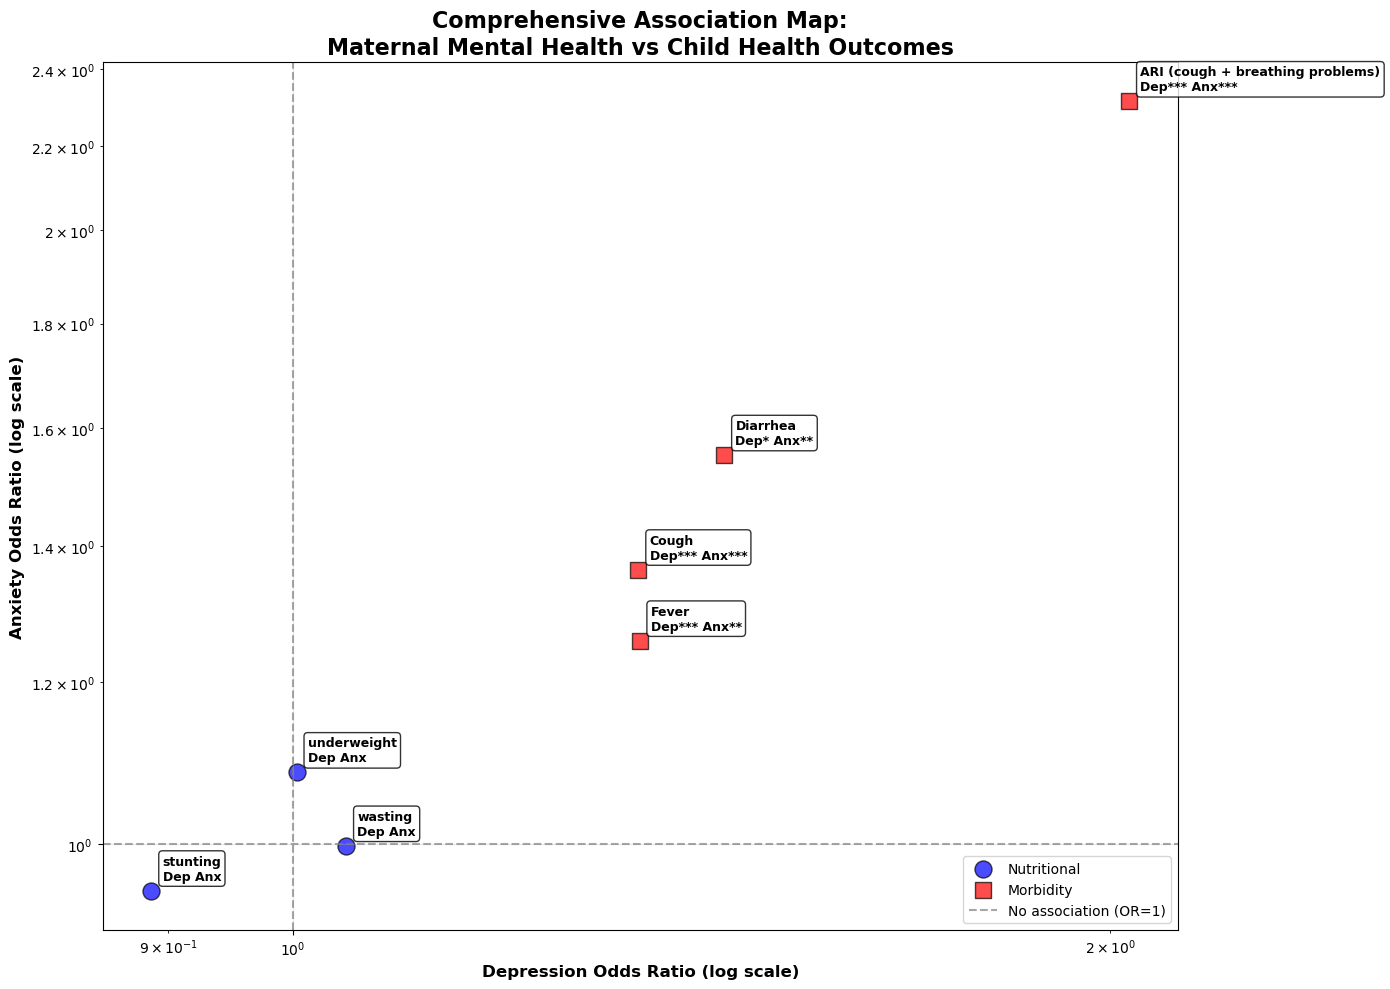


COMPREHENSIVE ASSOCIATION SUMMARY
                            Outcome         Type  Depression_OR Depression_p  \
0                          stunting  Nutritional          0.887       0.1625   
1                           wasting  Nutritional          1.046       0.6802   
2                       underweight  Nutritional          1.003       0.9676   
3                          Diarrhea    Morbidity          1.442      0.0153*   
4                             Fever    Morbidity          1.342    0.0001***   
5                             Cough    Morbidity          1.341    0.0001***   
6  ARI (cough + breathing problems)    Morbidity          2.032    0.0000***   

   Anxiety_OR  Anxiety_p  
0       0.949     0.5061  
1       0.998     0.9826  
2       1.084     0.3068  
3       1.551   0.0022**  
4       1.258   0.0011**  
5       1.363  0.0000***  
6       2.313  0.0000***  

KEY INTERPRETATIONS:
✓ Significant Depression Associations:
  • Diarrhea: 1.44x higher odds
  • Fever: 1.34

In [43]:
# =============================================================================
# COMPREHENSIVE HEALTH OUTCOMES COMPARISON (FIXED)
# =============================================================================

print("=== COMPREHENSIVE HEALTH OUTCOMES COMPARISON ===")

# Combine all outcomes for comparison
all_outcomes = {
    'Nutritional Outcomes': ['stunting_binary', 'wasting_binary', 'underweight_binary'],
    'Morbidity Outcomes': list(available_morbidity.keys()) if available_morbidity else []
}

# Calculate association strength for each outcome
association_results = []

# Nutritional outcomes - USE analysis_df NOT df
for outcome in all_outcomes['Nutritional Outcomes']:
    try:
        # Depression association
        formula = f"{outcome} ~ depression_binary"
        model = smf.logit(formula, data=analysis_df).fit(disp=False, maxiter=2000)
        or_dep = np.exp(model.params['depression_binary'])
        p_dep = model.pvalues['depression_binary']
        
        # Anxiety association
        formula = f"{outcome} ~ anxiety_binary"
        model = smf.logit(formula, data=analysis_df).fit(disp=False, maxiter=2000)
        or_anx = np.exp(model.params['anxiety_binary'])
        p_anx = model.pvalues['anxiety_binary']
        
        association_results.append({
            'Outcome': outcome.replace('_binary', ''),
            'Type': 'Nutritional',
            'Depression_OR': or_dep,
            'Depression_p': p_dep,
            'Anxiety_OR': or_anx,
            'Anxiety_p': p_anx
        })
        print(f"✓ Processed {outcome}")
        
    except Exception as e:
        print(f"✗ Error processing {outcome}: {e}")

# Morbidity outcomes - USE analysis_df NOT df
for outcome_desc in all_outcomes['Morbidity Outcomes']:
    try:
        outcome_var = available_morbidity[outcome_desc]
        
        # Use proper statistical tests instead of simple prevalence ratios
        # Depression association
        formula = f"{outcome_var} ~ depression_binary"
        model = smf.logit(formula, data=analysis_df).fit(disp=False, maxiter=2000)
        or_dep = np.exp(model.params['depression_binary'])
        p_dep = model.pvalues['depression_binary']
        
        # Anxiety association
        formula = f"{outcome_var} ~ anxiety_binary"
        model = smf.logit(formula, data=analysis_df).fit(disp=False, maxiter=2000)
        or_anx = np.exp(model.params['anxiety_binary'])
        p_anx = model.pvalues['anxiety_binary']
        
        association_results.append({
            'Outcome': outcome_desc,
            'Type': 'Morbidity',
            'Depression_OR': or_dep,
            'Depression_p': p_dep,
            'Anxiety_OR': or_anx,
            'Anxiety_p': p_anx
        })
        print(f"✓ Processed {outcome_desc}")
        
    except Exception as e:
        print(f"✗ Error processing {outcome_desc}: {e}")

# Create results dataframe
association_df = pd.DataFrame(association_results)

# Plot comprehensive comparison
if not association_df.empty:
    plt.figure(figsize=(14, 10))
    
    colors = {'Nutritional': 'blue', 'Morbidity': 'red'}
    markers = {'Nutritional': 'o', 'Morbidity': 's'}
    sizes = {'Nutritional': 150, 'Morbidity': 120}
    
    for outcome_type in association_df['Type'].unique():
        subset = association_df[association_df['Type'] == outcome_type]
        
        plt.scatter(subset['Depression_OR'], subset['Anxiety_OR'], 
                   label=outcome_type, 
                   s=sizes[outcome_type], 
                   alpha=0.7, 
                   c=colors[outcome_type],
                   marker=markers[outcome_type],
                   edgecolors='black',
                   linewidth=1)
        
        # Add outcome labels with significance stars
        for _, row in subset.iterrows():
            # Determine significance markers
            dep_sig = ''
            if row['Depression_p'] < 0.001:
                dep_sig = '***'
            elif row['Depression_p'] < 0.01:
                dep_sig = '**'
            elif row['Depression_p'] < 0.05:
                dep_sig = '*'
                
            anx_sig = ''
            if row['Anxiety_p'] < 0.001:
                anx_sig = '***'
            elif row['Anxiety_p'] < 0.01:
                anx_sig = '**'
            elif row['Anxiety_p'] < 0.05:
                anx_sig = '*'
            
            label = f"{row['Outcome']}\nDep{dep_sig} Anx{anx_sig}"
            
            plt.annotate(label, 
                        (row['Depression_OR'], row['Anxiety_OR']),
                        xytext=(8, 8), 
                        textcoords='offset points', 
                        fontweight='bold',
                        fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Add reference lines
    plt.axhline(y=1, color='grey', linestyle='--', alpha=0.7, label='No association (OR=1)')
    plt.axvline(x=1, color='grey', linestyle='--', alpha=0.7)
    
    # Customize plot
    plt.xlabel('Depression Odds Ratio (log scale)', fontsize=12, fontweight='bold')
    plt.ylabel('Anxiety Odds Ratio (log scale)', fontsize=12, fontweight='bold')
    plt.title('Comprehensive Association Map:\nMaternal Mental Health vs Child Health Outcomes', 
              fontsize=16, fontweight='bold')
    
    # Use log scale for better visualization of ORs
    plt.xscale('log')
    plt.yscale('log')
    
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print detailed summary
    print("\n" + "="*80)
    print("COMPREHENSIVE ASSOCIATION SUMMARY")
    print("="*80)
    
    # Format p-values with significance stars
    def format_p_value(p_val):
        if p_val < 0.001:
            return f"{p_val:.4f}***"
        elif p_val < 0.01:
            return f"{p_val:.4f}**"
        elif p_val < 0.05:
            return f"{p_val:.4f}*"
        else:
            return f"{p_val:.4f}"
    
    summary_df = association_df.copy()
    summary_df['Depression_p'] = summary_df['Depression_p'].apply(format_p_value)
    summary_df['Anxiety_p'] = summary_df['Anxiety_p'].apply(format_p_value)
    
    print(summary_df.round(3))
    
    # Interpretation
    print("\n" + "="*80)
    print("KEY INTERPRETATIONS:")
    print("="*80)
    
    significant_depression = association_df[association_df['Depression_p'] < 0.05]
    significant_anxiety = association_df[association_df['Anxiety_p'] < 0.05]
    
    if len(significant_depression) > 0:
        print("✓ Significant Depression Associations:")
        for _, row in significant_depression.iterrows():
            direction = "higher" if row['Depression_OR'] > 1 else "lower"
            print(f"  • {row['Outcome']}: {row['Depression_OR']:.2f}x {direction} odds")
    else:
        print("✗ No significant depression associations found")
    
    if len(significant_anxiety) > 0:
        print("✓ Significant Anxiety Associations:")
        for _, row in significant_anxiety.iterrows():
            direction = "higher" if row['Anxiety_OR'] > 1 else "lower"
            print(f"  • {row['Outcome']}: {row['Anxiety_OR']:.2f}x {direction} odds")
    else:
        print("✗ No significant anxiety associations found")

else:
    print("No association results to display")